### This notebook consists of exploratory analysis of the data for COVID-19 Forecasting Week 4 . 
#### The data consists of count of confirmed cases , number of fatalties recorded on dailly basis for 180 countries over a period of 72 days - 22nd Jan 2020 - 22nd Mar 2020. 
#### The ask is develop a predictive model which would forecast the number of covid cases and fatalities over the next 43 days for these 180 countries. For some countries, the data is also recorded for its indivual states, thus total number of regions - 313. 
#### The timeseries for all the provided regions have been clustered into groups. A new variable Group_Number will be created in the Training Data File which will bear the group number.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
len(df)

24727

In [3]:
df.describe().T.reset_index()

index    count          mean           std  min     25%      50%  \
0              Id  24727.0  17824.000000  10300.687114  1.0  8912.5  17824.0   
1  ConfirmedCases  24727.0    889.193351   6874.378113  0.0     0.0      0.0   
2      Fatalities  24727.0     43.134792    526.129270  0.0     0.0      0.0   

       75%       max  
0  26735.5   35647.0  
1     77.0  161779.0  
2      1.0   18279.0

#### Filling the blanks in the Province_State field with 'NA'. This value to be concatenated with the Country_Region to form another variable Country_State_Province

In [4]:
df['Province_State'].fillna('NA', inplace=True)
df['Country_state_Province']=df['Country_Region']+'-'+df['Province_State']

In [5]:
country_state_province_list=list(set(list(df['Country_state_Province'])))
len(country_state_province_list)

313

#### Verifying whether the figures are cumulative or as of that day. Two additional variables created Diff_CC, Diff_FT which captures the difference in number of confirmed cases and fatalities for consecutive days. 

In [6]:
df3=pd.DataFrame(columns=df.columns)
df3['Day']=''
df3['Diff_CC']=''
df3['Diff_FT']=''
for region in country_state_province_list:
    print(region)
    dfregion=df[df['Country_state_Province']==region]
    dfregion['Day']=range(1,len(dfregion)+1)
    dfregion['Diff_CC']=dfregion['ConfirmedCases'].diff()
    dfregion['Diff_FT']=dfregion['Fatalities'].diff()
    df3=df3.append(dfregion)

Botswana-NA
Cambodia-NA
Australia-New South Wales


c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

France-Guadeloupe
Canada-Manitoba
Maldives-NA
Armenia-NA
Netherlands-Aruba
Congo (Kinshasa)-NA
US-Minnesota
Vietnam-NA
Mauritania-NA
US-Connecticut
Netherlands-NA
US-Ohio
China-Inner Mongolia
Bahrain-NA
Antigua and Barbuda-NA
North Macedonia-NA
Congo (Brazzaville)-NA
MS Zaandam-NA
Cuba-NA
Tunisia-NA
Bosnia and Herzegovina-NA
Denmark-Faroe Islands
Madagascar-NA
US-Mississippi
Philippines-NA
Netherlands-Curacao
Ethiopia-NA
Serbia-NA
US-Maryland
United Kingdom-Turks and Caicos Islands
US-Missouri
Algeria-NA
Papua New Guinea-NA
US-Hawaii
Ireland-NA
Cabo Verde-NA
Germany-NA
Spain-NA
Timor-Leste-NA
US-South Dakota
Canada-Newfoundland and Labrador
Suriname-NA
Senegal-NA
Western Sahara-NA
Guinea-Bissau-NA
Poland-NA
San Marino-NA
US-Indiana
Bahamas-NA
Canada-Nova Scotia
Brunei-NA
US-Tennessee
Malta-NA
US-Wyoming
US-Maine
Togo-NA
Uruguay-NA
China-Shaanxi
US-Delaware
Jamaica-NA
Central African Republic-NA
Korea, South-NA
Holy See-NA
Libya-NA
Mexico-NA
US-Puerto Rico
United Kingdom-Montserrat
Azer

#### As of 7th April, number of cases all over the world - 1,431,706. Number of Fatalities - 82,080. 
#### The sum over last two days is greater than the above mentioned figures. So the numbers provided in the data for each day is cummulative. 

In [7]:
cc79=list(df[df3['Day']==79]['ConfirmedCases'])
ft79=list(df[df3['Day']==79]['Fatalities'])
cc79=list(df[df3['Day']==79]['ConfirmedCases'])
ft79=list(df[df3['Day']==79]['Fatalities'])
print(sum(cc79)+sum(cc79))
print(sum(ft79)+sum(ft79))
# As of 7th April, number of cases all over the world - 1,431,706. Number of Fatalities - 82,080. 
## The sum over last two days is greater than the above mentioned figures. So the numbers provided in the data for each day is cummulative. 

3190348.0
190898.0


c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


#### But for some records, the Confirmed Cases, Fatalities reported in the later days are less than previous days

In [17]:
print(len(df3[df3['Diff_FT']<0]))
print(len(df3[df3['Diff_CC']<0]))

16
19


### Plot for all the 306 Regions

#### The Confirmed Cases & Fatalities plot show a similar pattern for most of the countries except China. The first 50 days have 0 count of confirmedcases and fatalities for these countries. So instead of performing one hot encoding of the 306 regions,which will result in 306 varaibles, we can perform kmeans clustering of these timeseries and group the timeseries. The group variable can be then later one hot encoded thereby reducing the number of variables considerably. 

Botswana-NA


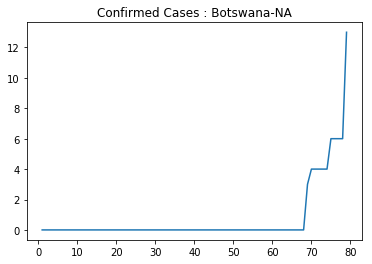

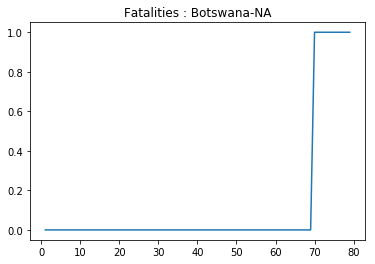



Cambodia-NA


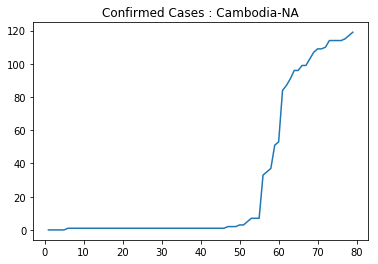

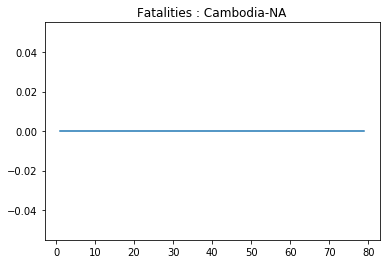



Australia-New South Wales


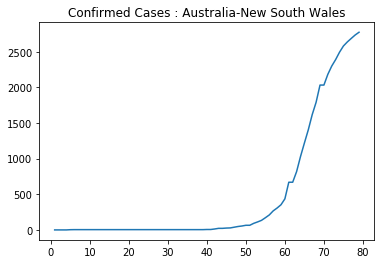

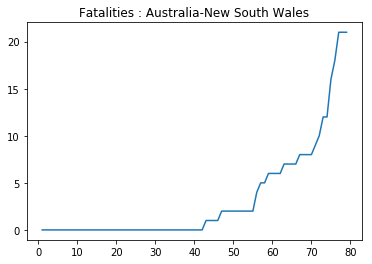



France-Guadeloupe


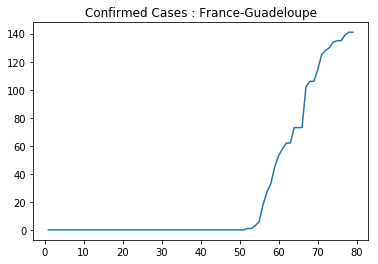

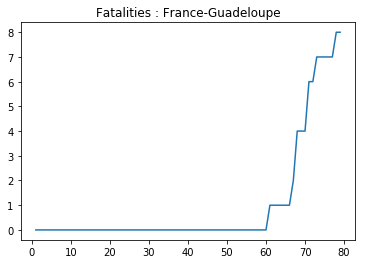



Canada-Manitoba


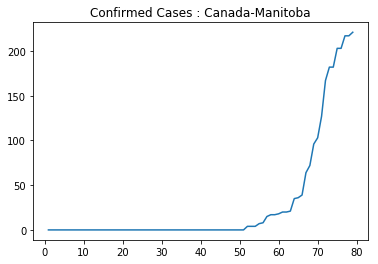

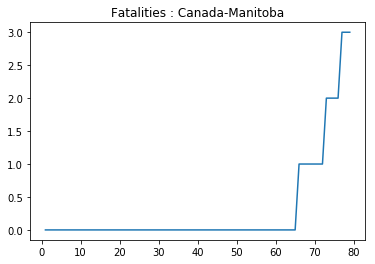



Maldives-NA


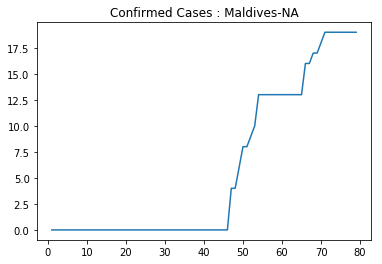

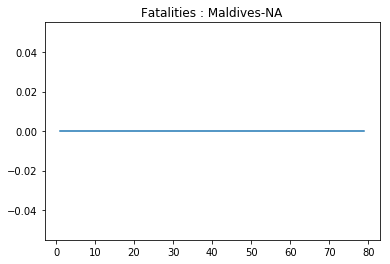



Armenia-NA


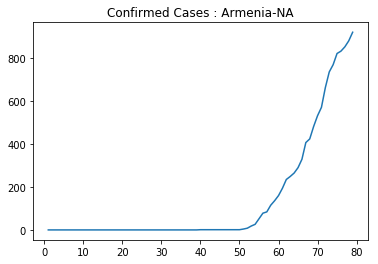

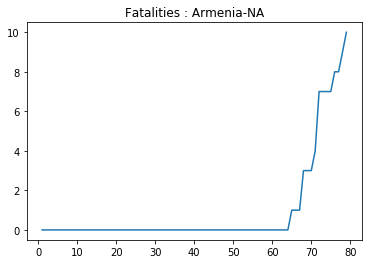



Netherlands-Aruba


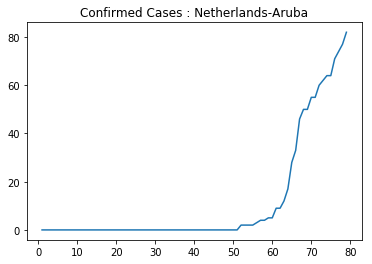

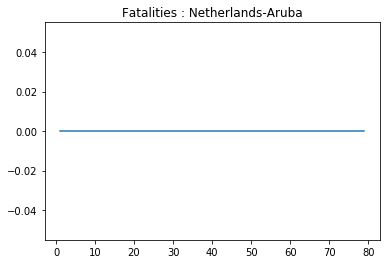



Congo (Kinshasa)-NA


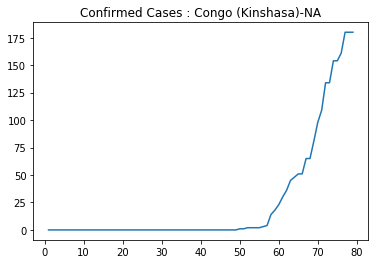

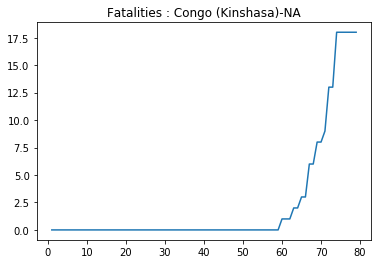



US-Minnesota


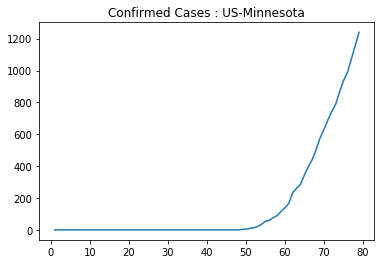

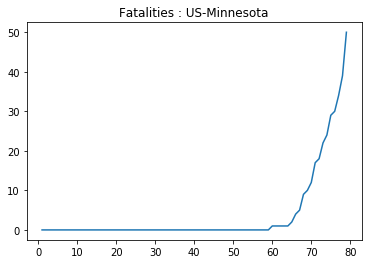



Vietnam-NA


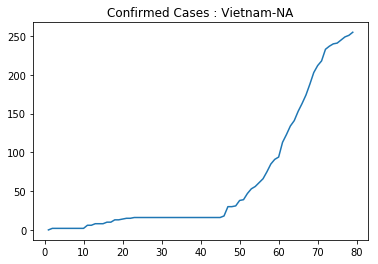

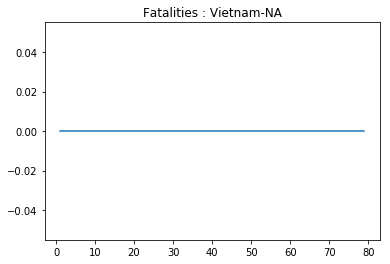



Mauritania-NA


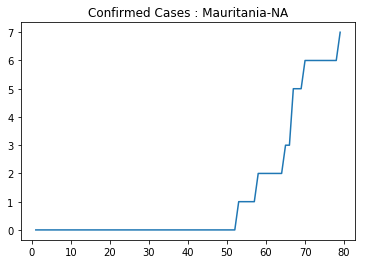

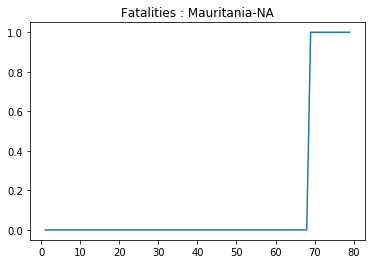



US-Connecticut


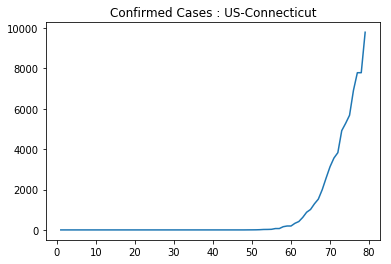

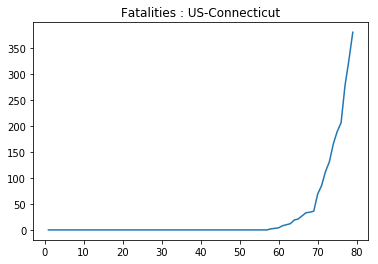



Netherlands-NA


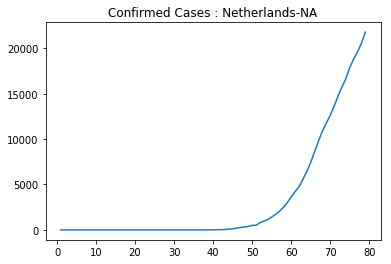

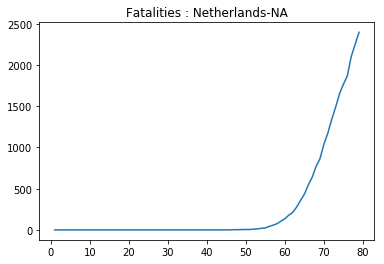



US-Ohio


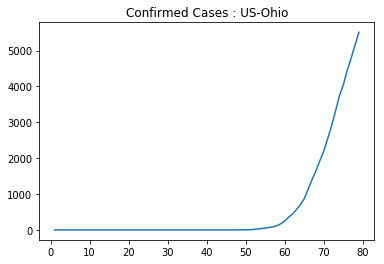

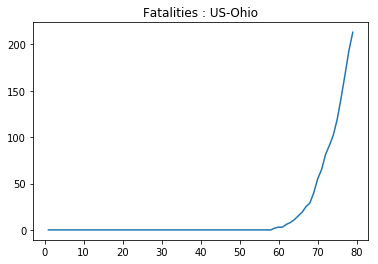



China-Inner Mongolia


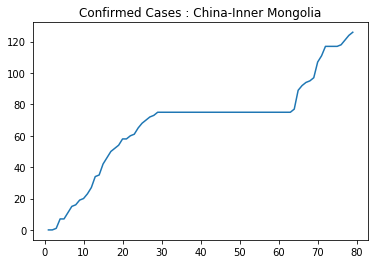

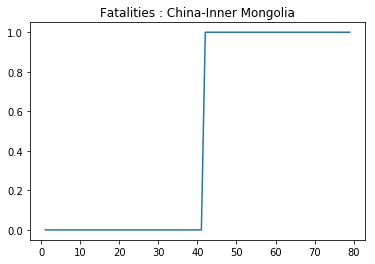



Bahrain-NA


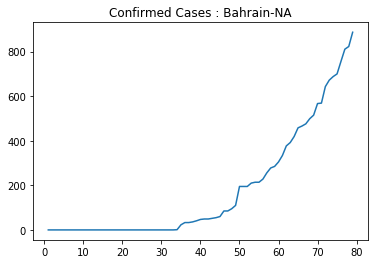

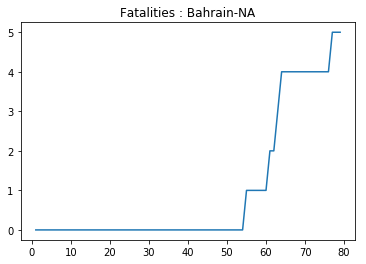



Antigua and Barbuda-NA


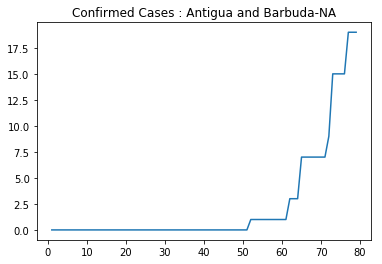

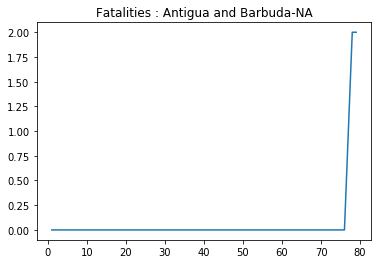



North Macedonia-NA


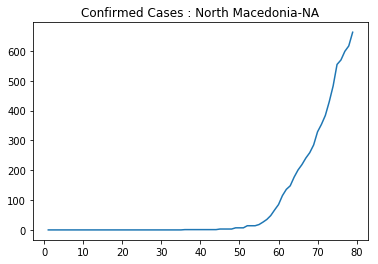

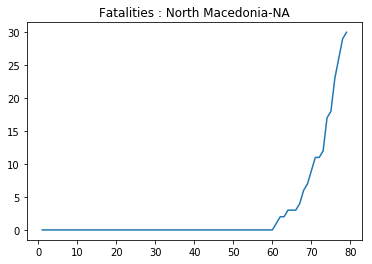



Congo (Brazzaville)-NA


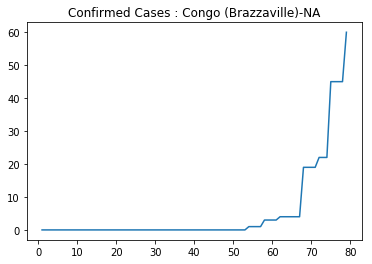

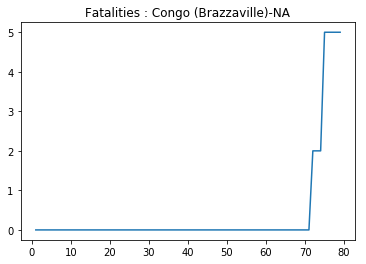



MS Zaandam-NA


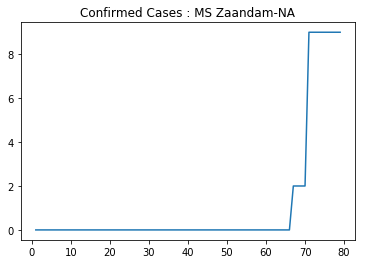

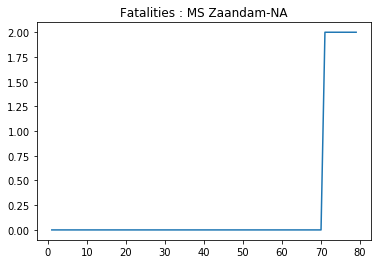



Cuba-NA


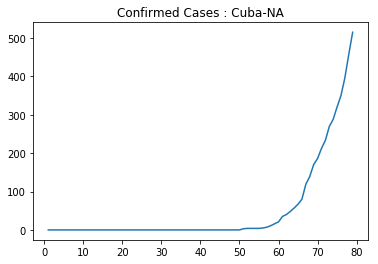

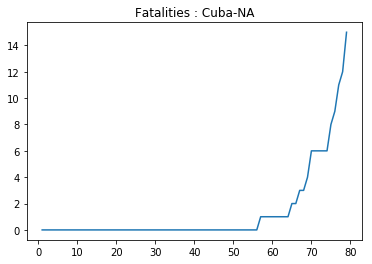



Tunisia-NA


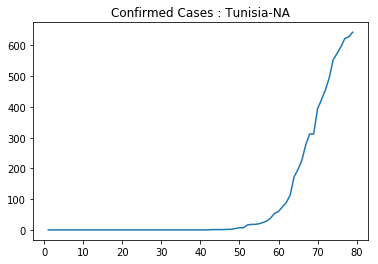

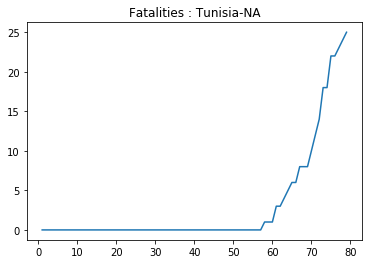



Bosnia and Herzegovina-NA


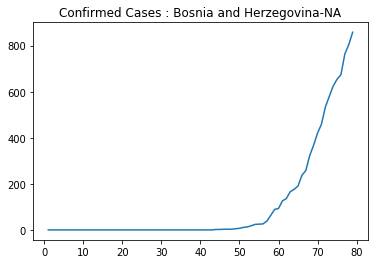

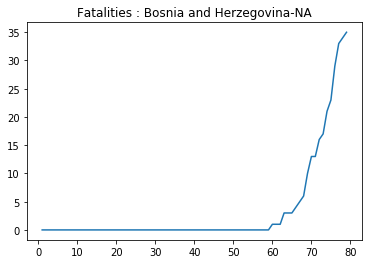



Denmark-Faroe Islands


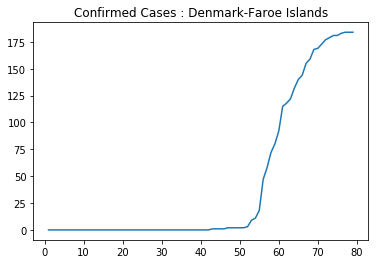

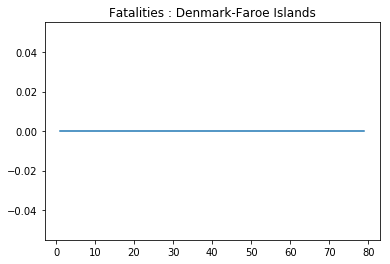



Madagascar-NA


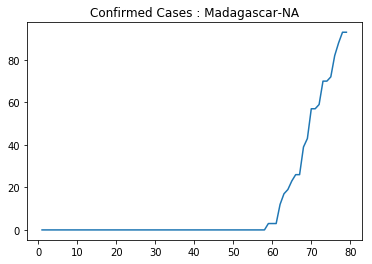

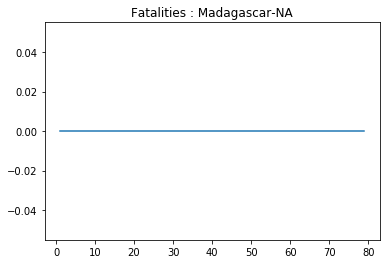



US-Mississippi


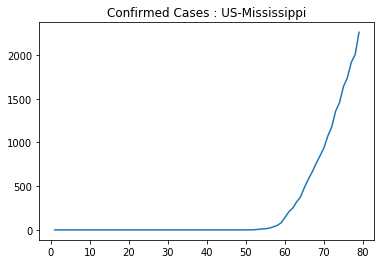

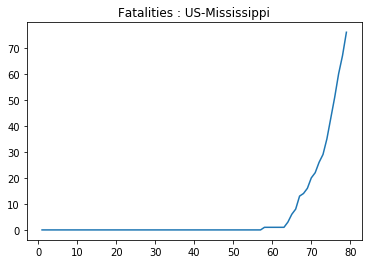



Philippines-NA


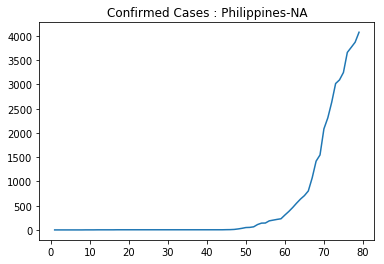

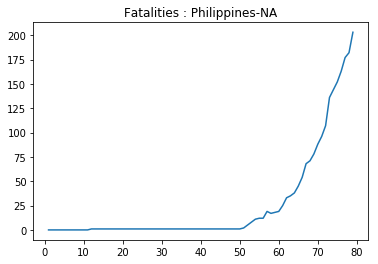



Netherlands-Curacao


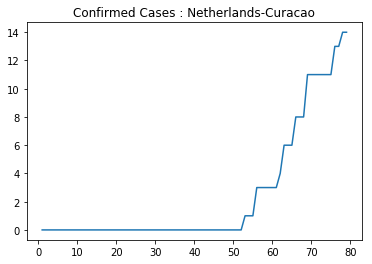

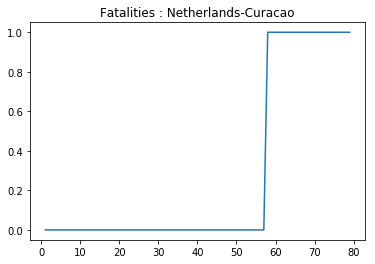



Ethiopia-NA


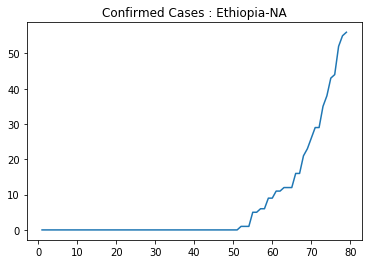

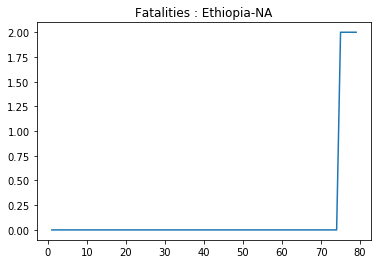



Serbia-NA


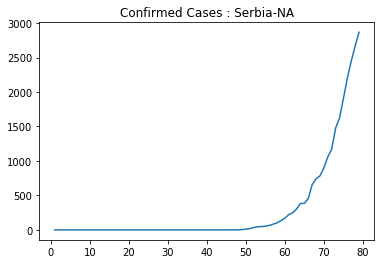

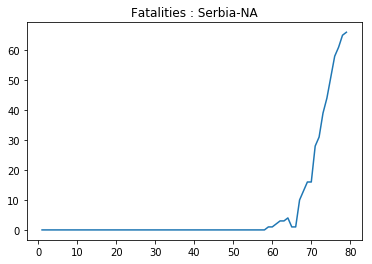



US-Maryland


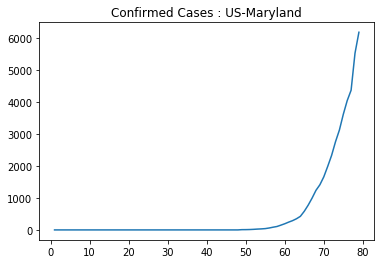

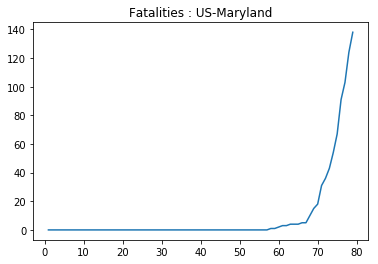



United Kingdom-Turks and Caicos Islands


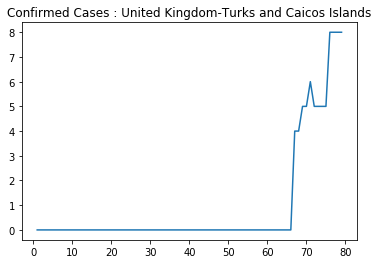

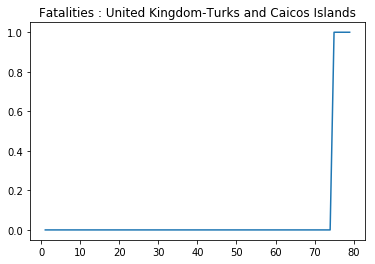



US-Missouri


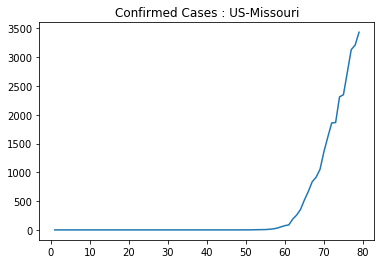

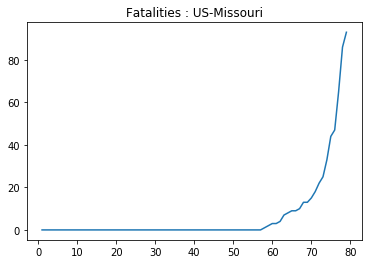



Algeria-NA


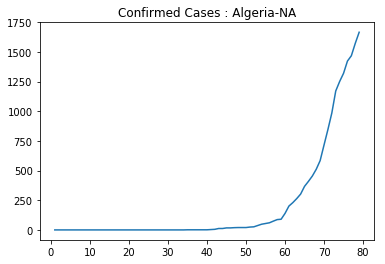

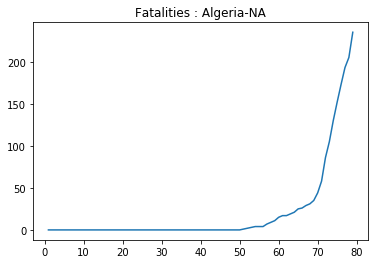



Papua New Guinea-NA


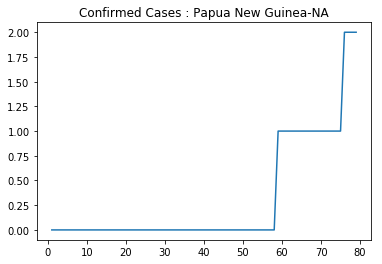

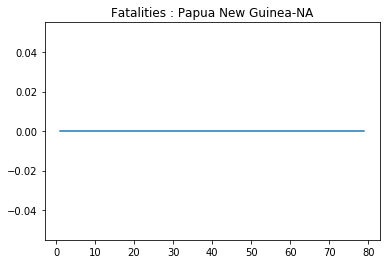



US-Hawaii


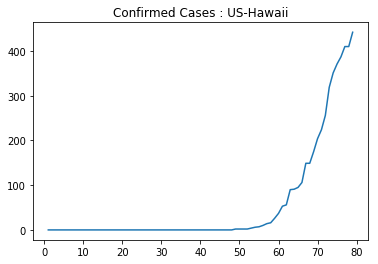

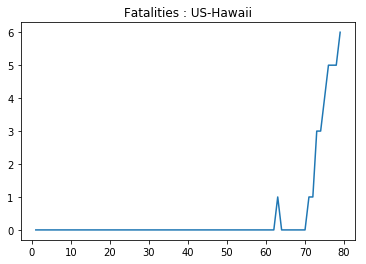



Ireland-NA


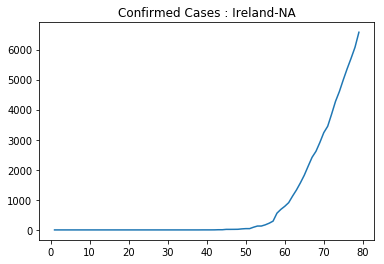

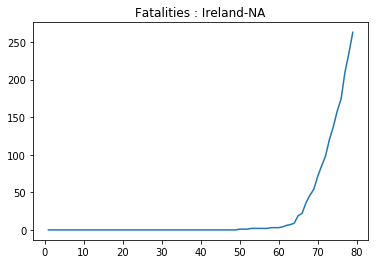



Cabo Verde-NA


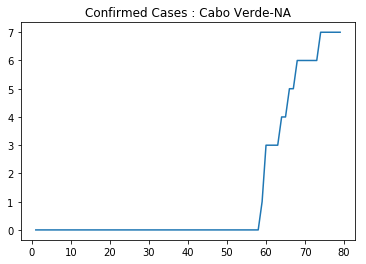

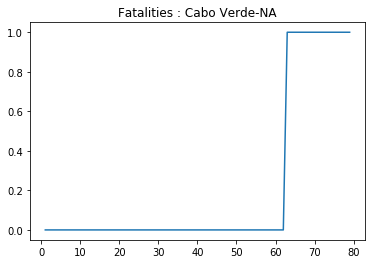



Germany-NA


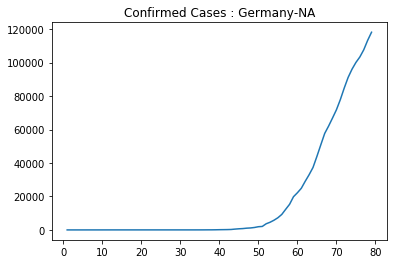

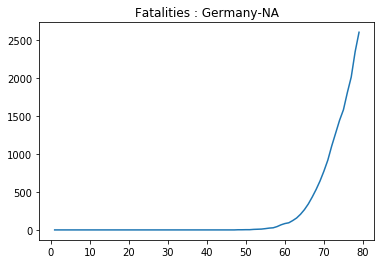



Spain-NA


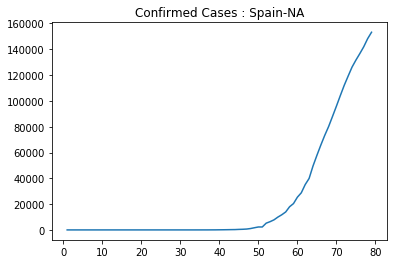

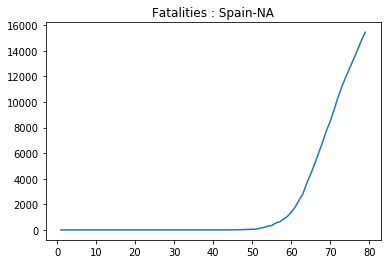



Timor-Leste-NA


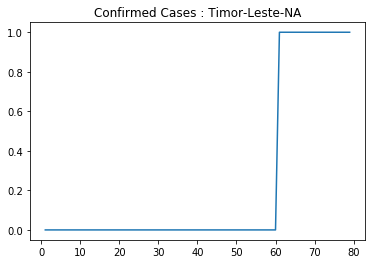

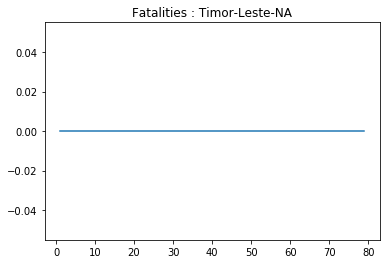



US-South Dakota


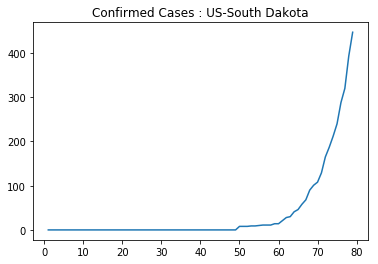

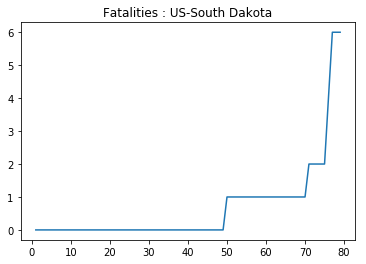



Canada-Newfoundland and Labrador


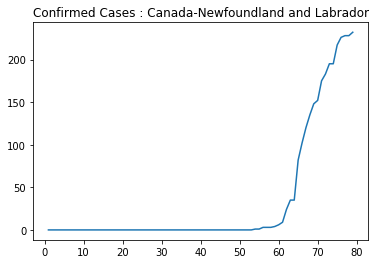

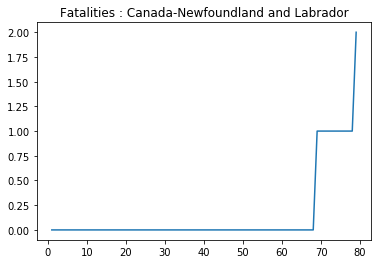



Suriname-NA


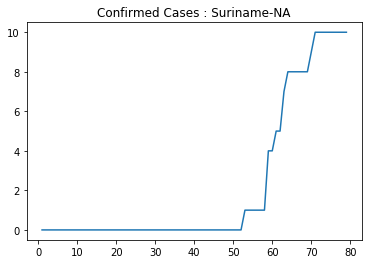

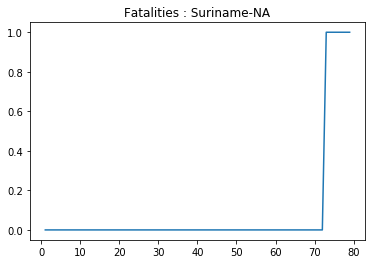



Senegal-NA


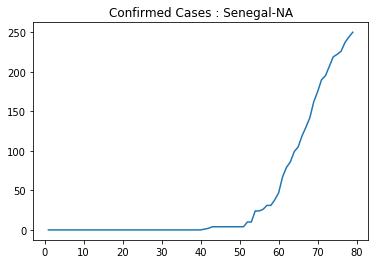

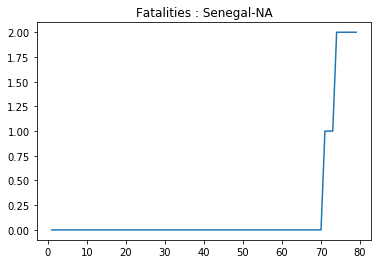



Western Sahara-NA


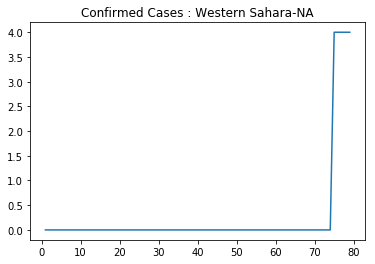

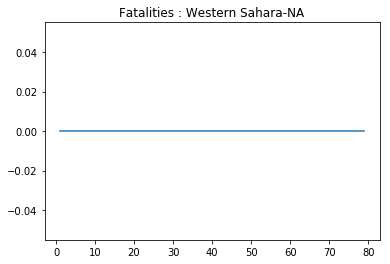



Guinea-Bissau-NA


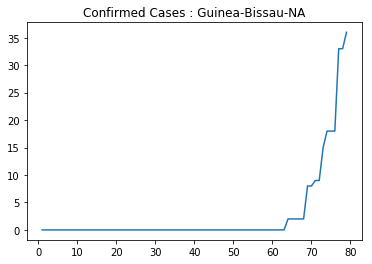

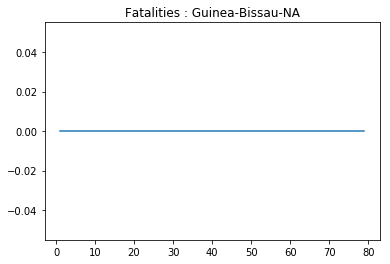



Poland-NA


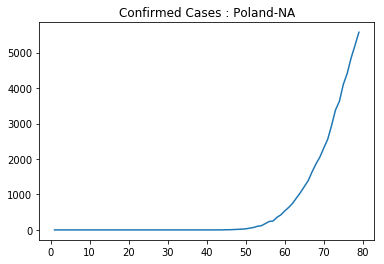

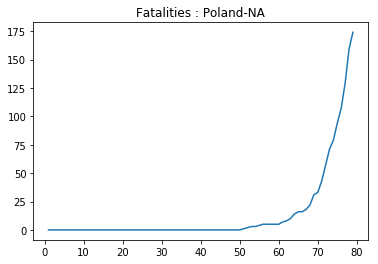



San Marino-NA


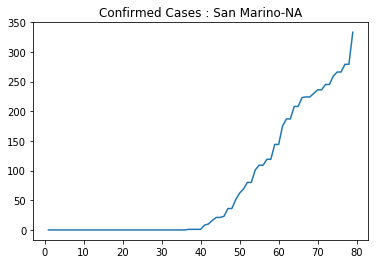

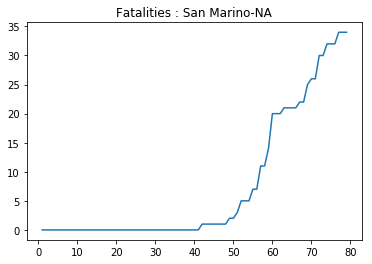



US-Indiana


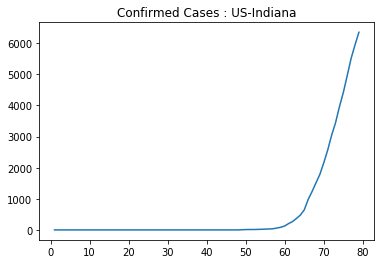

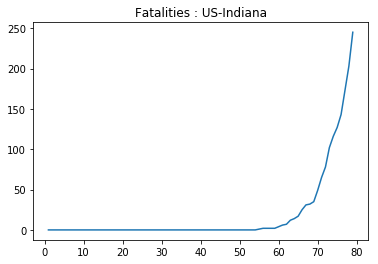



Bahamas-NA


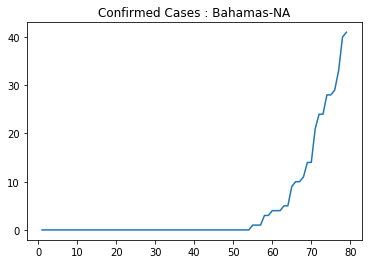

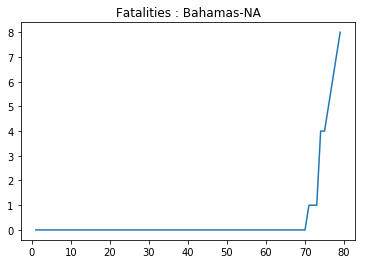



Canada-Nova Scotia


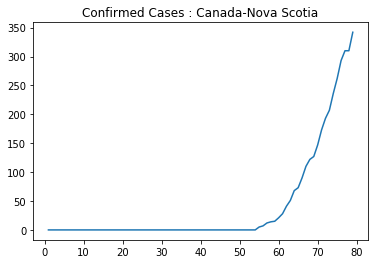

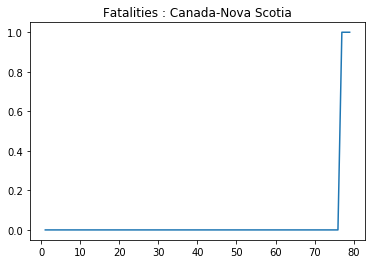



Brunei-NA


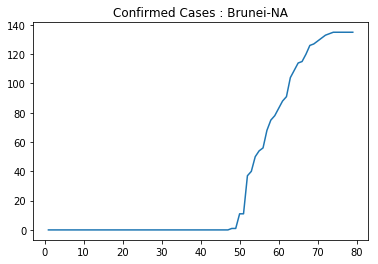

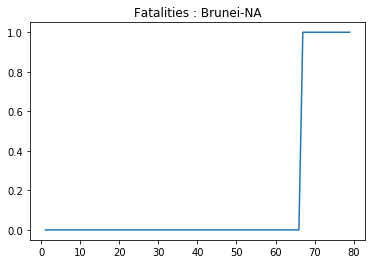



US-Tennessee


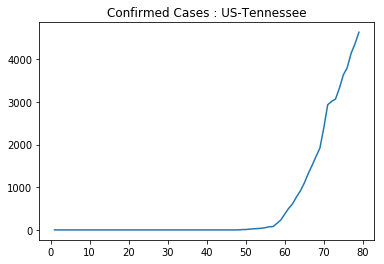

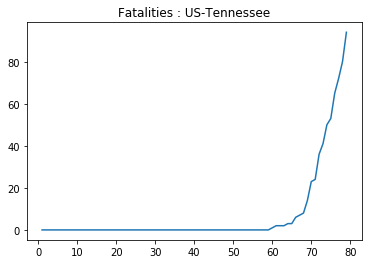



Malta-NA


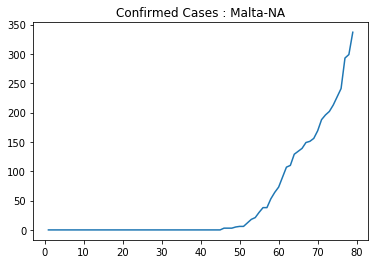

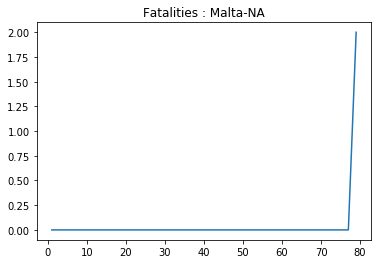



US-Wyoming


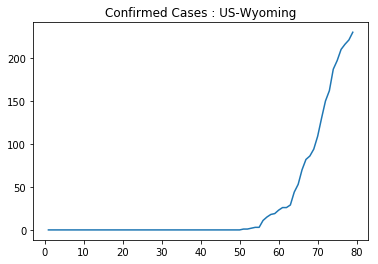

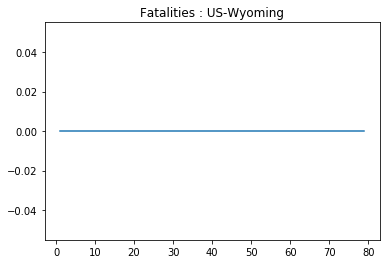



US-Maine


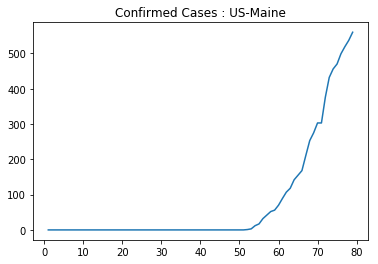

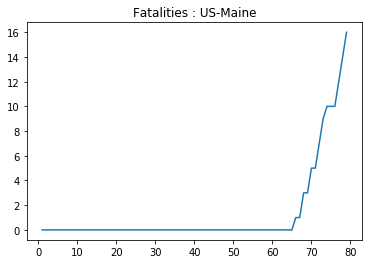



Togo-NA


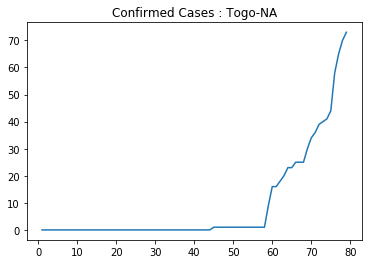

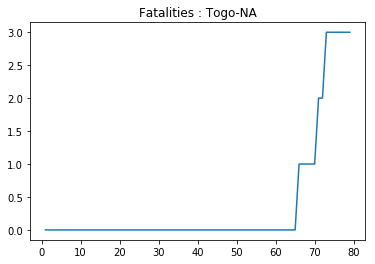



Uruguay-NA


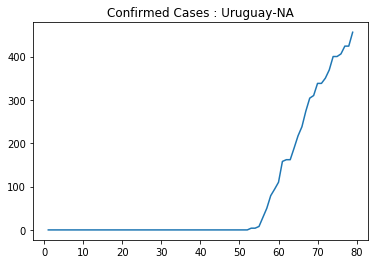

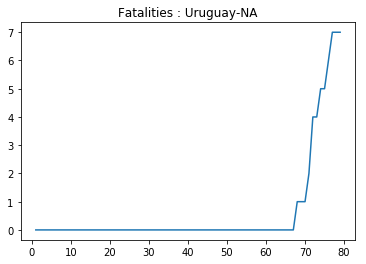



China-Shaanxi


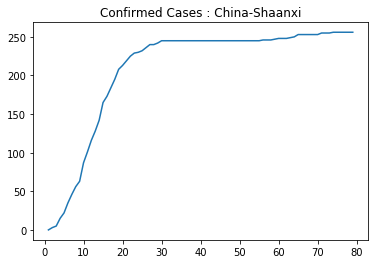

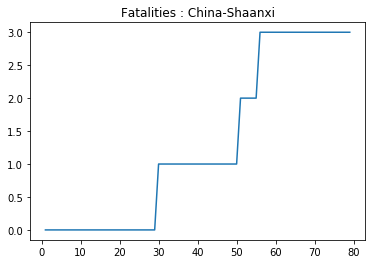



US-Delaware


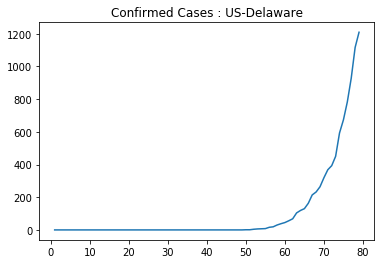

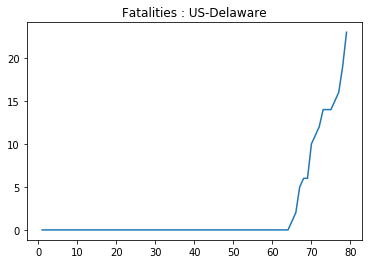



Jamaica-NA


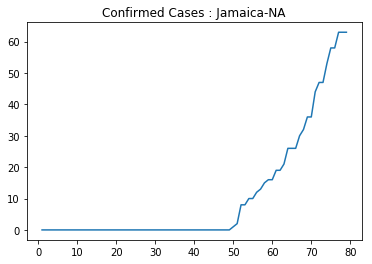

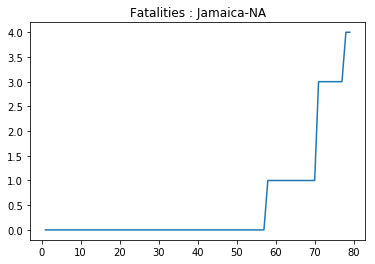



Central African Republic-NA


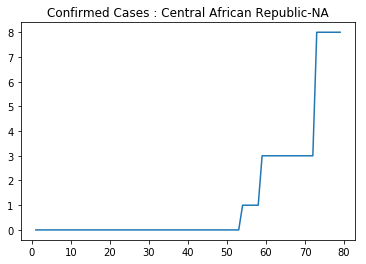

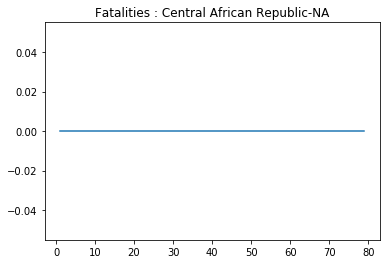



Korea, South-NA


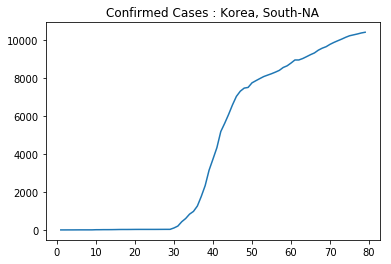

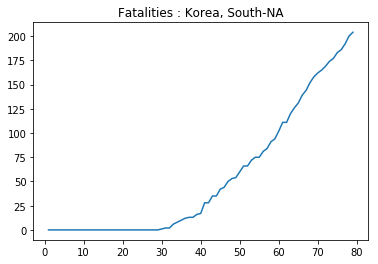



Holy See-NA


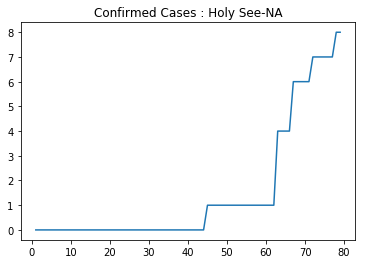

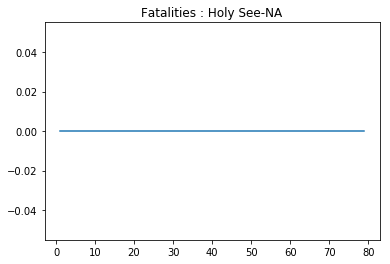



Libya-NA


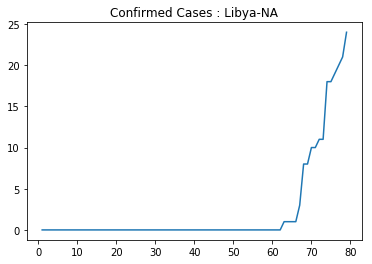

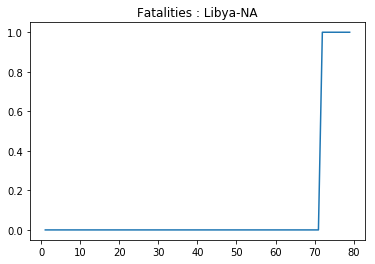



Mexico-NA


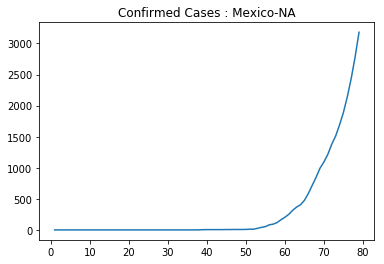

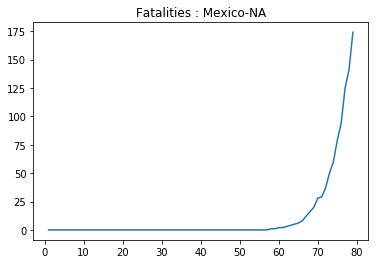



US-Puerto Rico


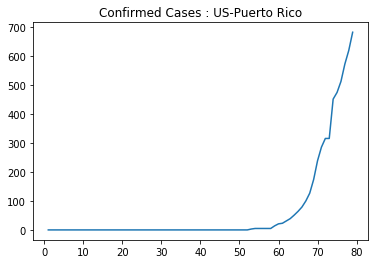

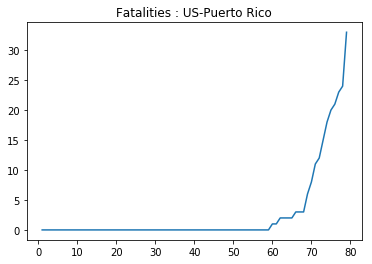



United Kingdom-Montserrat


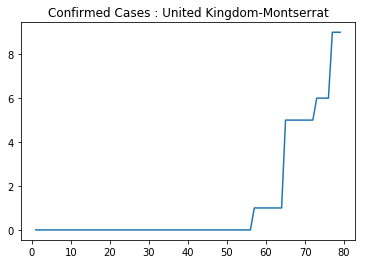

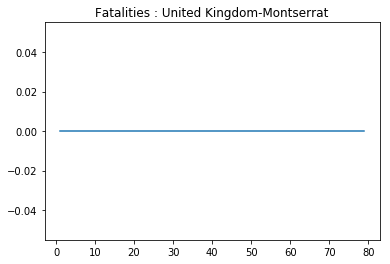



Azerbaijan-NA


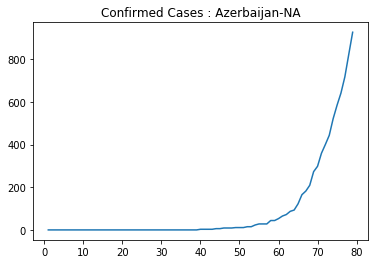

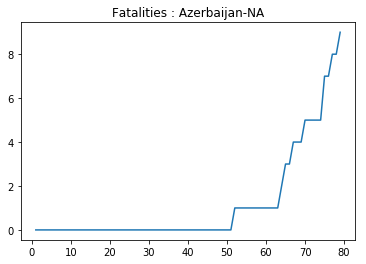



El Salvador-NA


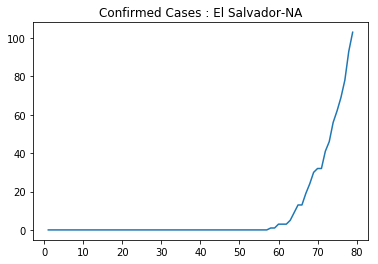

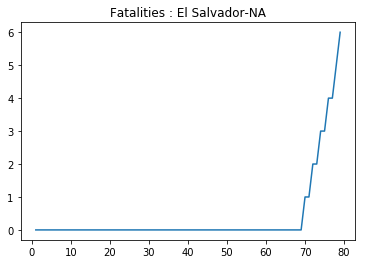



Croatia-NA


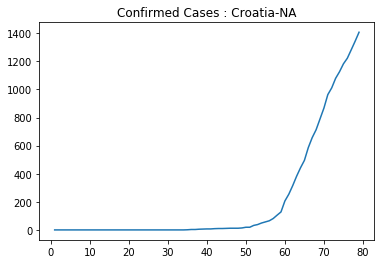

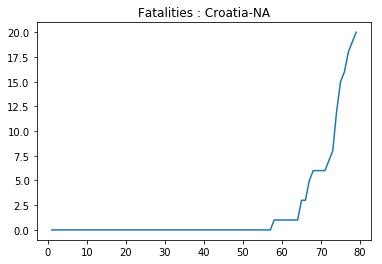



China-Hebei


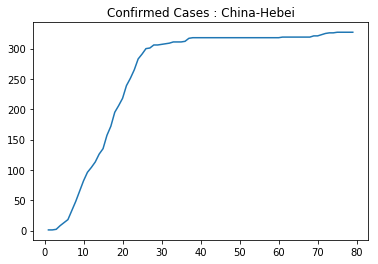

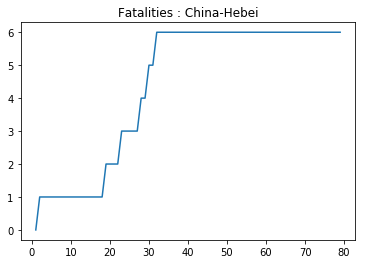



US-West Virginia


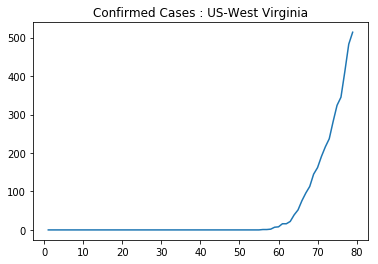

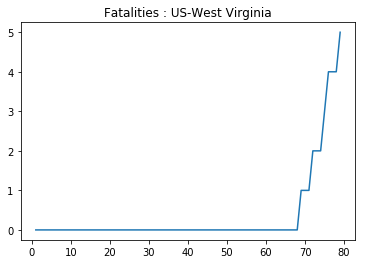



Chile-NA


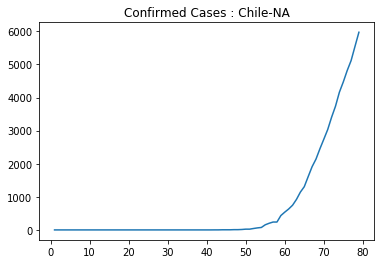

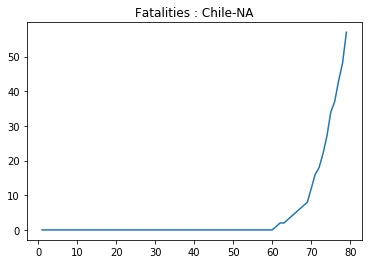



France-NA


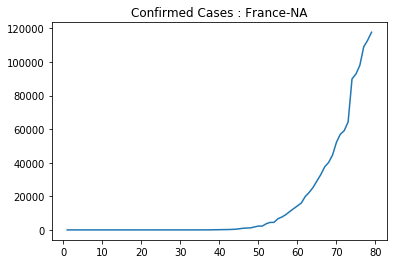

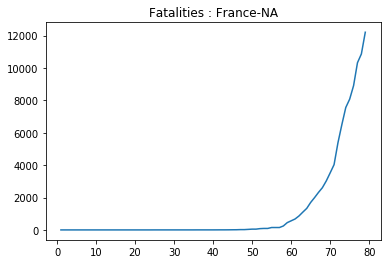



Qatar-NA


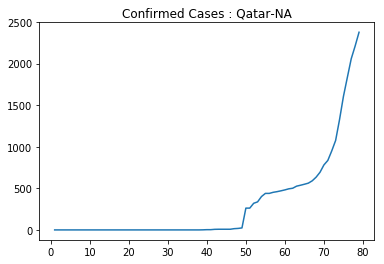

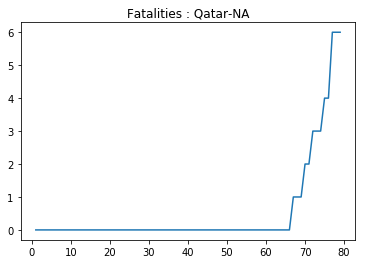



US-North Carolina


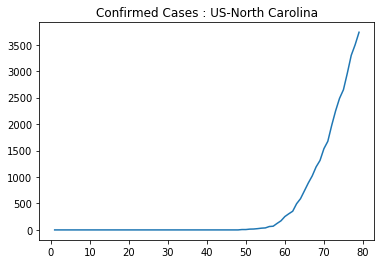

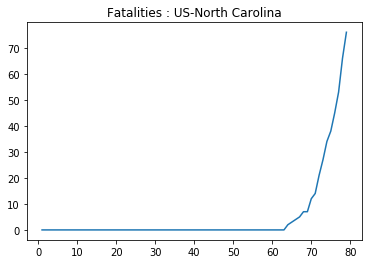



Saudi Arabia-NA


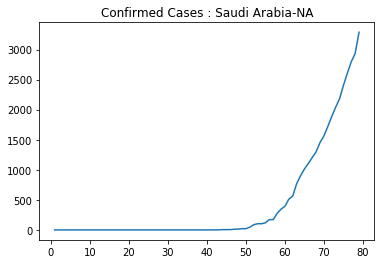

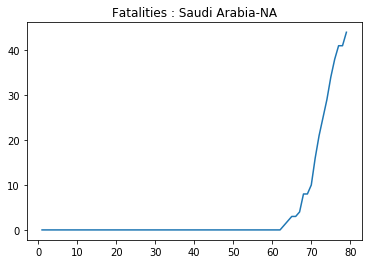



Canada-Northwest Territories


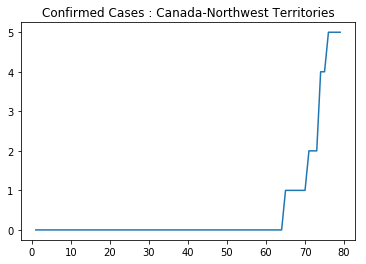

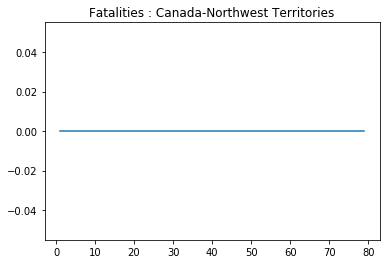



Russia-NA


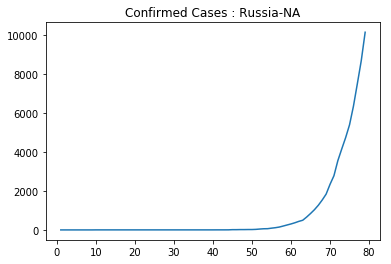

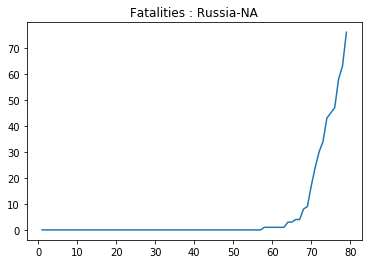



US-New Mexico


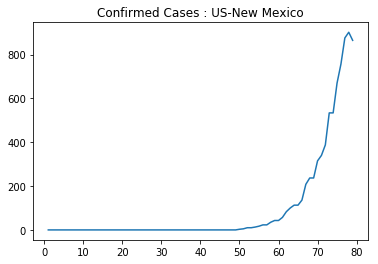

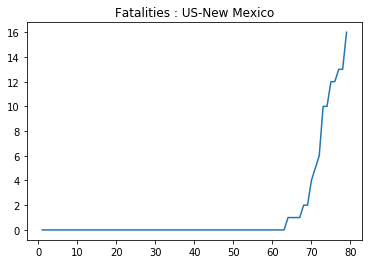



US-California


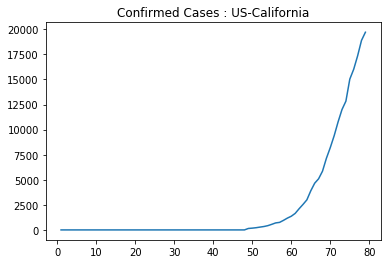

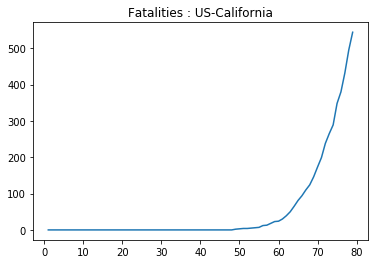



US-Virgin Islands


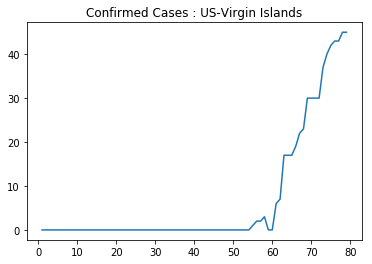

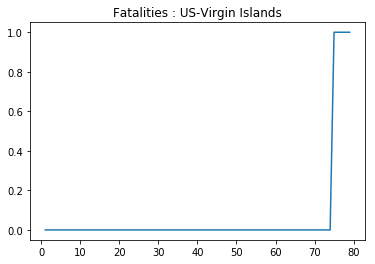



Australia-Australian Capital Territory


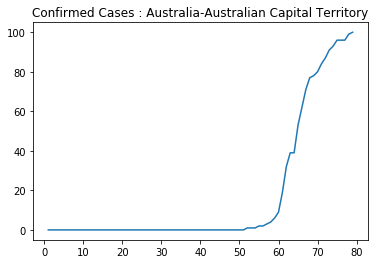

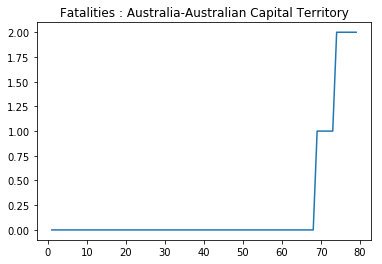



Guyana-NA


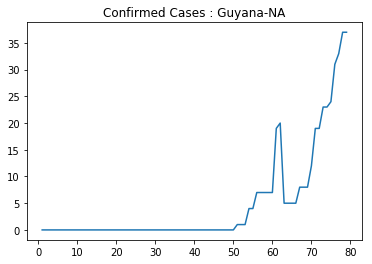

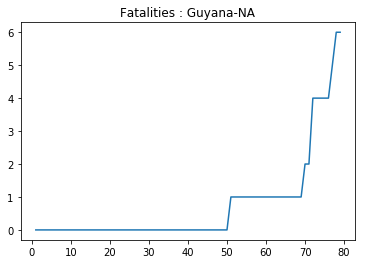



Canada-Yukon


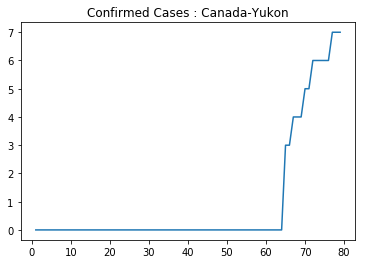

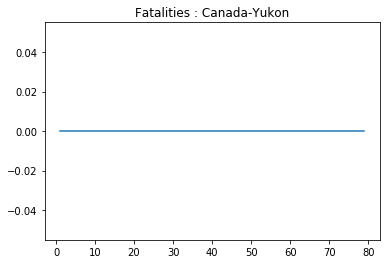



Albania-NA


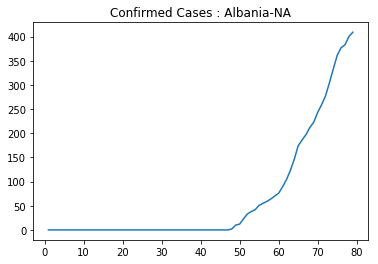

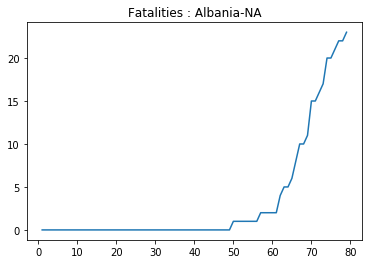



Saint Lucia-NA


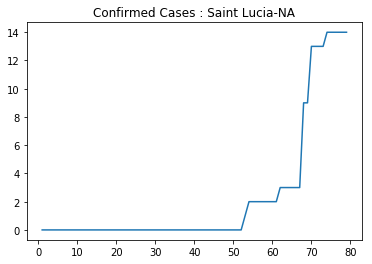

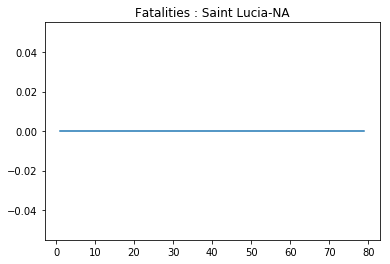



US-Kansas


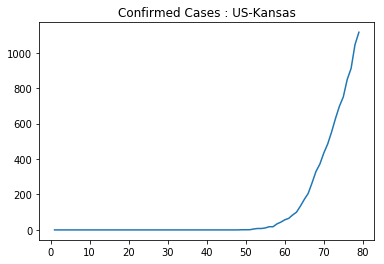

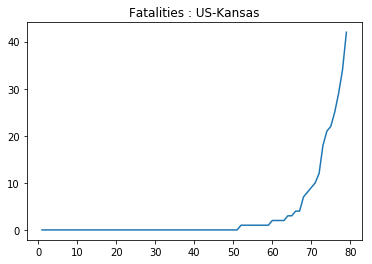



US-Arkansas


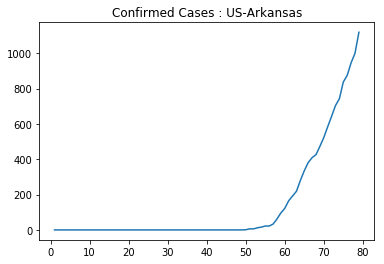

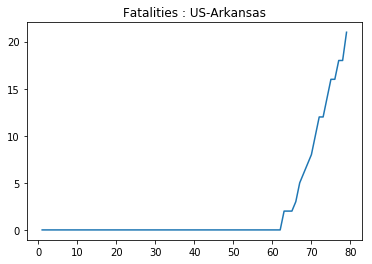



United Kingdom-Bermuda


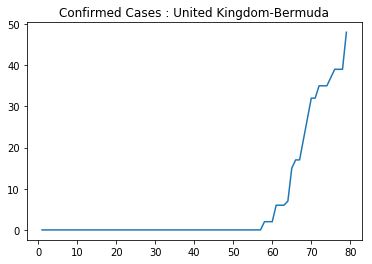

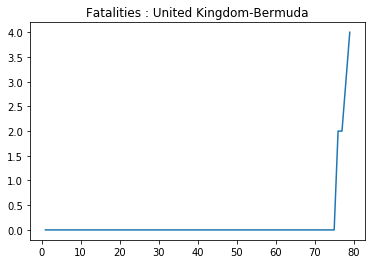



Bulgaria-NA


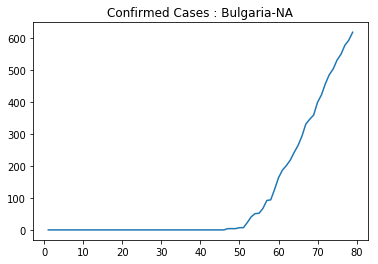

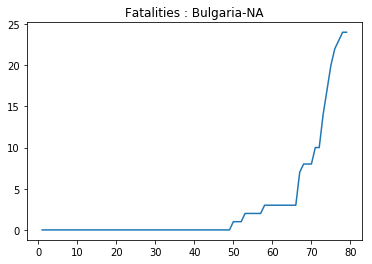



France-St Martin


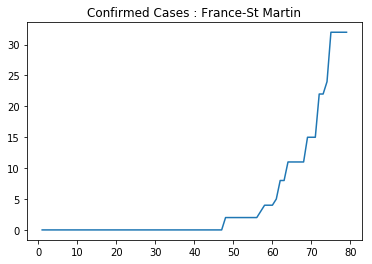

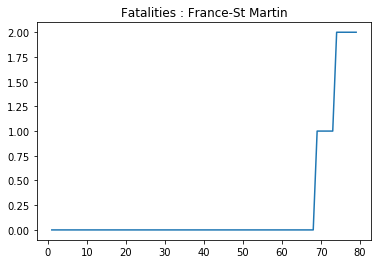



Israel-NA


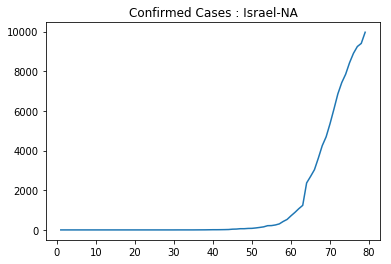

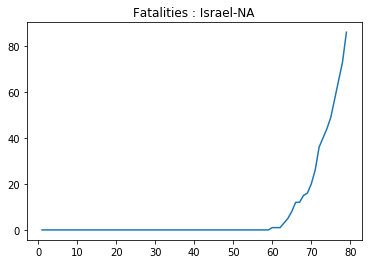



China-Heilongjiang


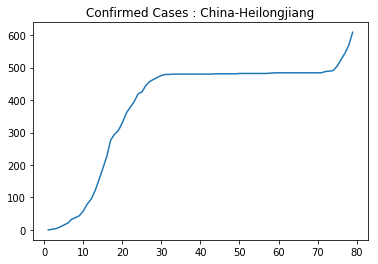

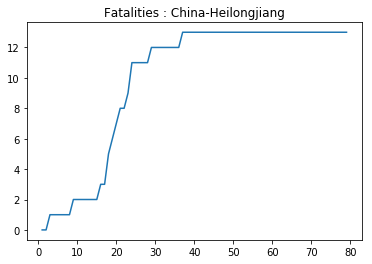



Sweden-NA


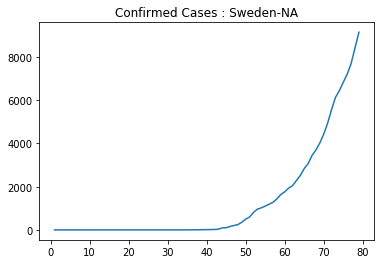

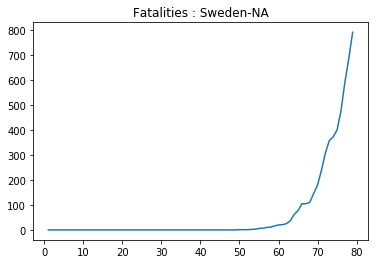



Canada-Quebec


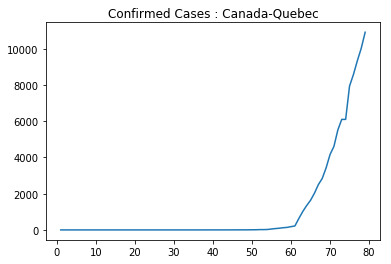

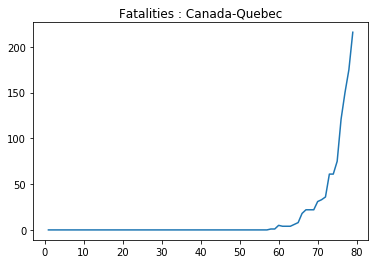



China-Beijing


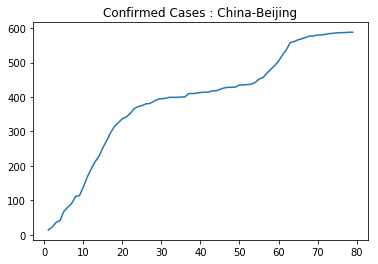

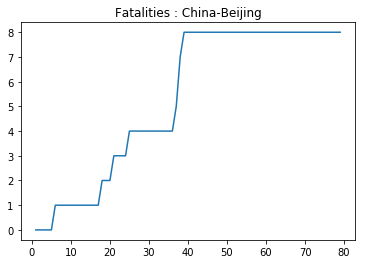



Denmark-NA


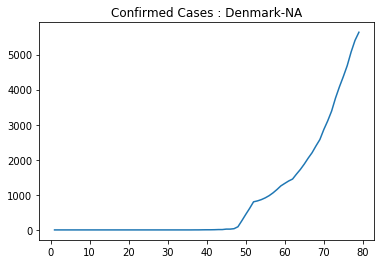

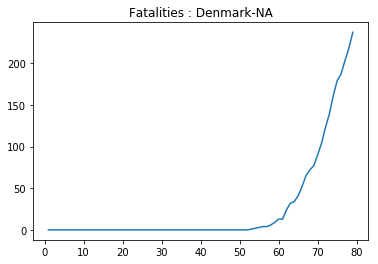



France-French Polynesia


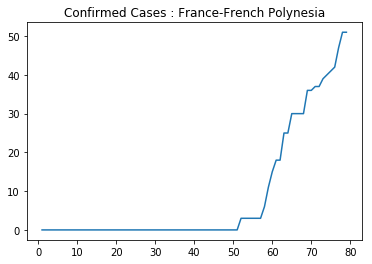

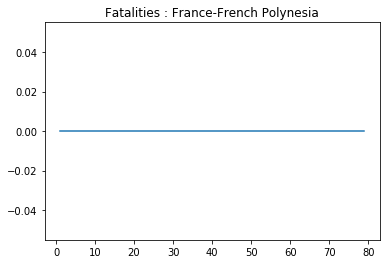



France-Saint Pierre and Miquelon


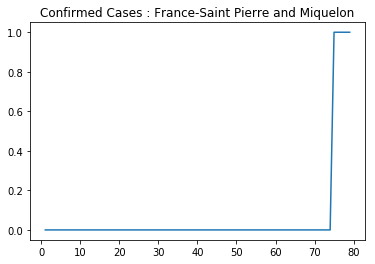

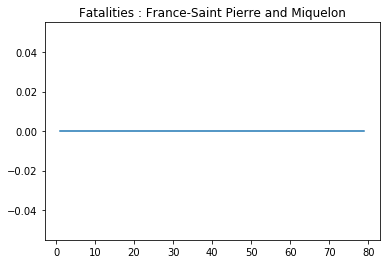



Burkina Faso-NA


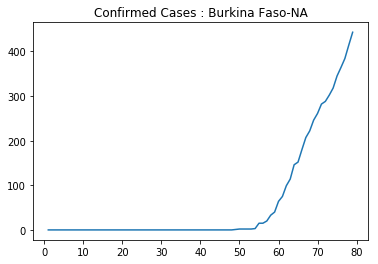

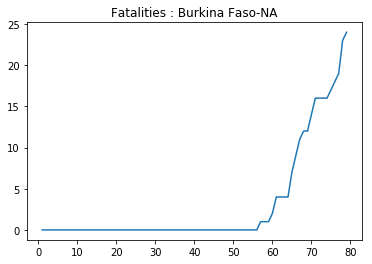



Panama-NA


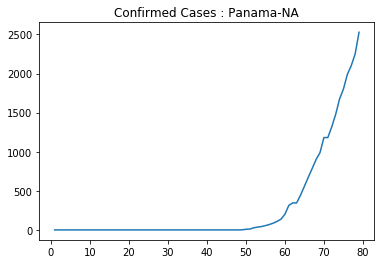

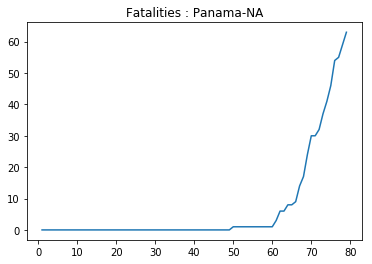



Peru-NA


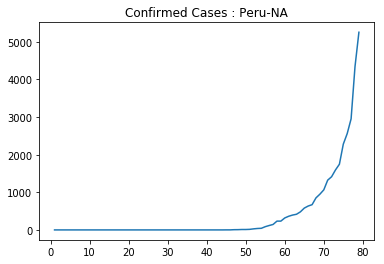

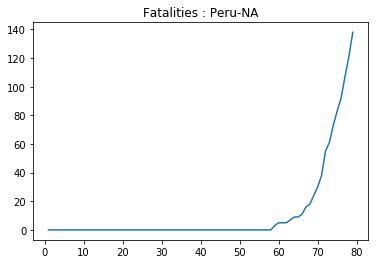



South Sudan-NA


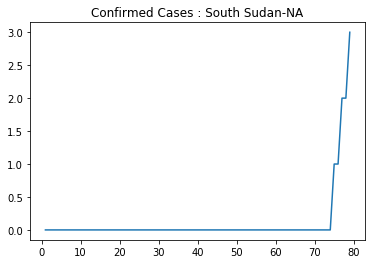

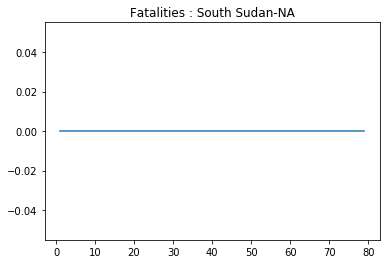



Iraq-NA


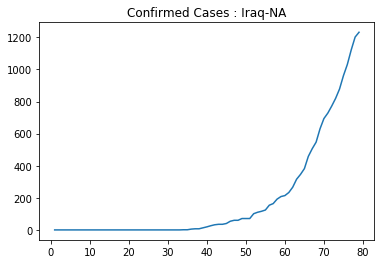

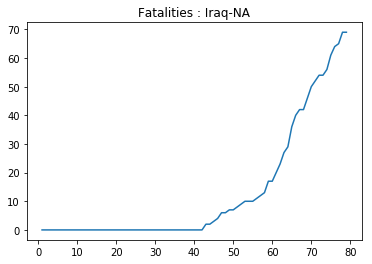



US-Colorado


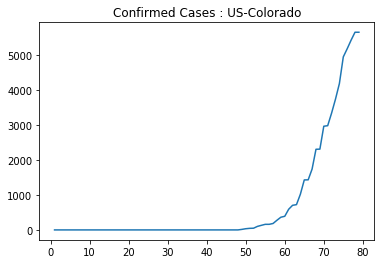

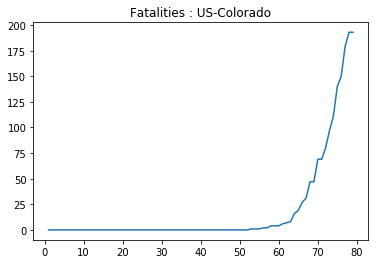



Nepal-NA


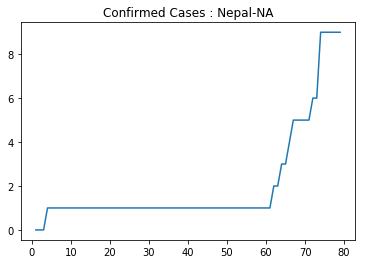

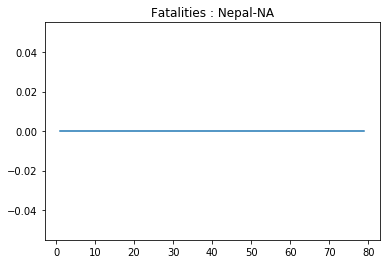



France-Mayotte


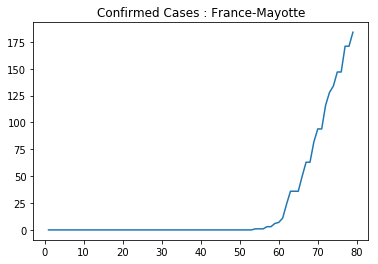

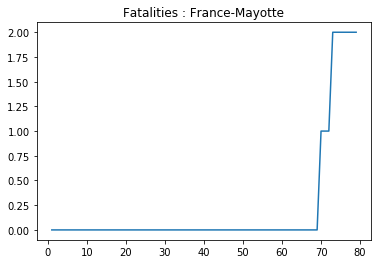



Gambia-NA


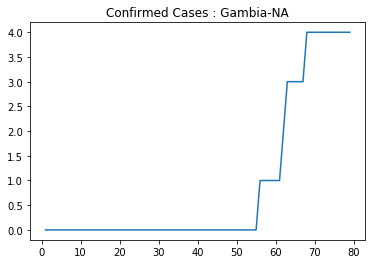

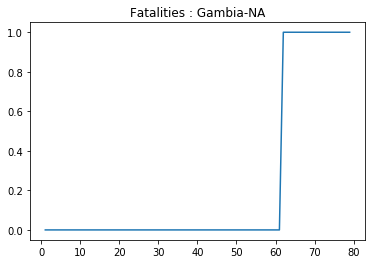



Honduras-NA


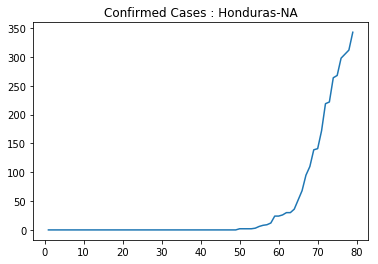

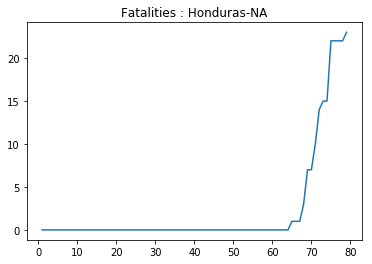



China-Tianjin


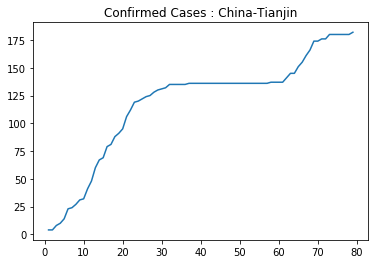

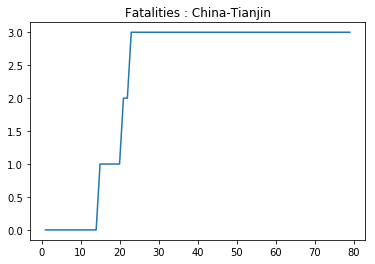



Bangladesh-NA


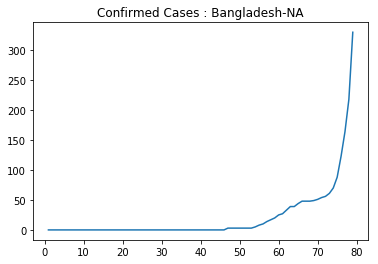

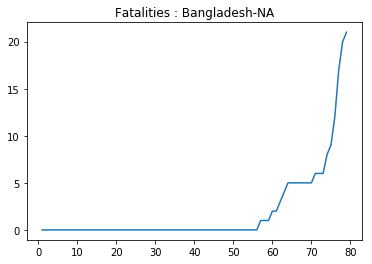



Jordan-NA


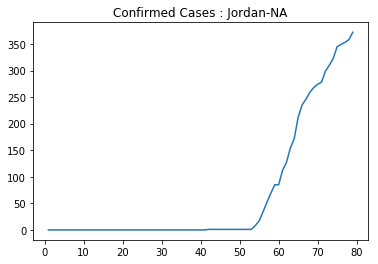

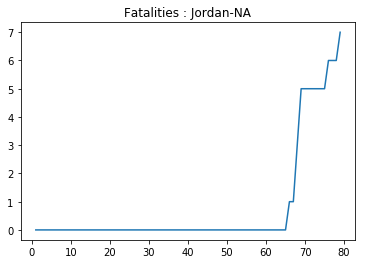



Cyprus-NA


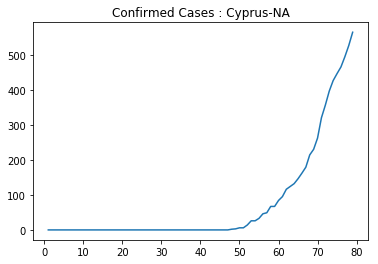

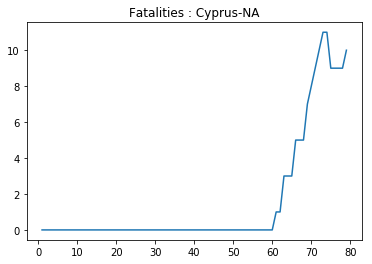



China-Chongqing


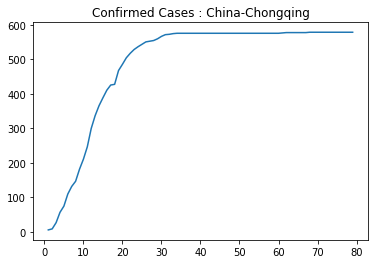

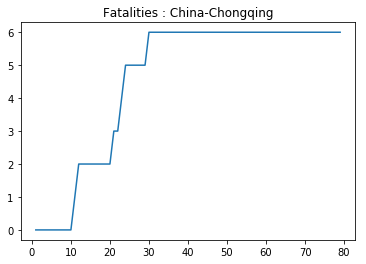



US-Louisiana


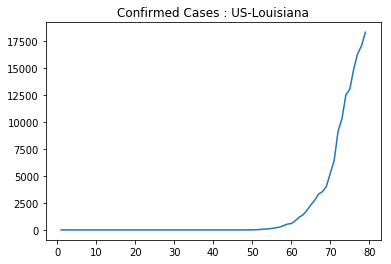

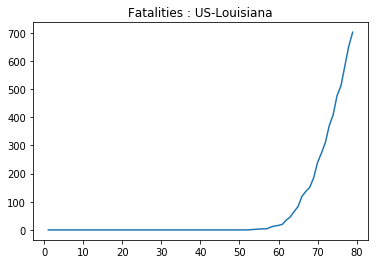



China-Liaoning


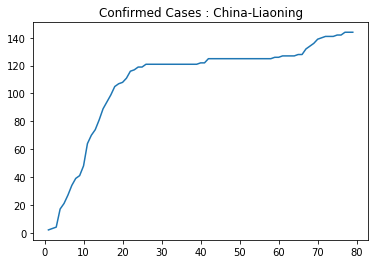

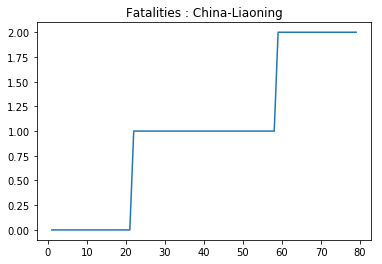



US-Utah


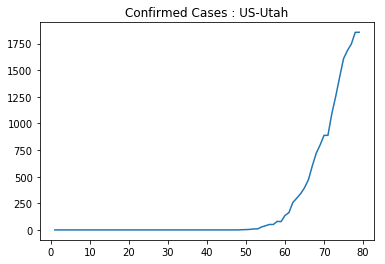

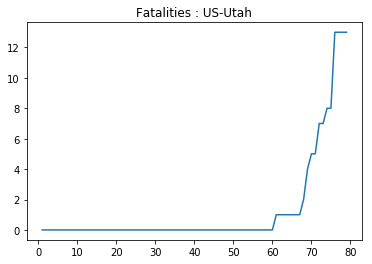



United Arab Emirates-NA


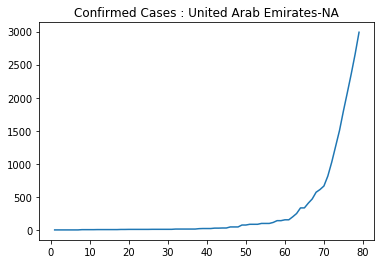

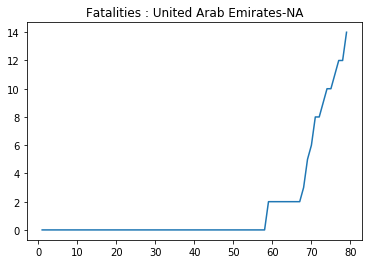



Belgium-NA


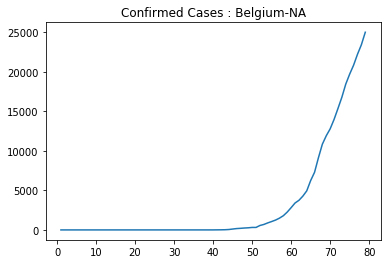

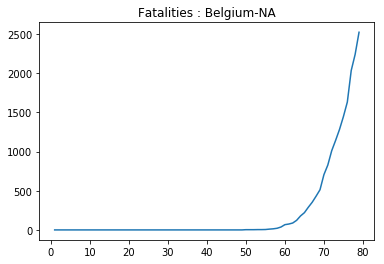



Kyrgyzstan-NA


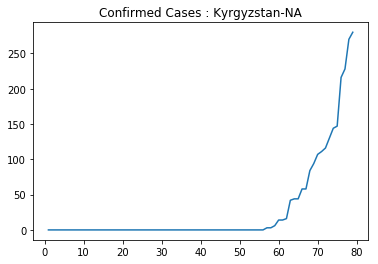

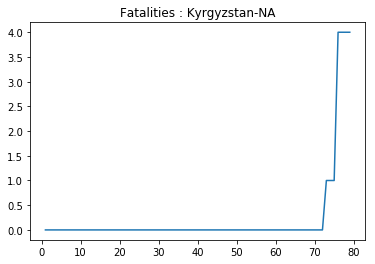



Malawi-NA


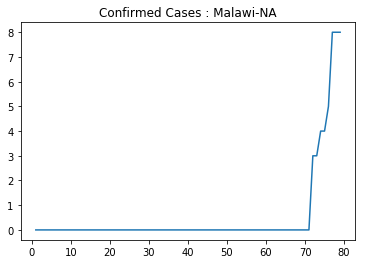

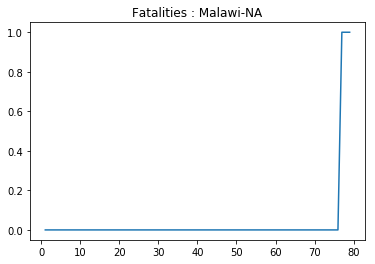



US-Alabama


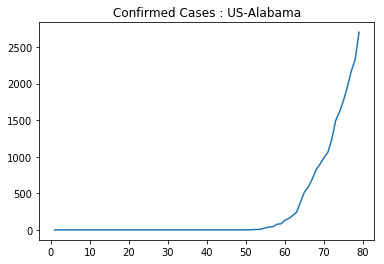

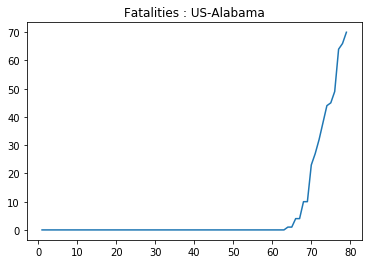



Australia-Western Australia


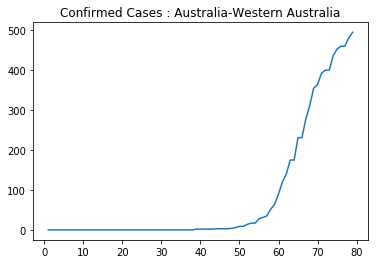

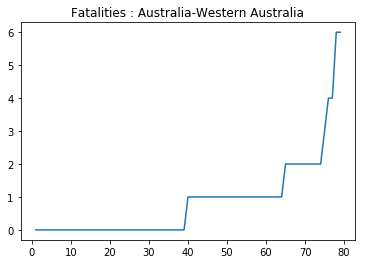



China-Tibet


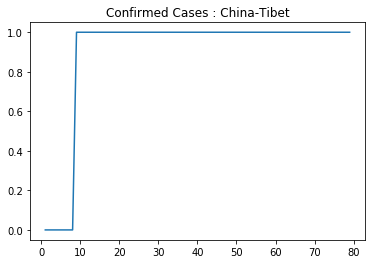

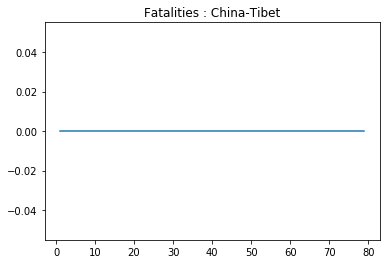



Czechia-NA


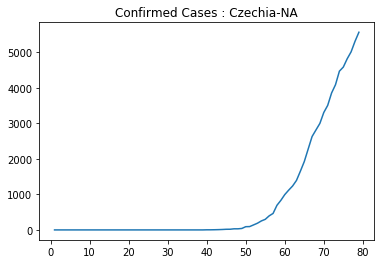

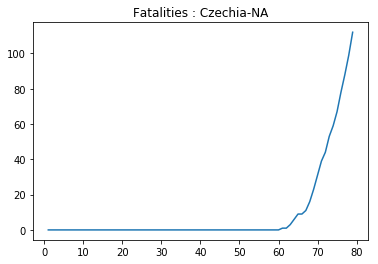



China-Shanghai


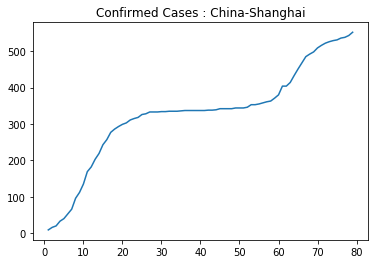

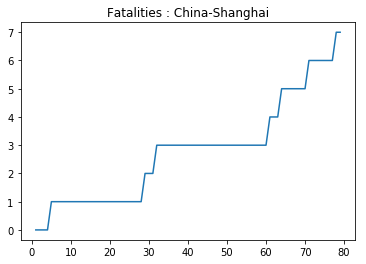



Brazil-NA


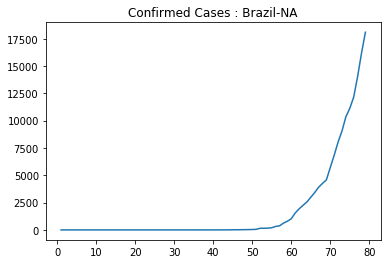

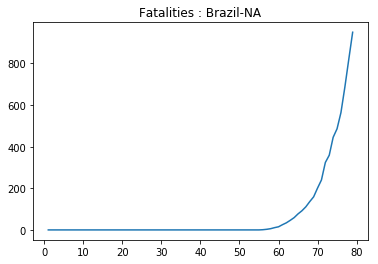



Georgia-NA


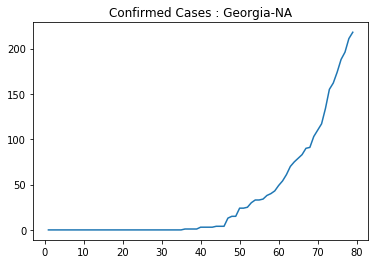

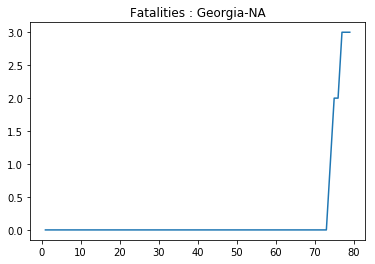



Barbados-NA


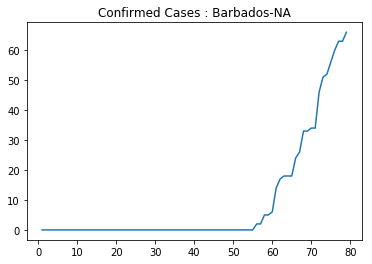

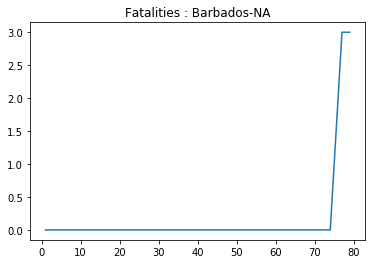



Bolivia-NA


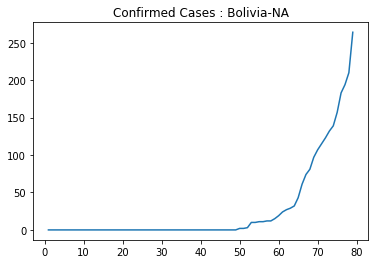

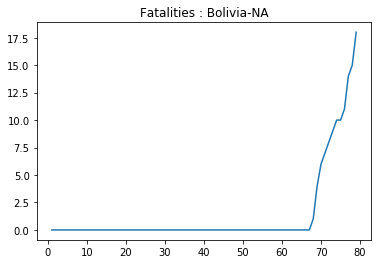



Kazakhstan-NA


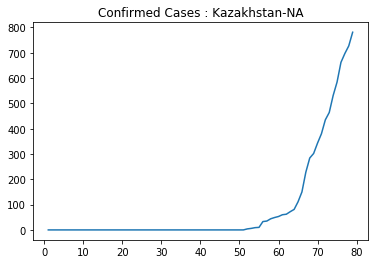

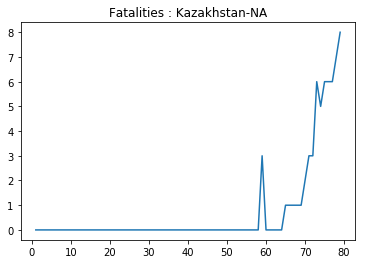



Canada-British Columbia


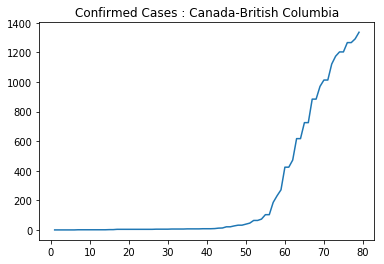

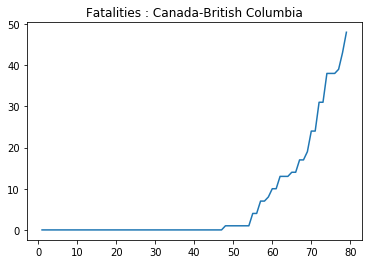



Romania-NA


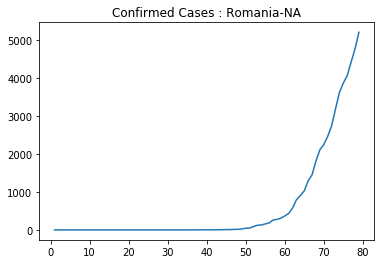

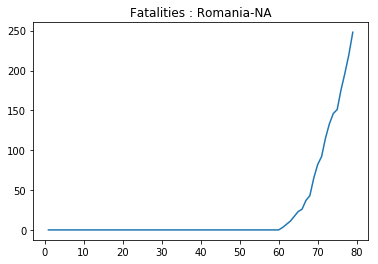



Ukraine-NA


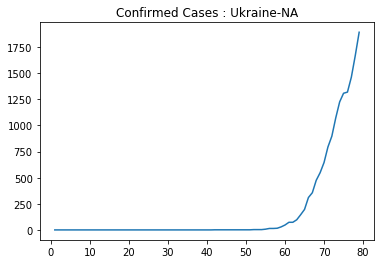

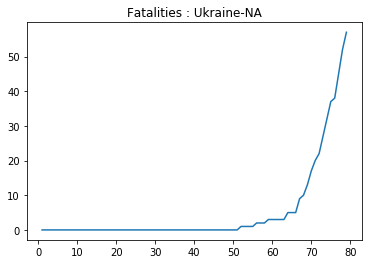



West Bank and Gaza-NA


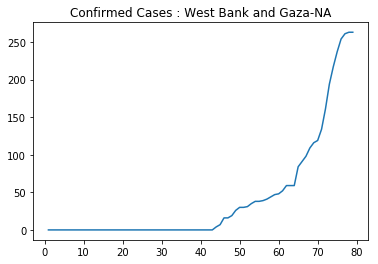

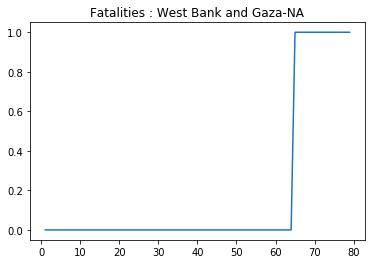



US-Michigan


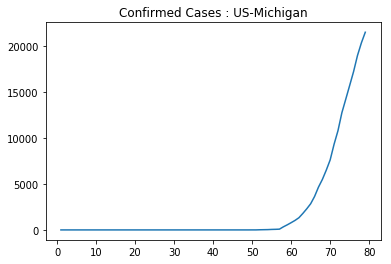

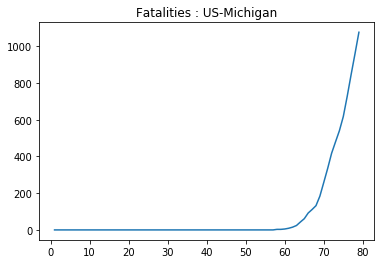



Kosovo-NA


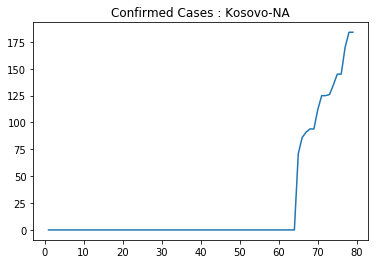

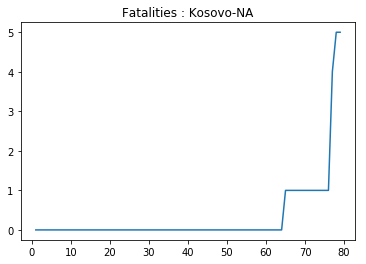



Liechtenstein-NA


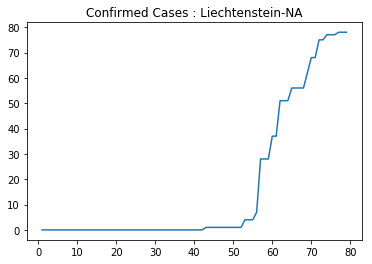

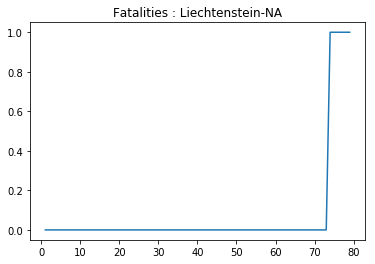



US-New York


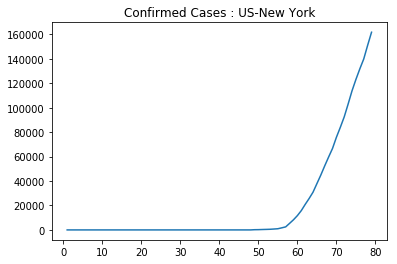

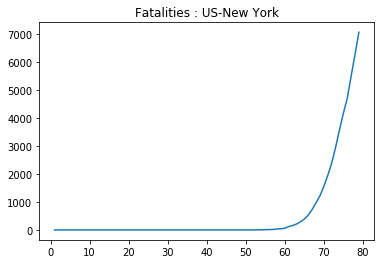



Canada-New Brunswick


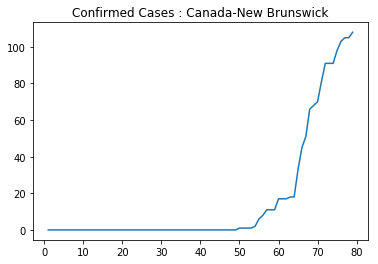

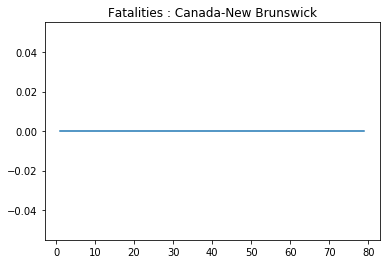



China-Macau


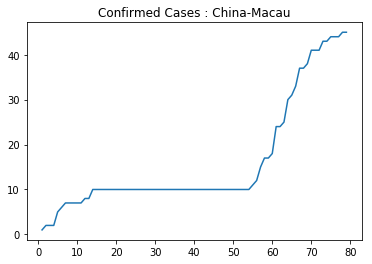

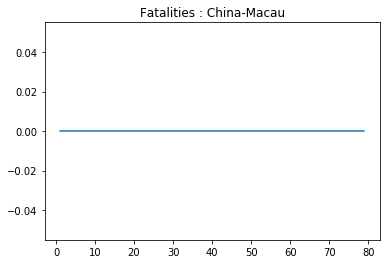



Equatorial Guinea-NA


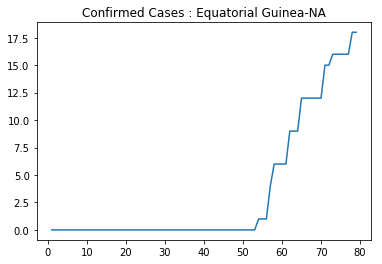

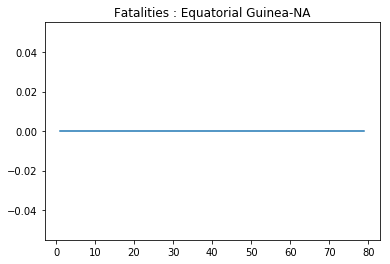



New Zealand-NA


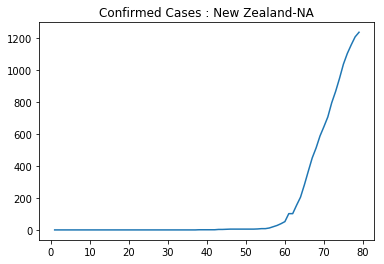

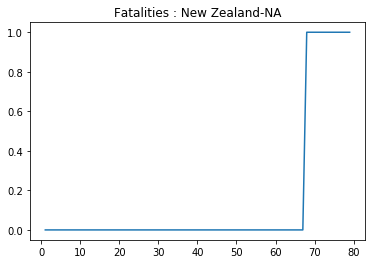



Somalia-NA


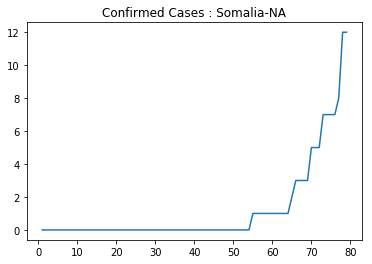

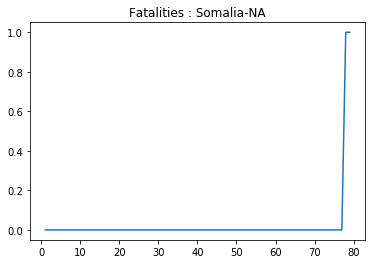



Burundi-NA


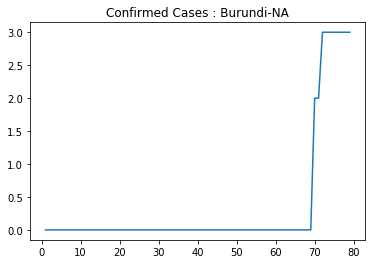

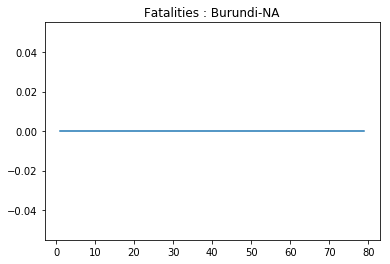



Canada-Ontario


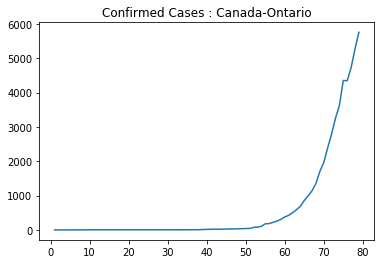

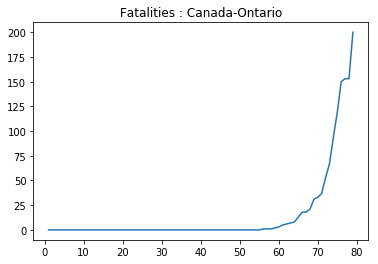



Fiji-NA


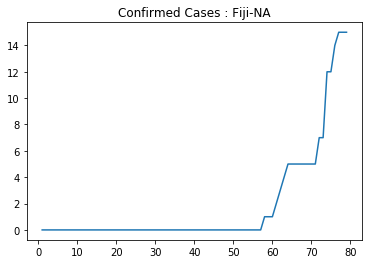

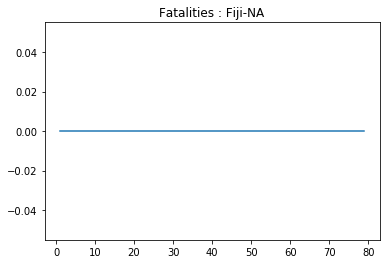



Venezuela-NA


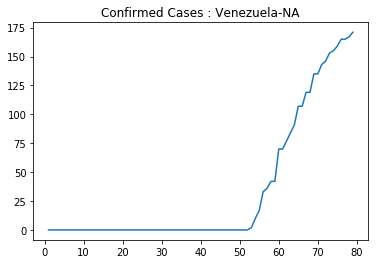

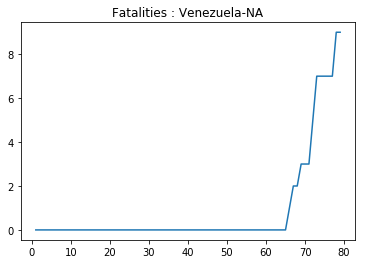



US-Illinois


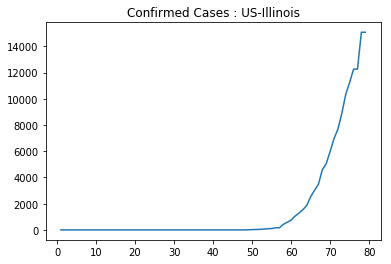

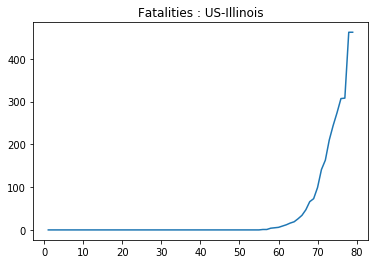



Moldova-NA


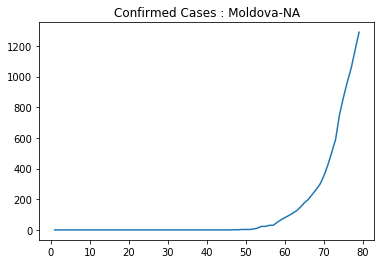

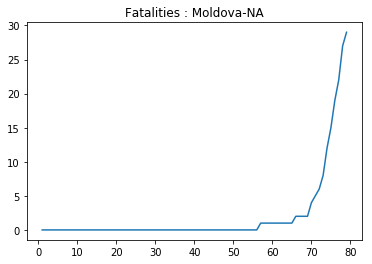



Canada-Alberta


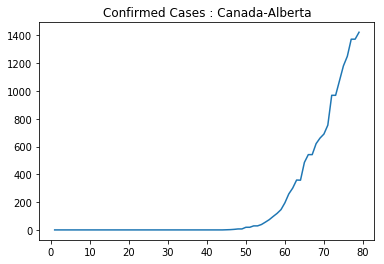

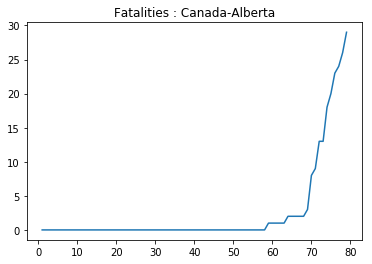



Switzerland-NA


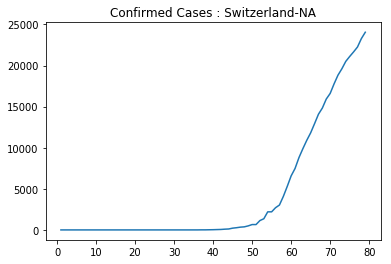

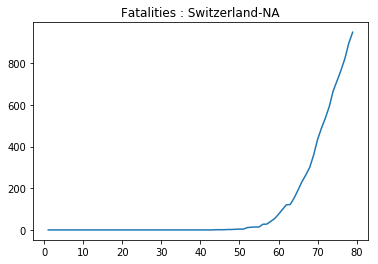



Hungary-NA


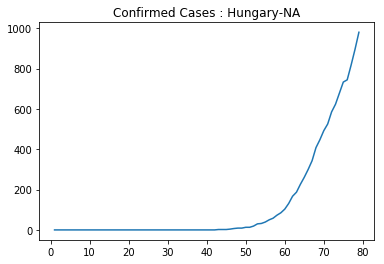

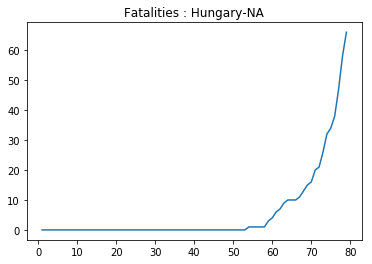



Netherlands-Bonaire, Sint Eustatius and Saba


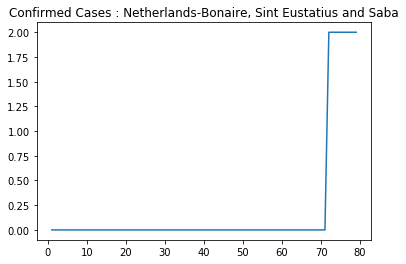

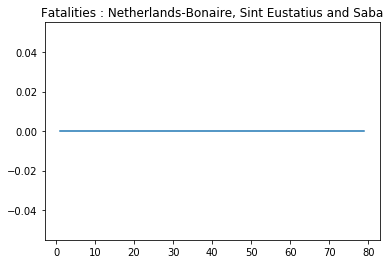



China-Qinghai


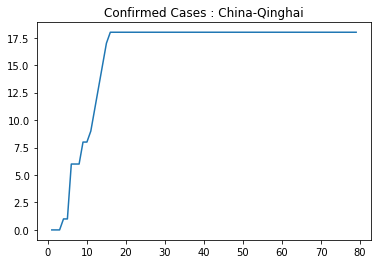

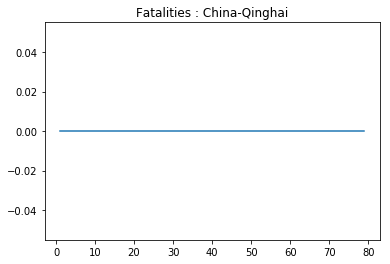



China-Yunnan


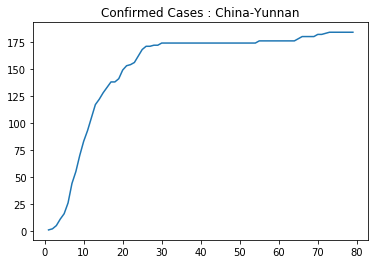

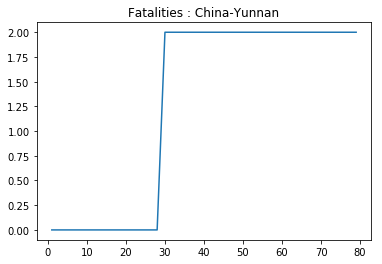



Taiwan*-NA


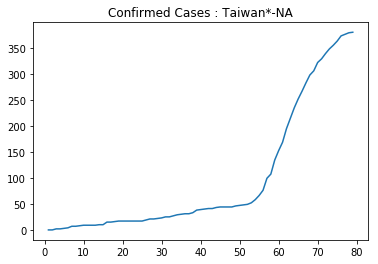

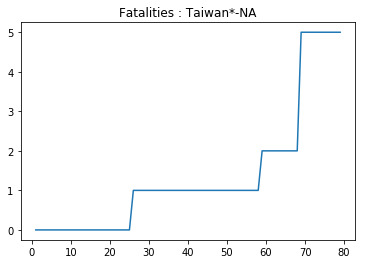



US-Georgia


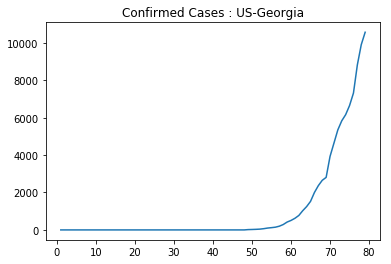

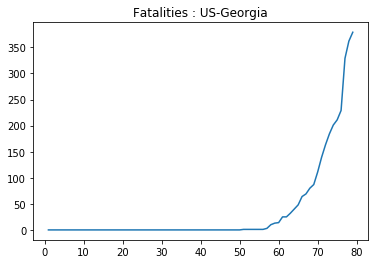



China-Hubei


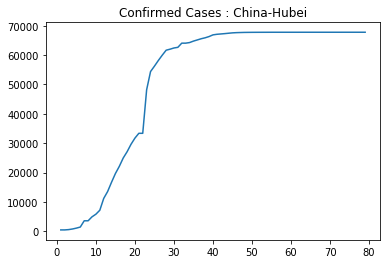

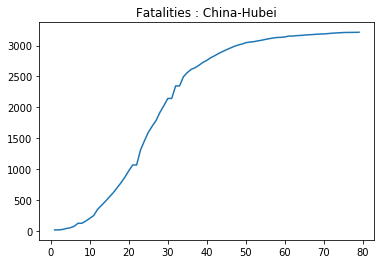



Australia-Victoria


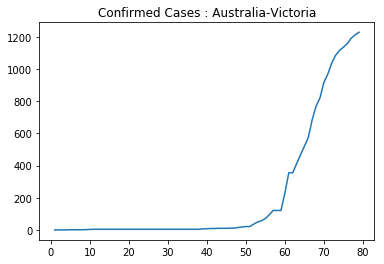

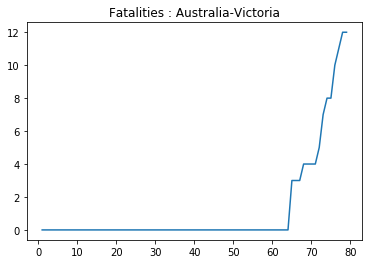



Saint Kitts and Nevis-NA


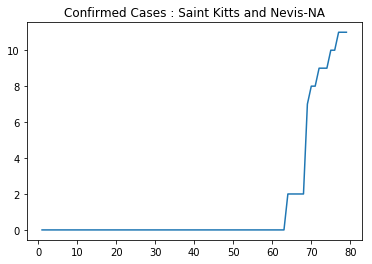

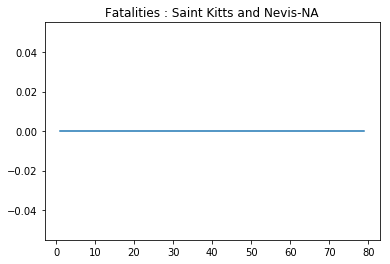



Pakistan-NA


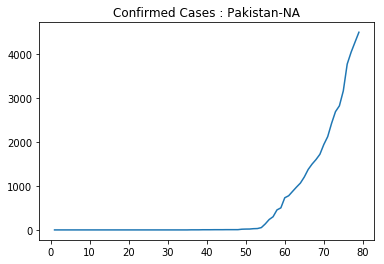

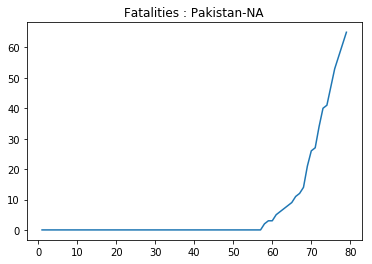



US-Nebraska


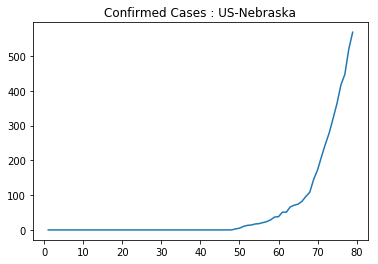

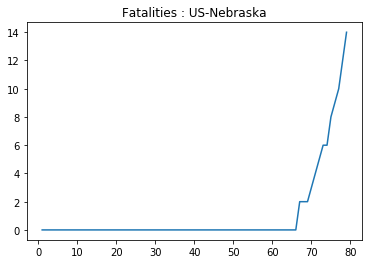



China-Guangxi


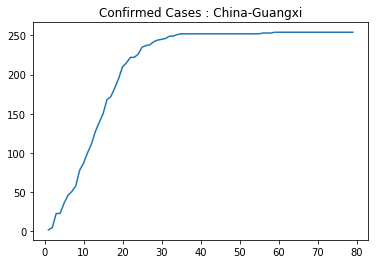

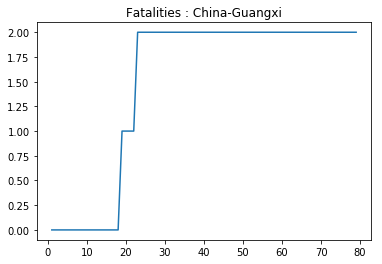



France-New Caledonia


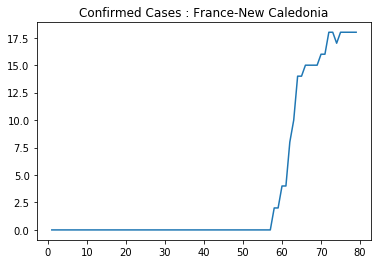

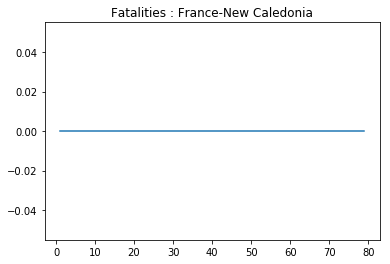



Kuwait-NA


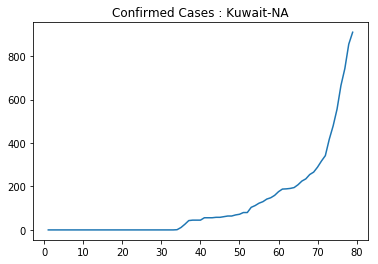

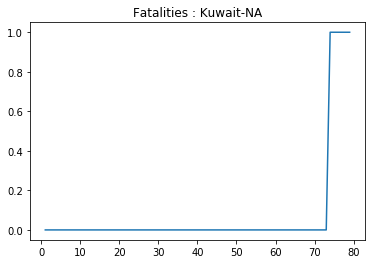



Austria-NA


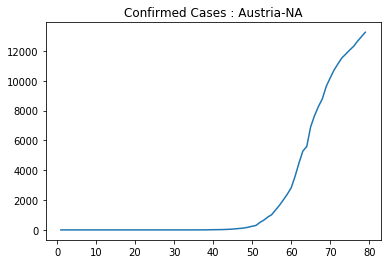

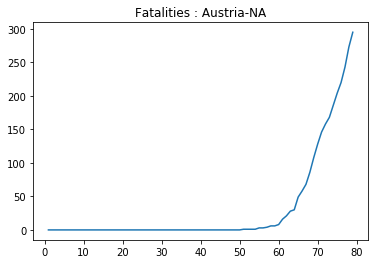



US-Wisconsin


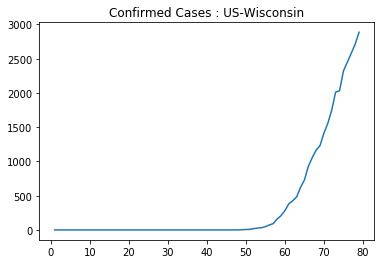

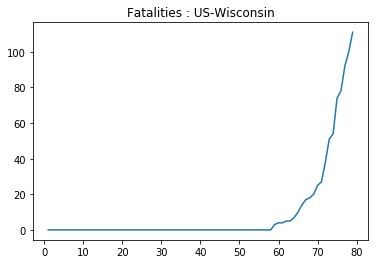



US-Oklahoma


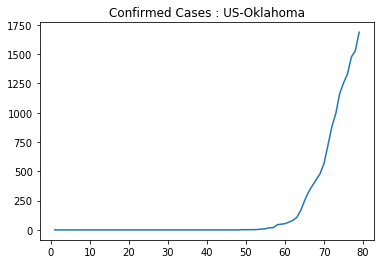

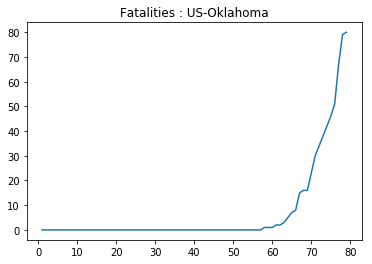



Bhutan-NA


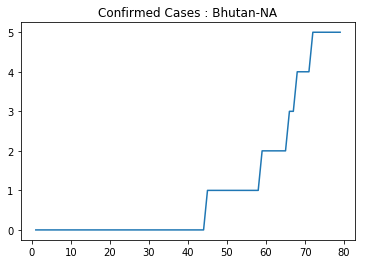

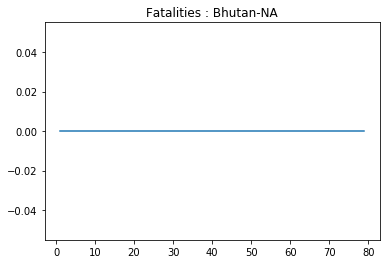



Syria-NA


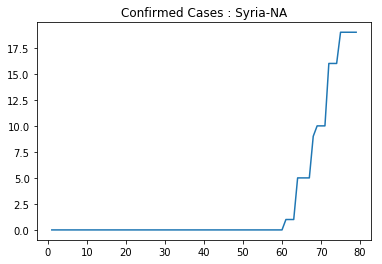

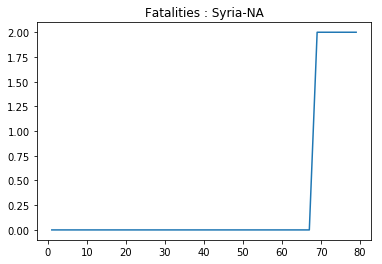



Kenya-NA


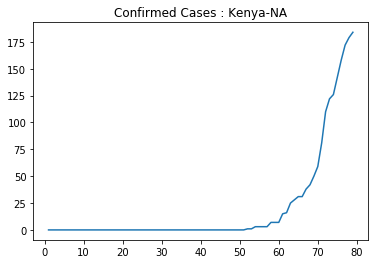

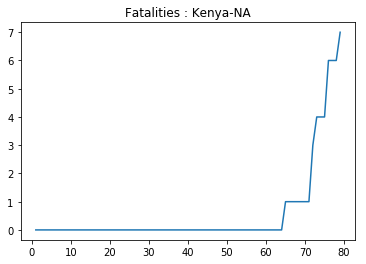



Argentina-NA


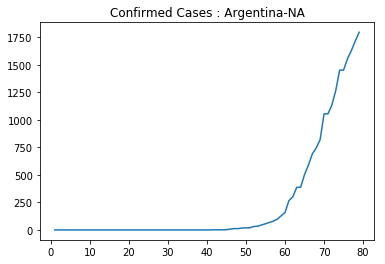

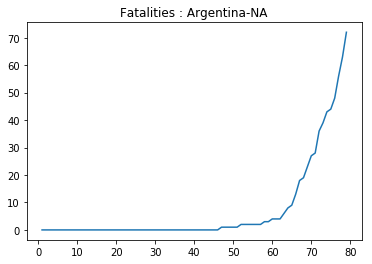



China-Jilin


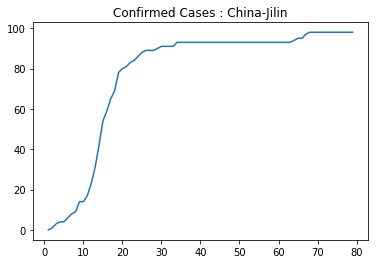

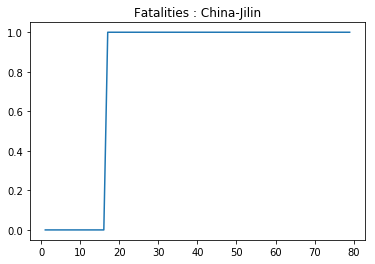



Mali-NA


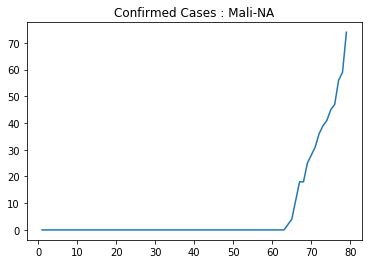

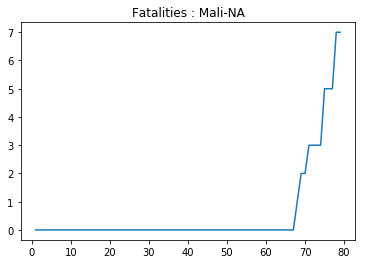



Namibia-NA


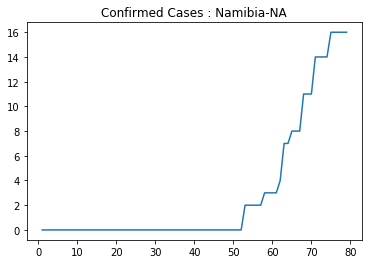

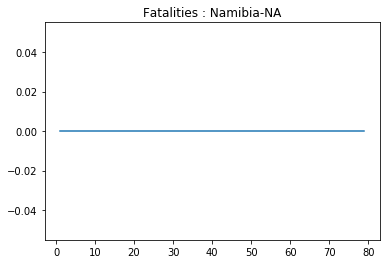



Benin-NA


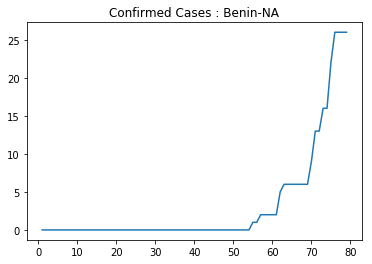

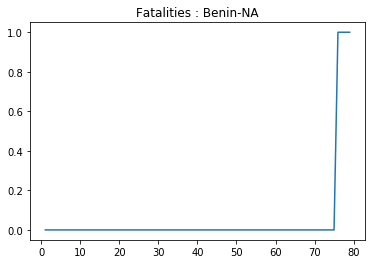



Latvia-NA


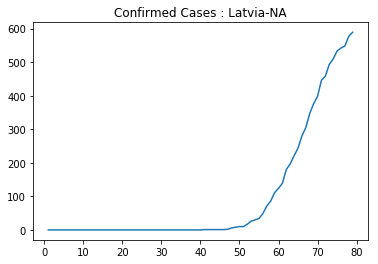

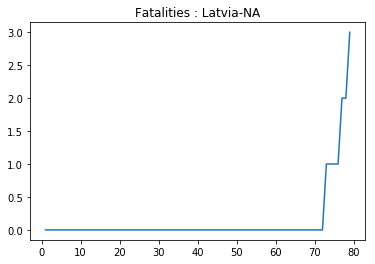



US-Massachusetts


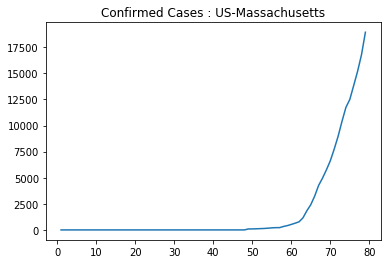

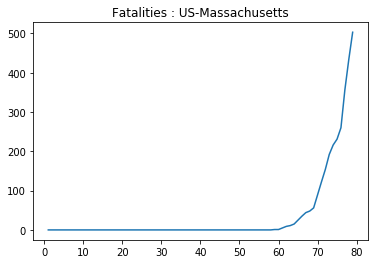



Djibouti-NA


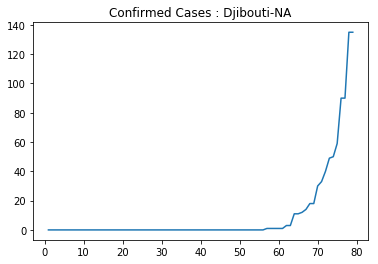

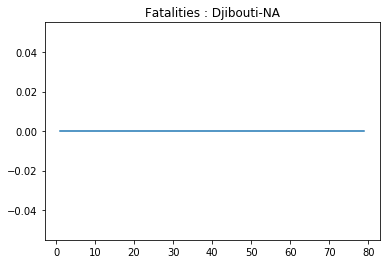



Morocco-NA


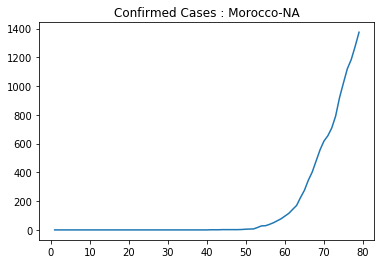

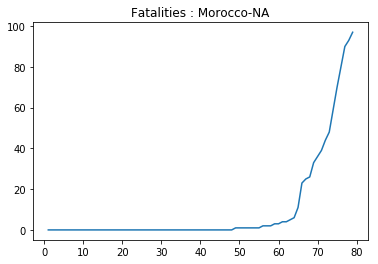



Cameroon-NA


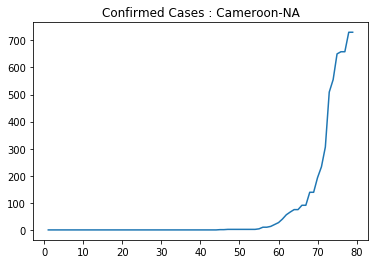

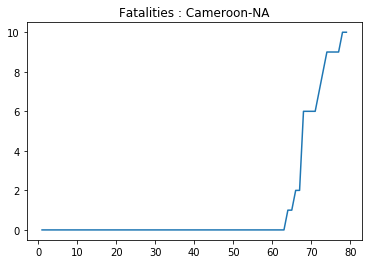



Eswatini-NA


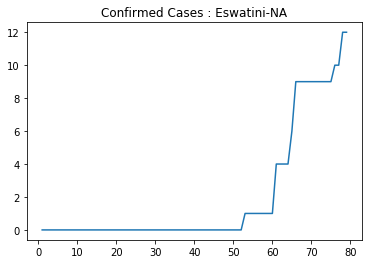

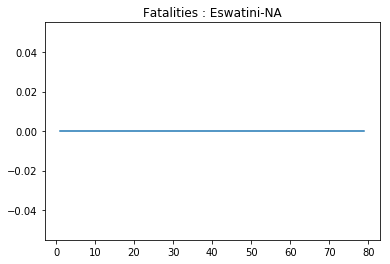



Norway-NA


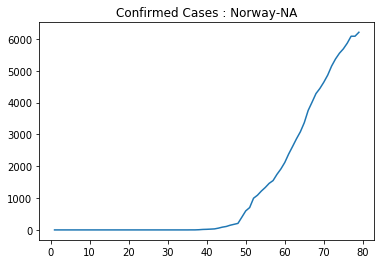

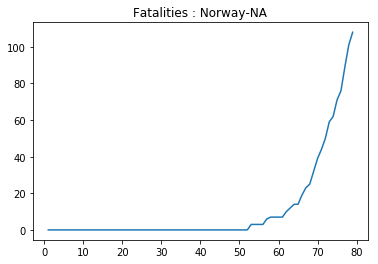



China-Hunan


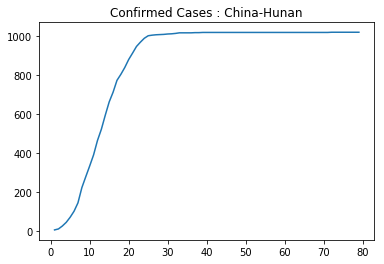

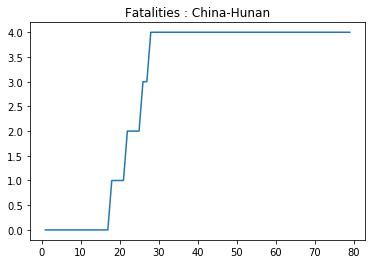



Oman-NA


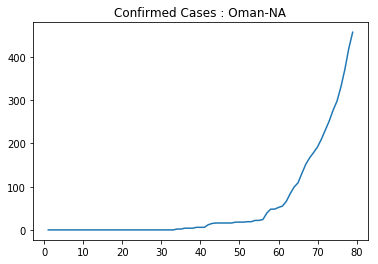

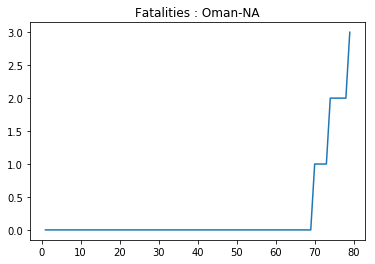



Saint Vincent and the Grenadines-NA


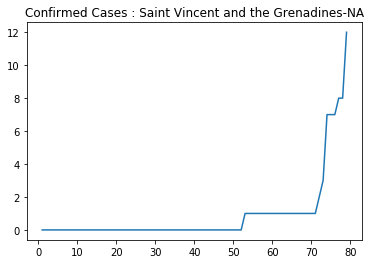

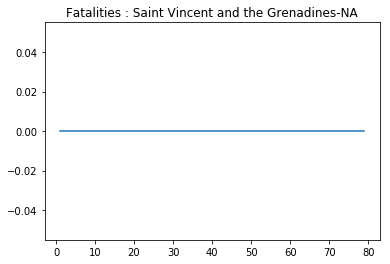



Sudan-NA


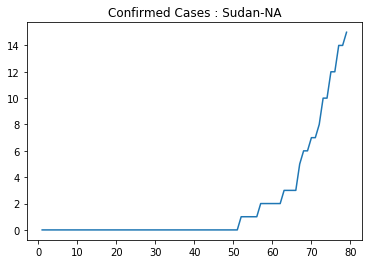

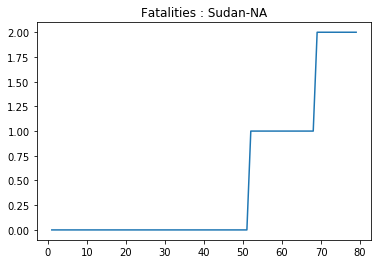



US-Montana


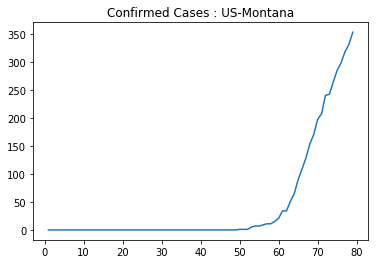

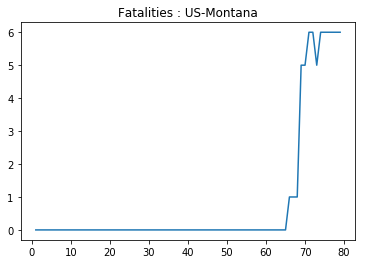



US-Washington


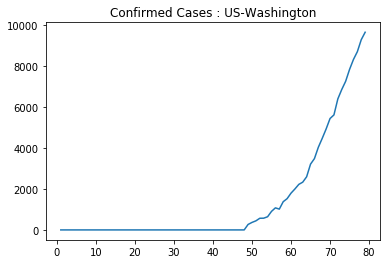

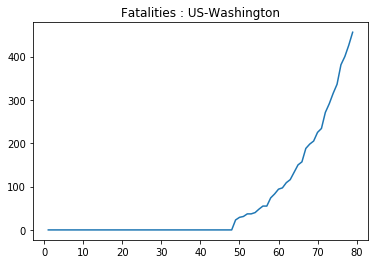



France-French Guiana


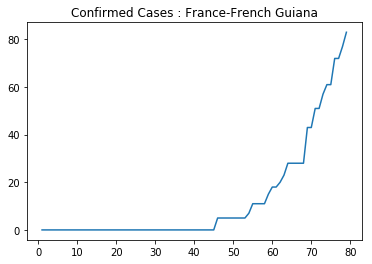

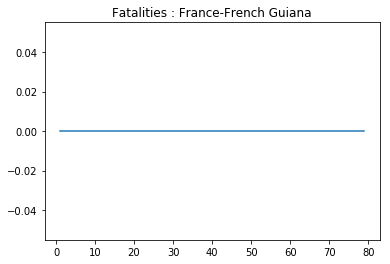



United Kingdom-NA


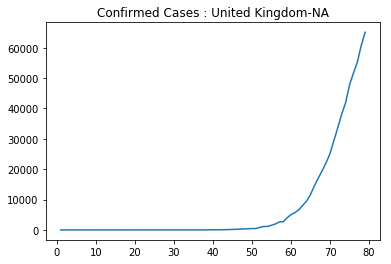

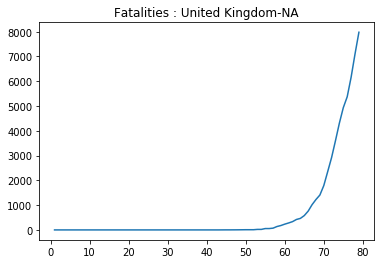



Grenada-NA


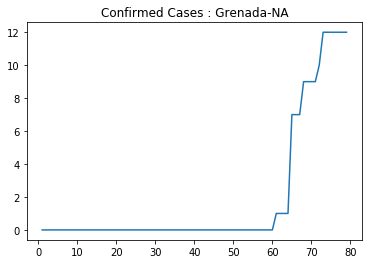

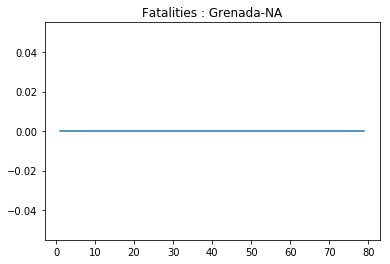



Belarus-NA


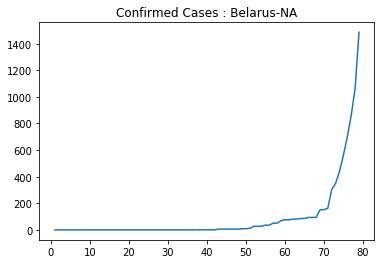

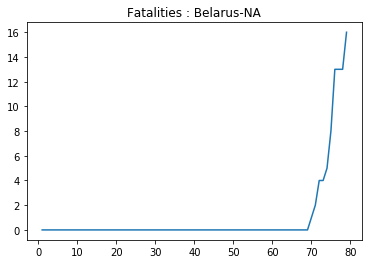



Andorra-NA


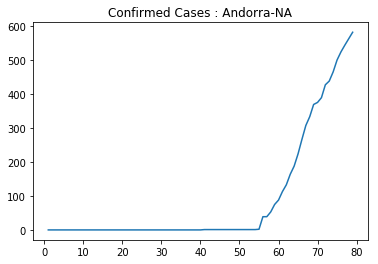

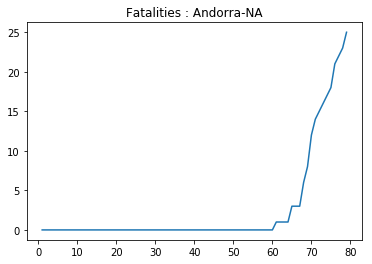



China-Hainan


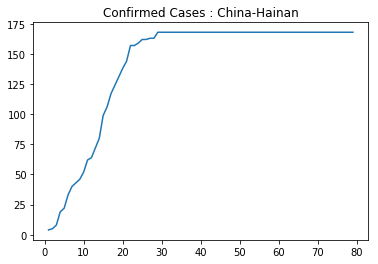

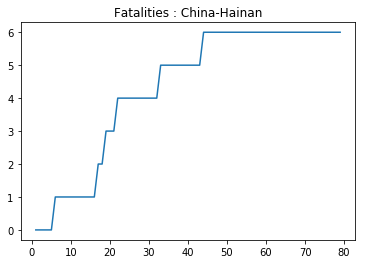



Iceland-NA


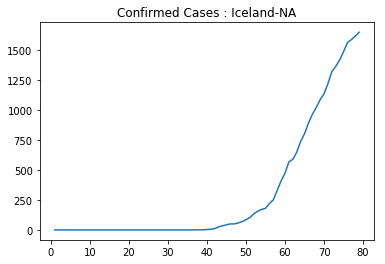

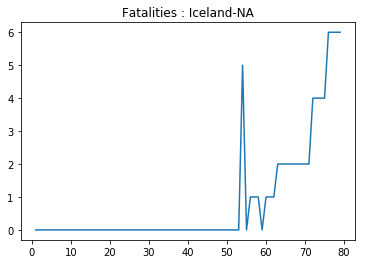



Laos-NA


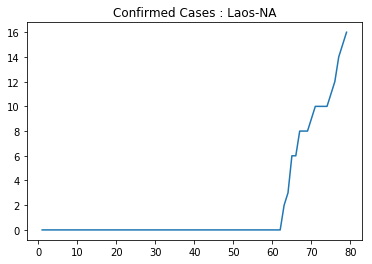

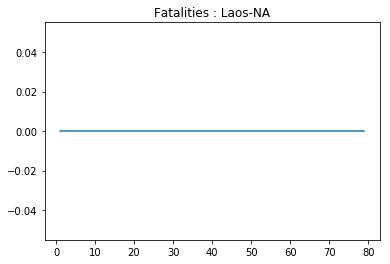



Ghana-NA


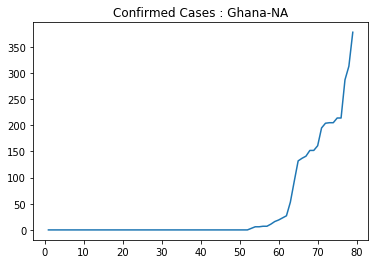

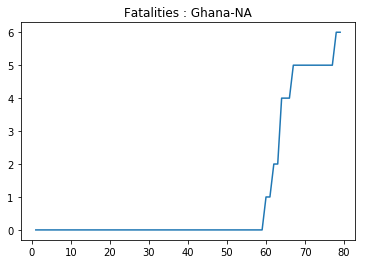



Guinea-NA


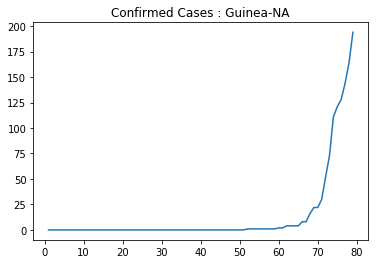

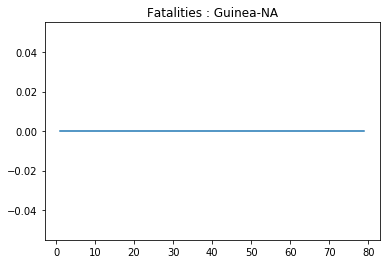



Nicaragua-NA


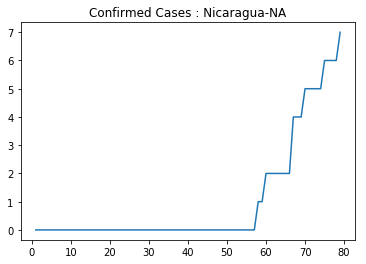

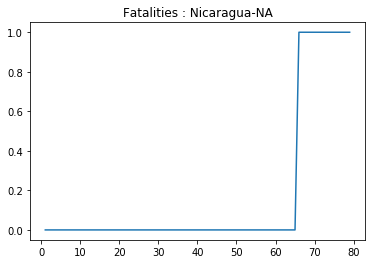



China-Fujian


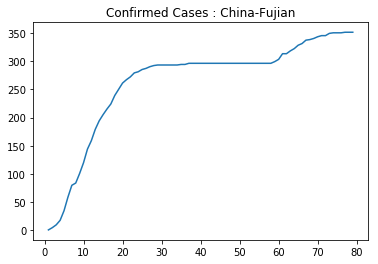

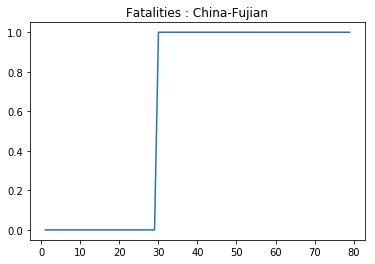



Finland-NA


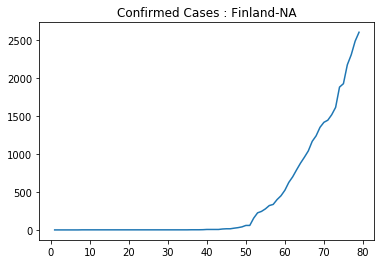

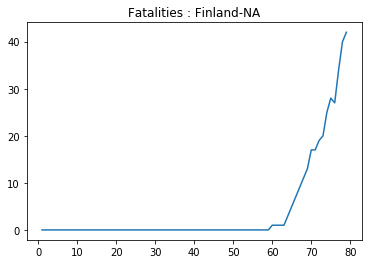



US-South Carolina


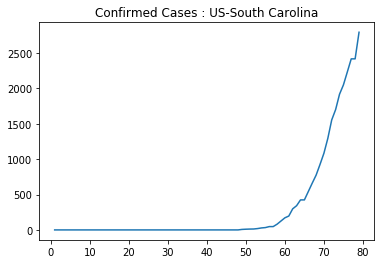

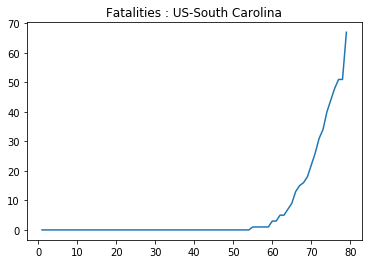



Mongolia-NA


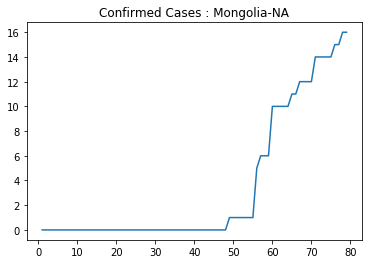

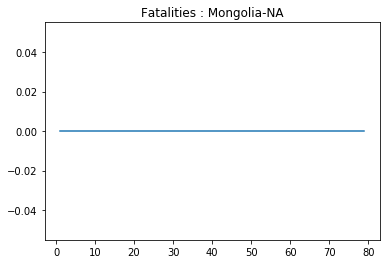



Afghanistan-NA


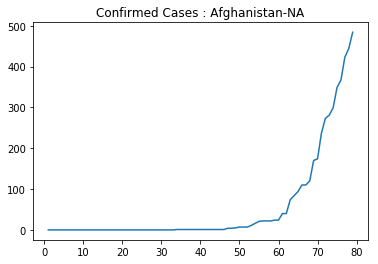

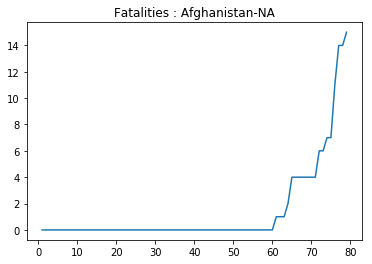



United Kingdom-Cayman Islands


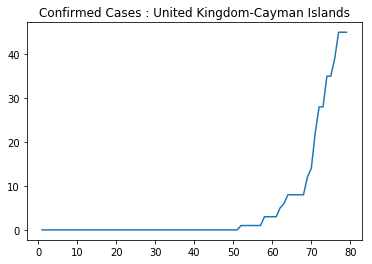

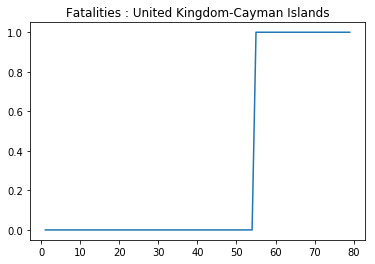



Australia-South Australia


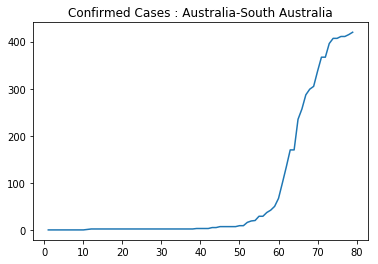

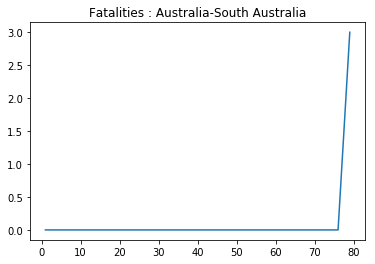



France-Reunion


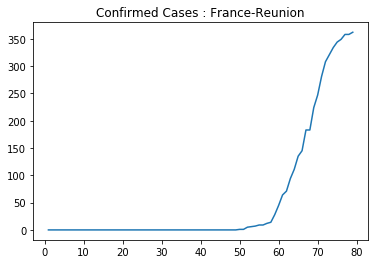

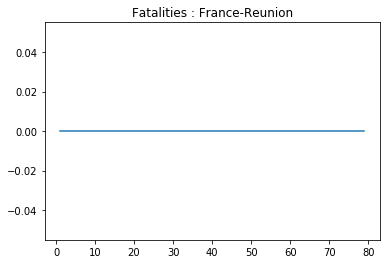



Malaysia-NA


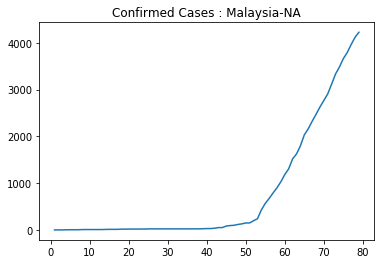

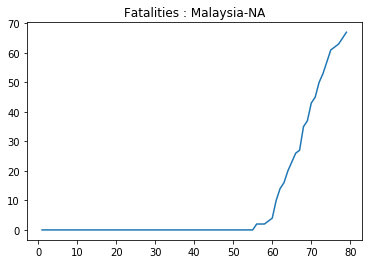



Canada-Prince Edward Island


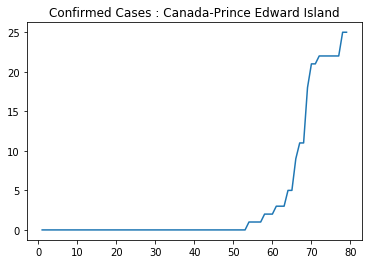

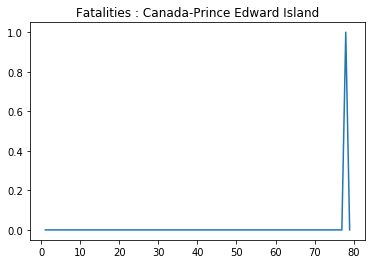



Luxembourg-NA


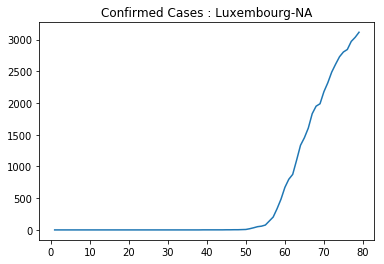

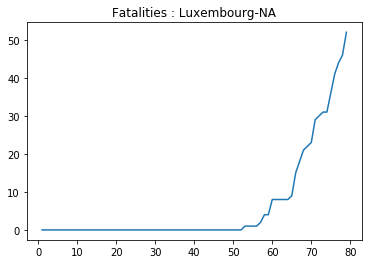



United Kingdom-Isle of Man


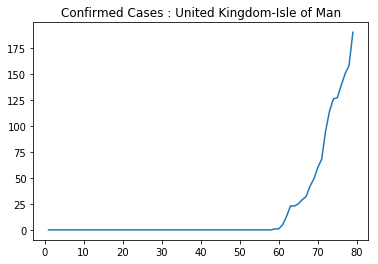

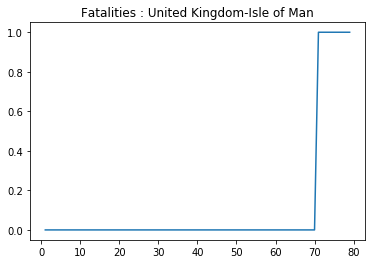



United Kingdom-Channel Islands


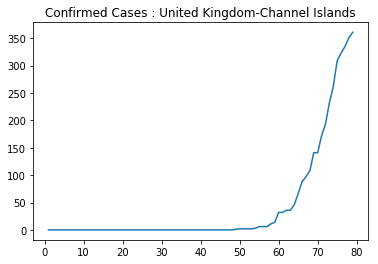

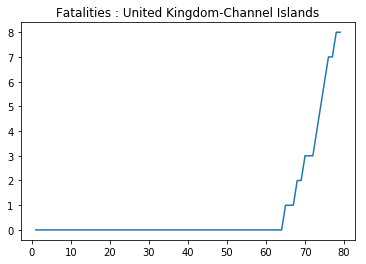



Seychelles-NA


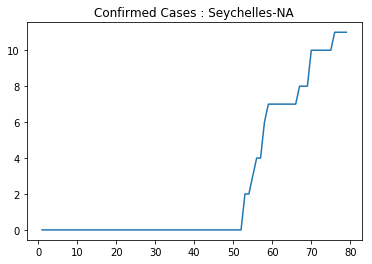

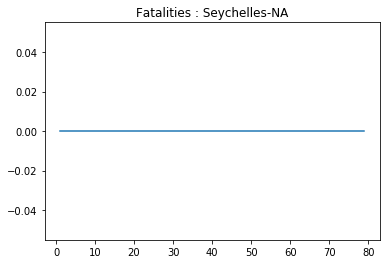



Uzbekistan-NA


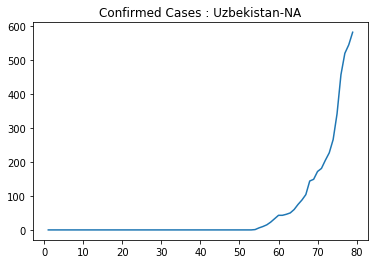

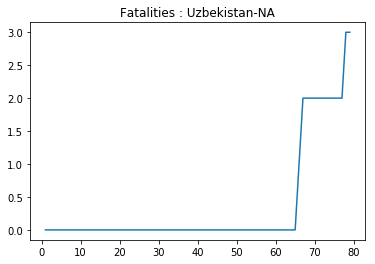



France-Martinique


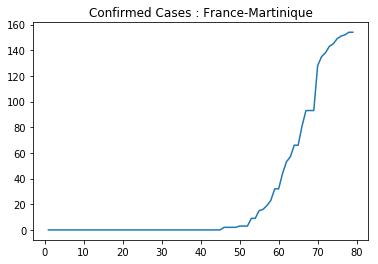

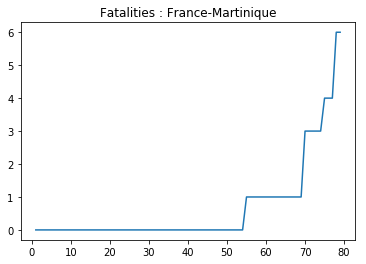



South Africa-NA


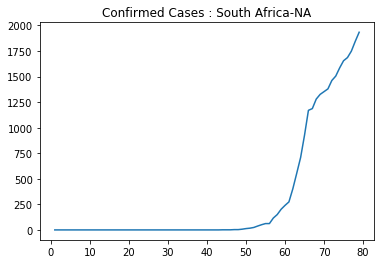

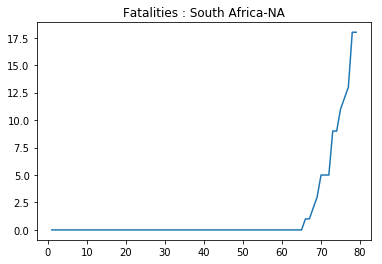



US-Rhode Island


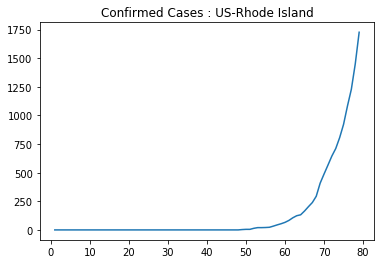

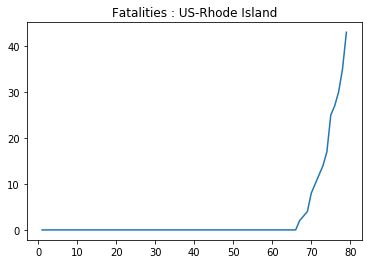



China-Xinjiang


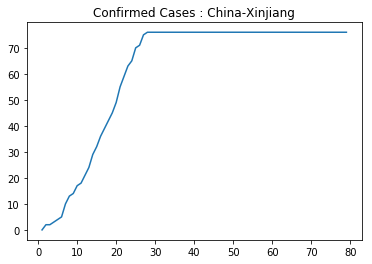

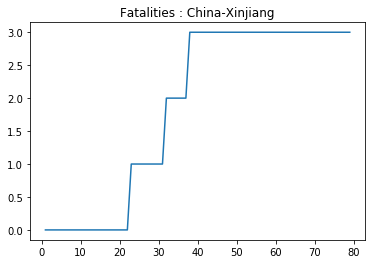



Paraguay-NA


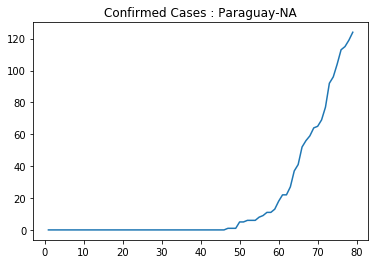

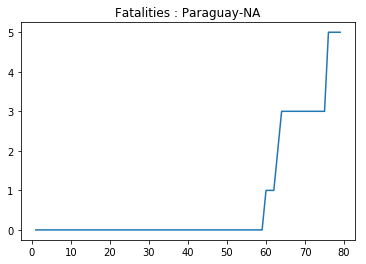



Portugal-NA


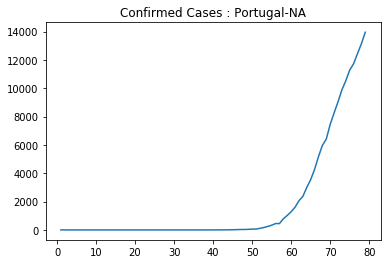

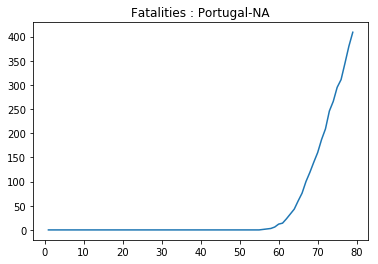



Zambia-NA


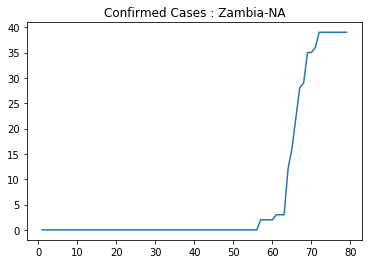

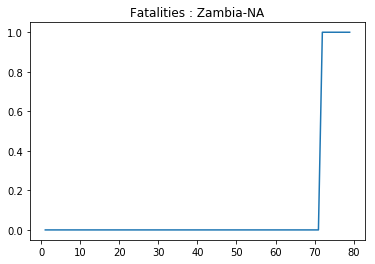



Australia-Tasmania


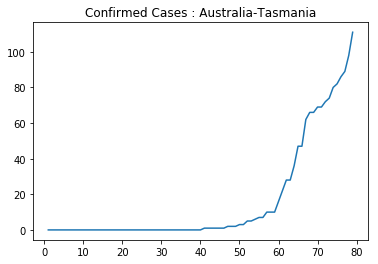

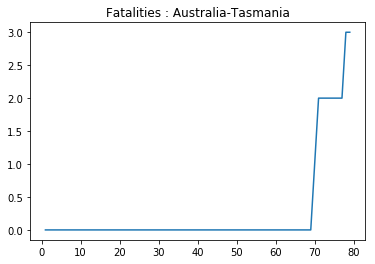



China-Ningxia


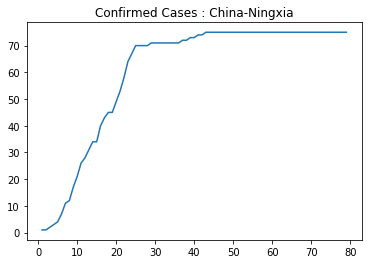

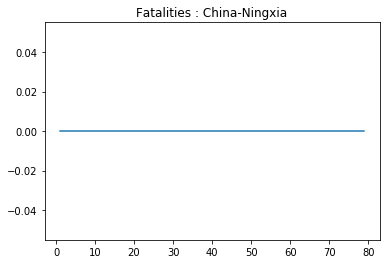



Slovakia-NA


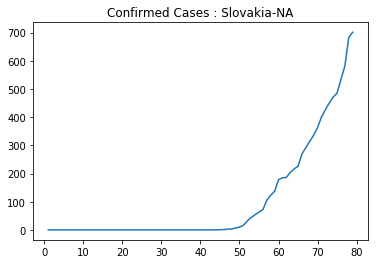

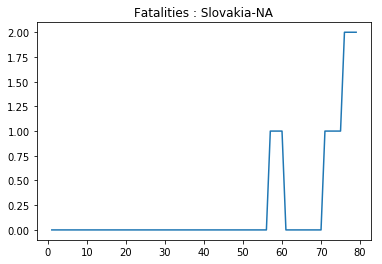



Turkey-NA


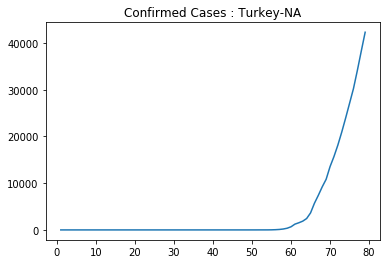

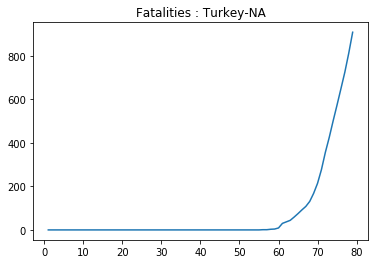



United Kingdom-Falkland Islands (Malvinas)


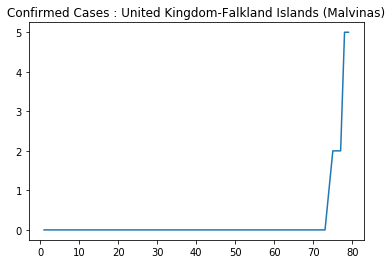

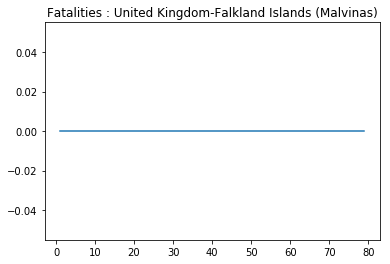



Australia-Northern Territory


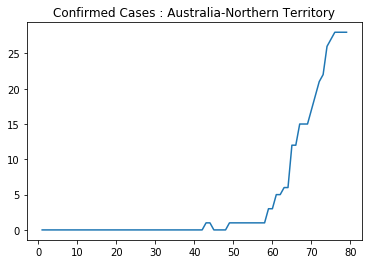

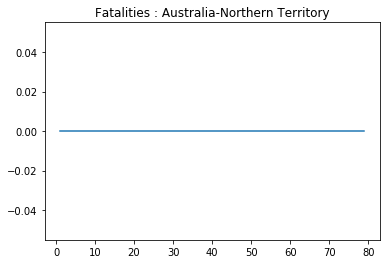



Indonesia-NA


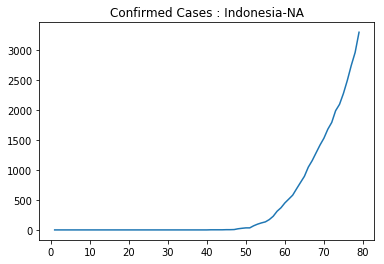

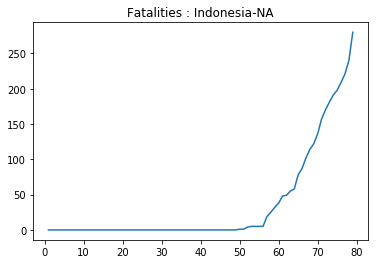



Costa Rica-NA


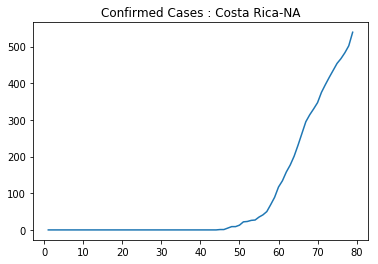

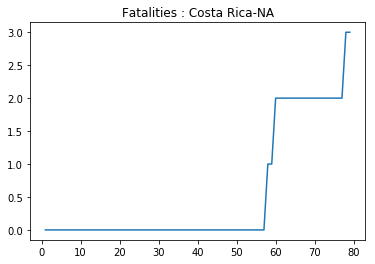



Lithuania-NA


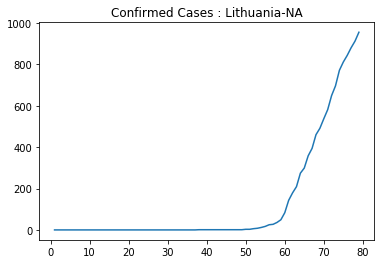

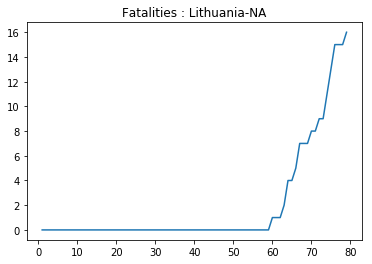



Nigeria-NA


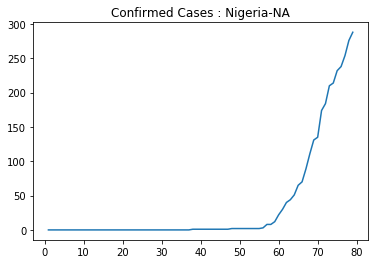

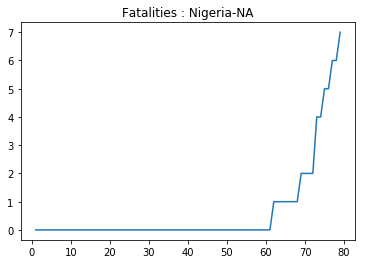



Lebanon-NA


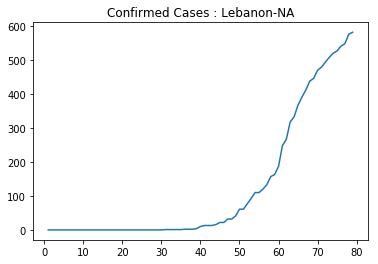

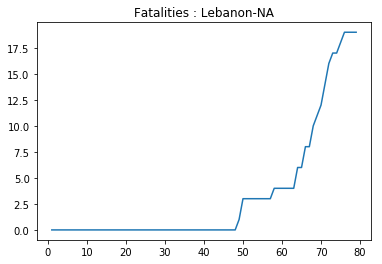



Iran-NA


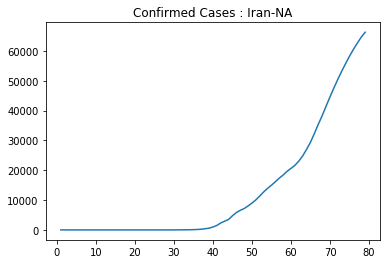

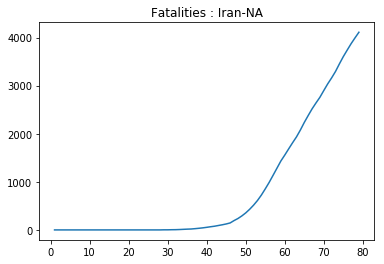



US-Idaho


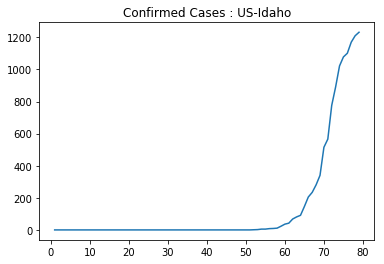

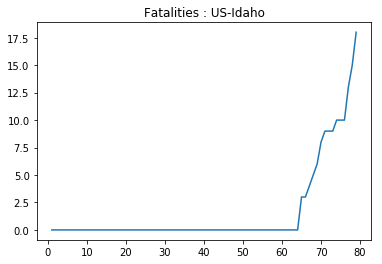



US-Arizona


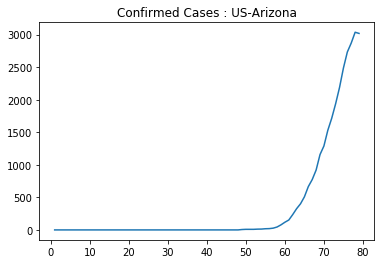

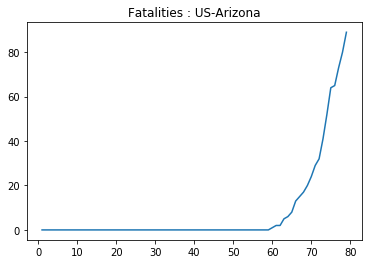



Uganda-NA


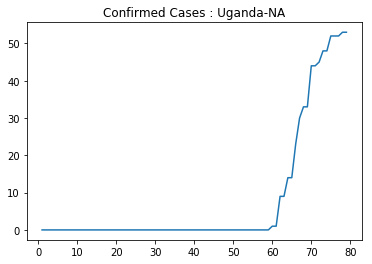

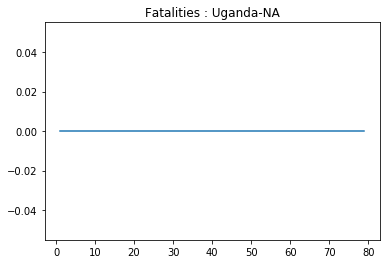



United Kingdom-Anguilla


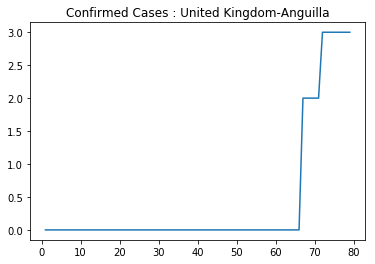

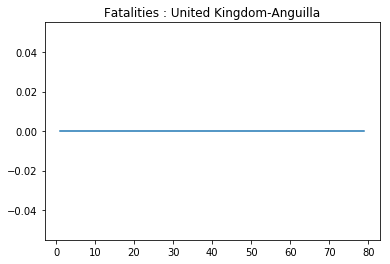



China-Anhui


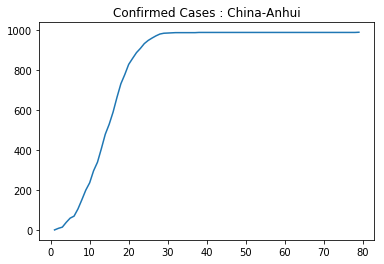

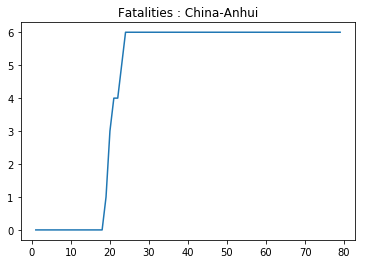



Zimbabwe-NA


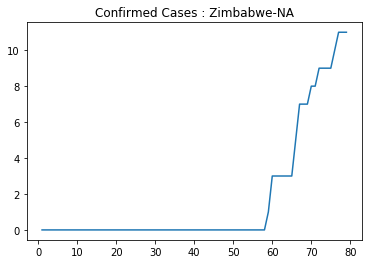

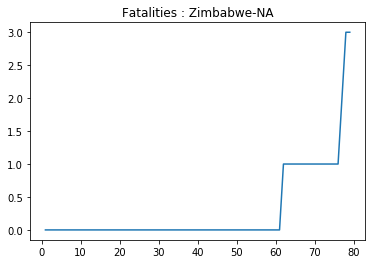



Colombia-NA


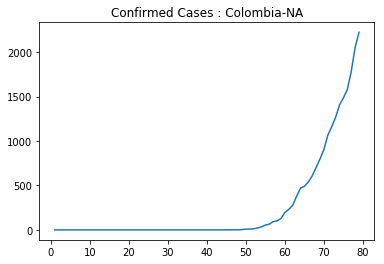

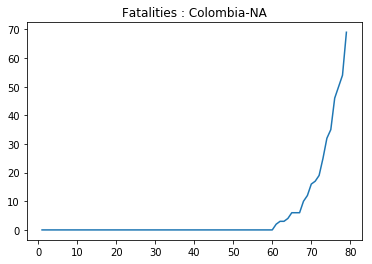



India-NA


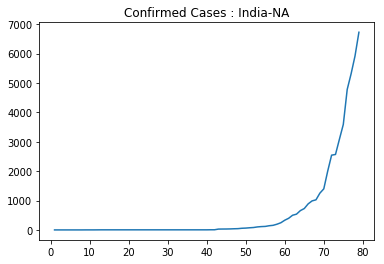

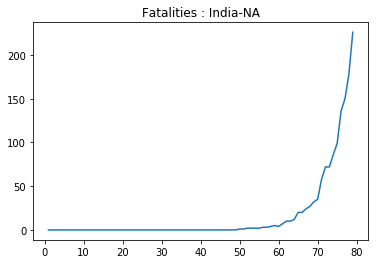



Denmark-Greenland


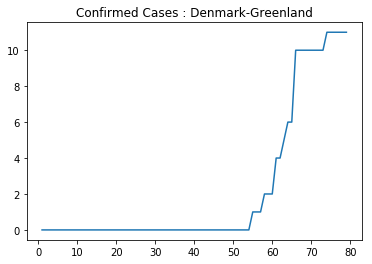

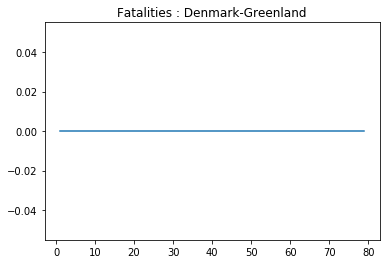



Monaco-NA


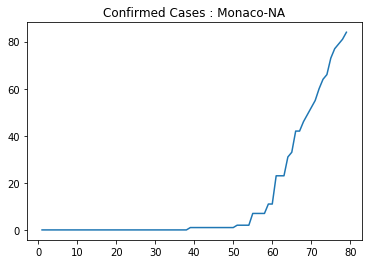

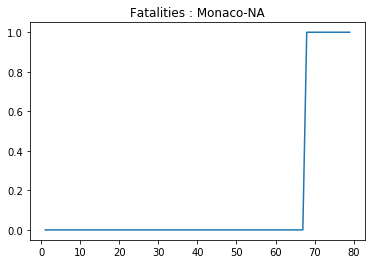



Rwanda-NA


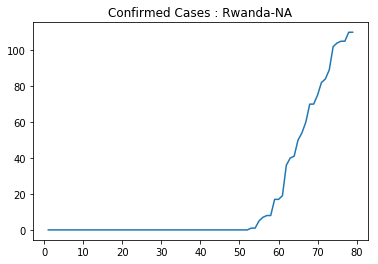

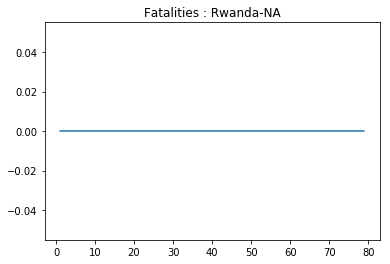



France-Saint Barthelemy


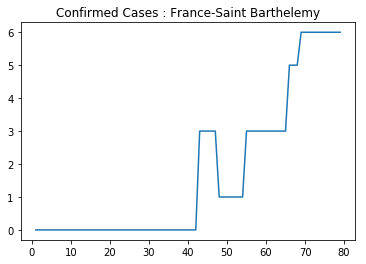

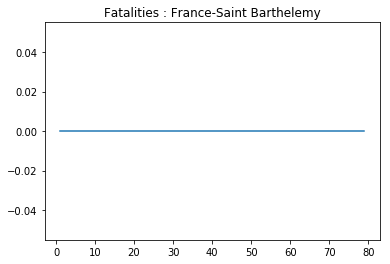



China-Shandong


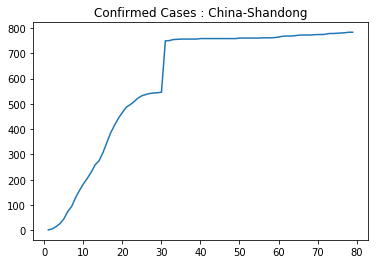

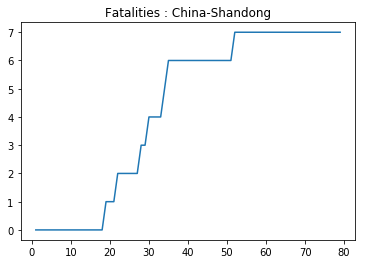



Greece-NA


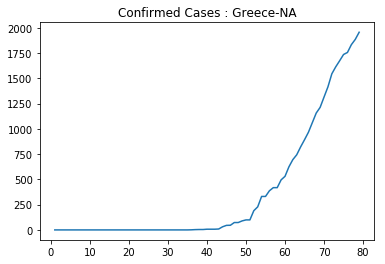

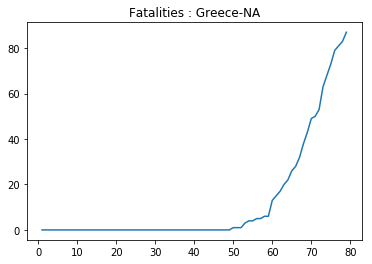



Netherlands-Sint Maarten


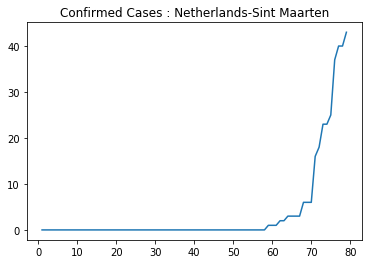

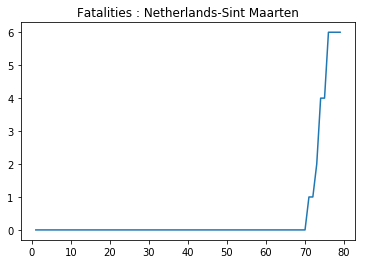



Australia-Queensland


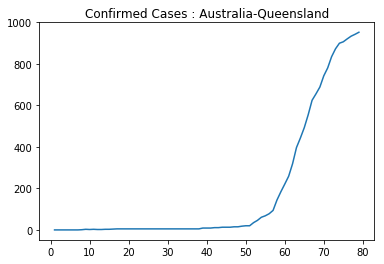

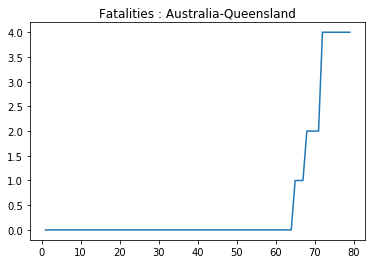



Dominica-NA


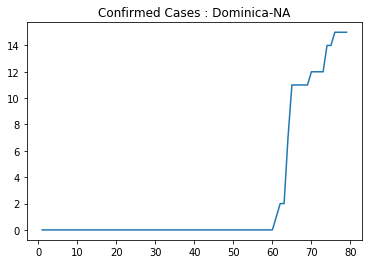

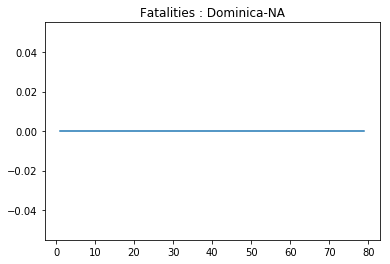



US-Kentucky


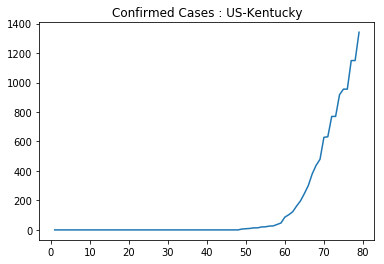

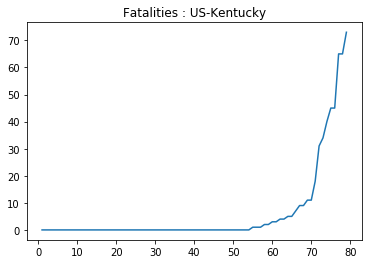



United Kingdom-Gibraltar


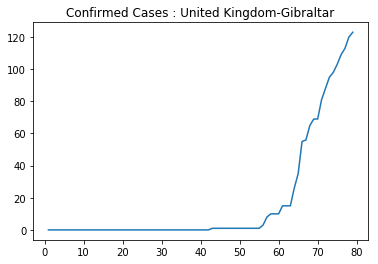

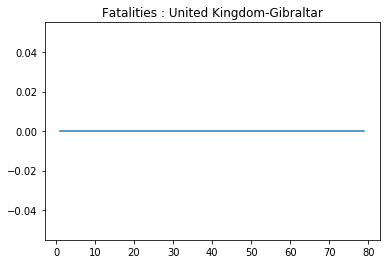



China-Guangdong


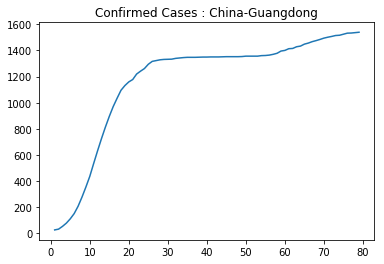

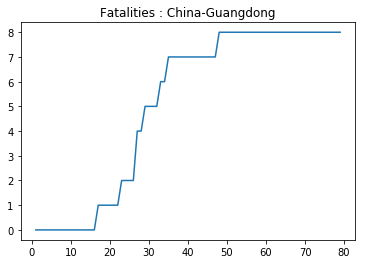



Tanzania-NA


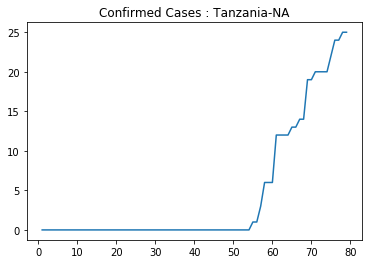

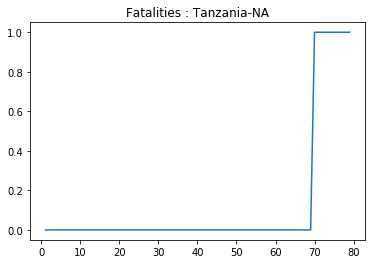



Canada-Saskatchewan


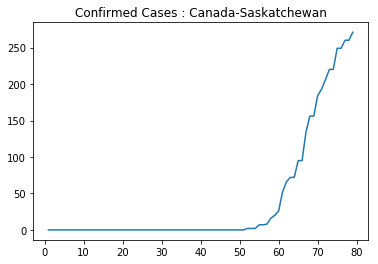

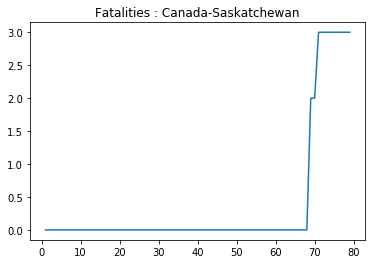



China-Henan


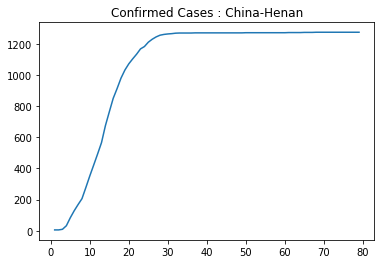

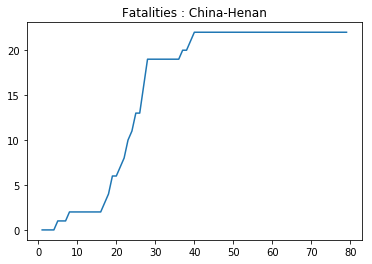



Gabon-NA


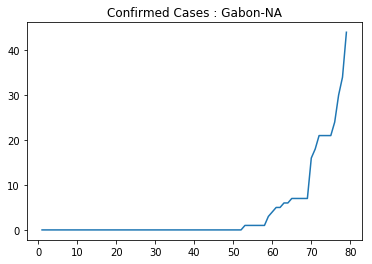

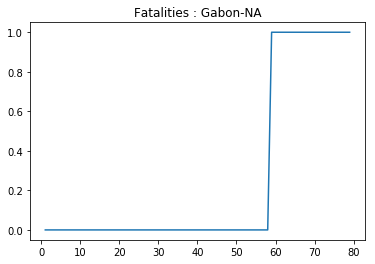



Montenegro-NA


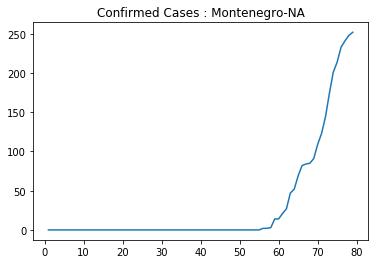

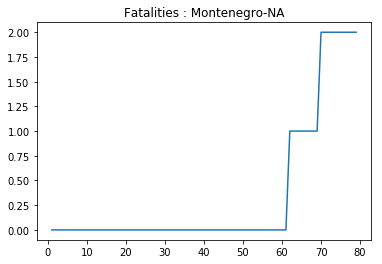



Japan-NA


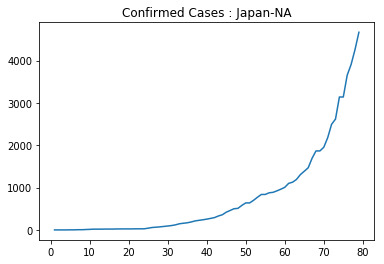

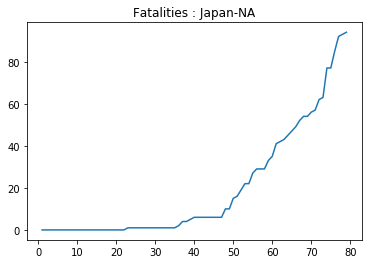



US-Texas


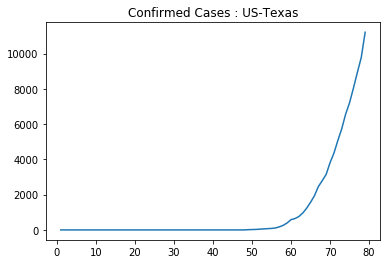

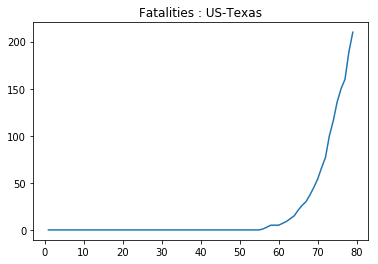



China-Hong Kong


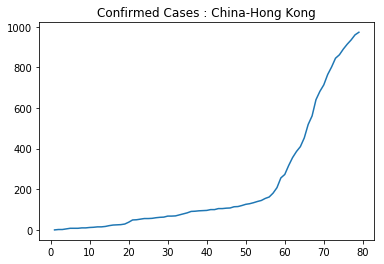

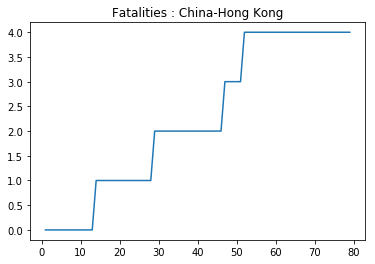



Slovenia-NA


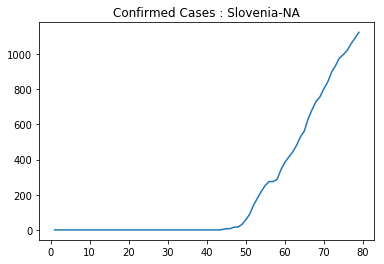

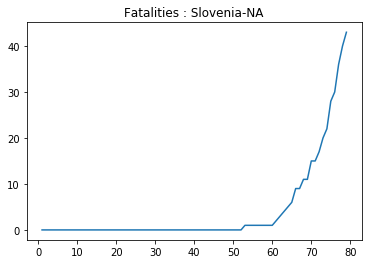



US-Alaska


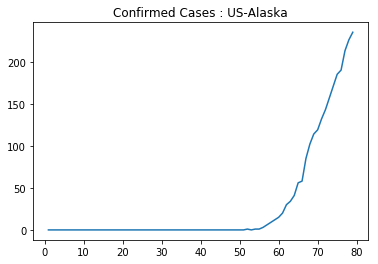

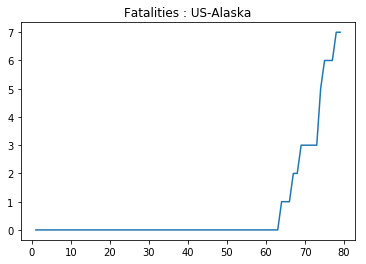



Sri Lanka-NA


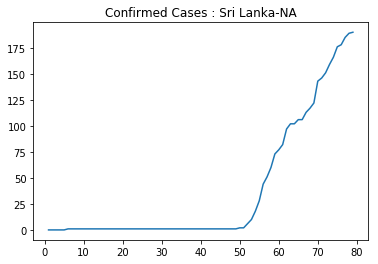

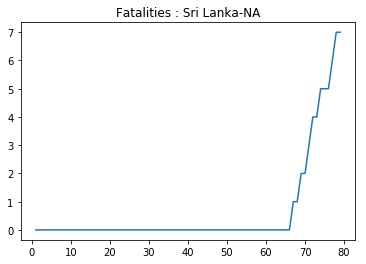



Sierra Leone-NA


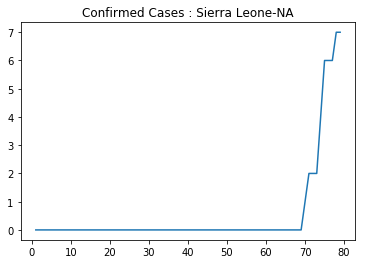

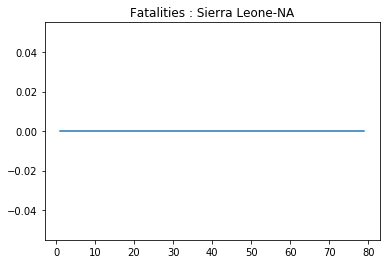



Liberia-NA


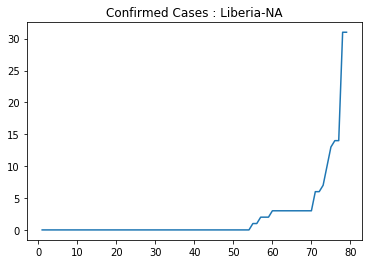

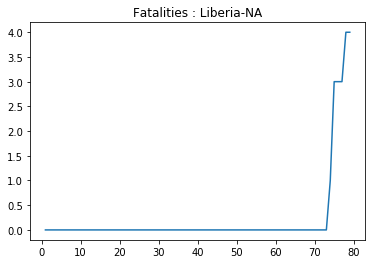



China-Gansu


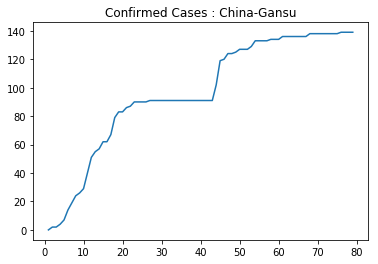

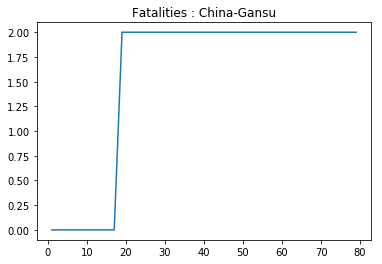



US-Florida


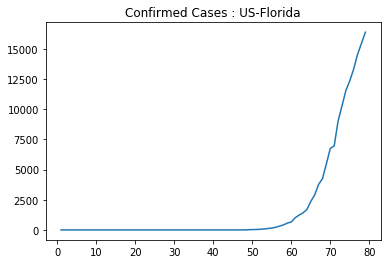

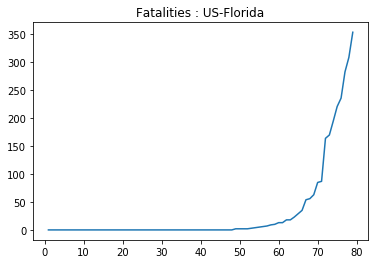



US-Pennsylvania


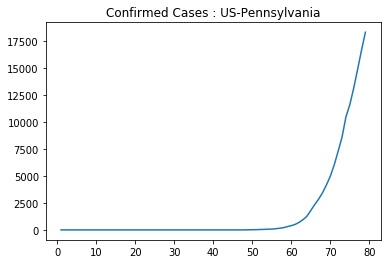

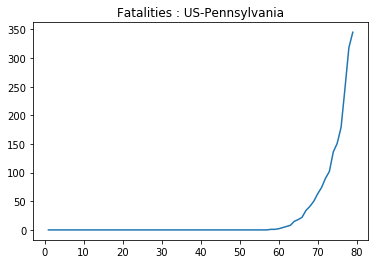



China-Jiangxi


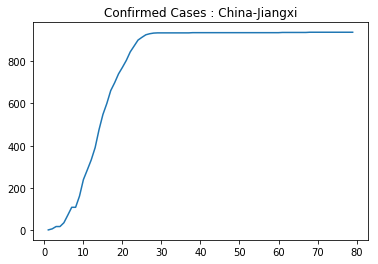

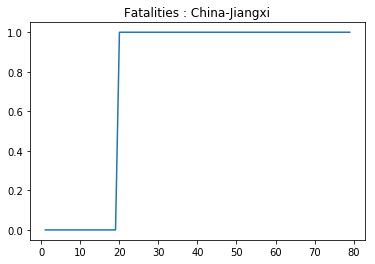



Angola-NA


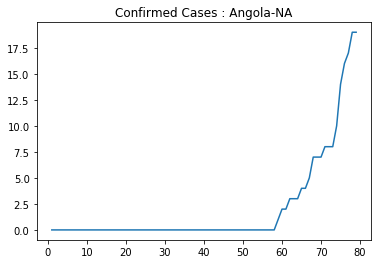

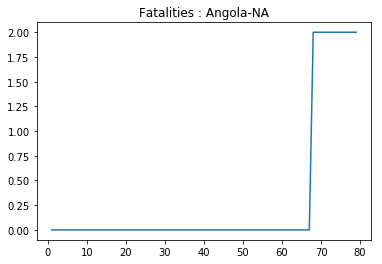



US-Iowa


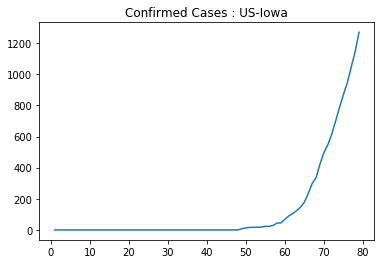

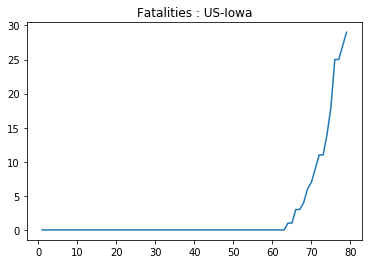



Estonia-NA


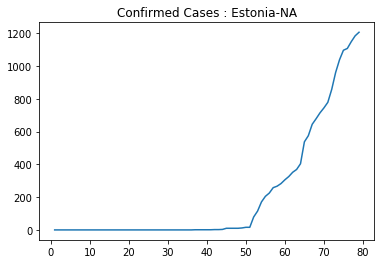

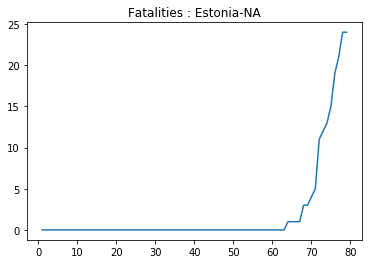



Niger-NA


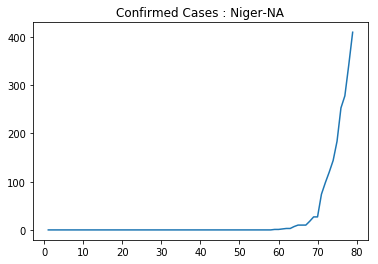

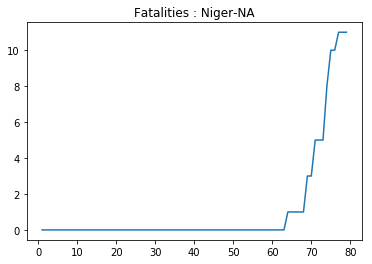



Cote d'Ivoire-NA


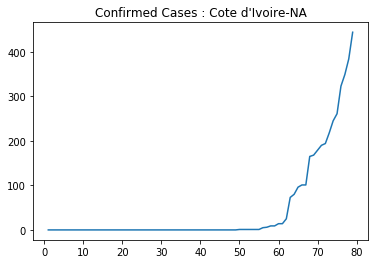

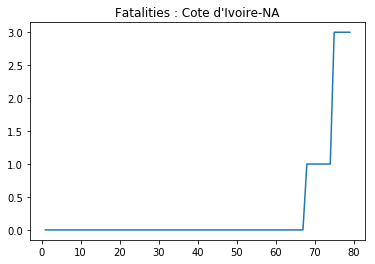



Guatemala-NA


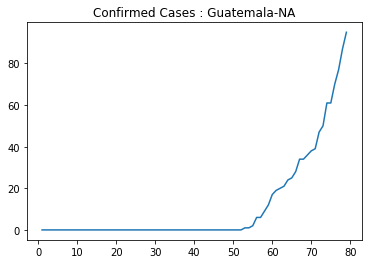

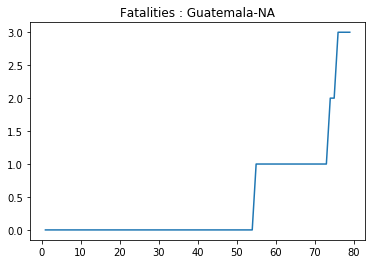



US-New Hampshire


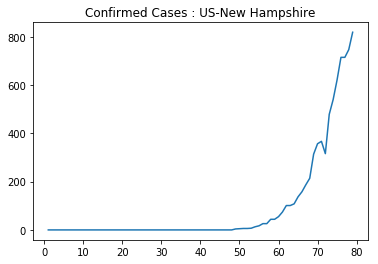

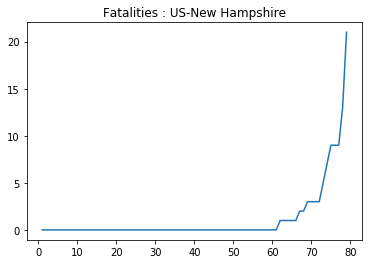



Sao Tome and Principe-NA


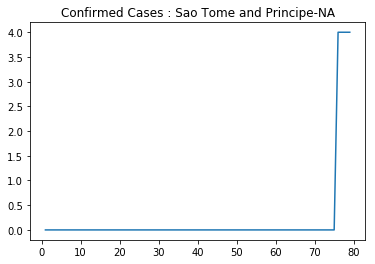

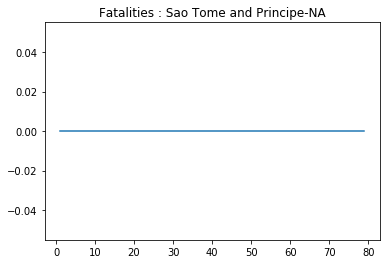



China-Sichuan


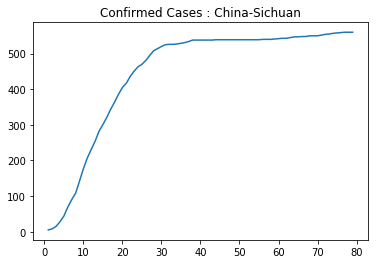

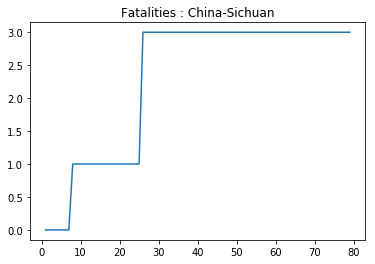



Thailand-NA


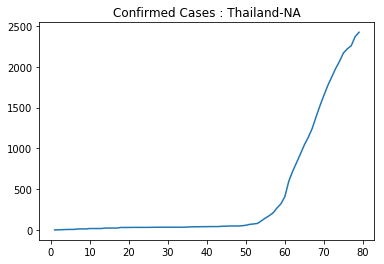

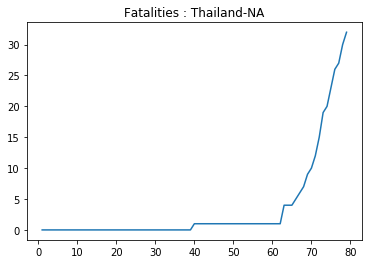



Burma-NA


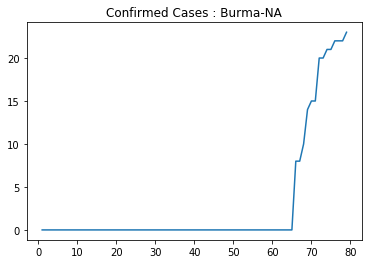

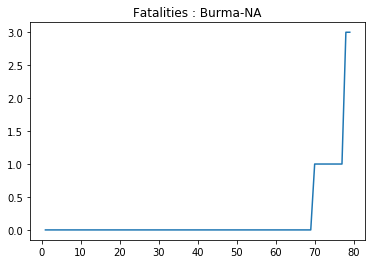



China-Guizhou


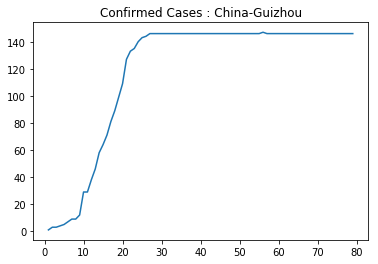

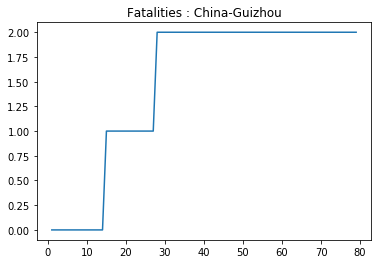



Dominican Republic-NA


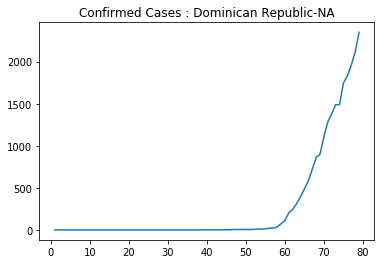

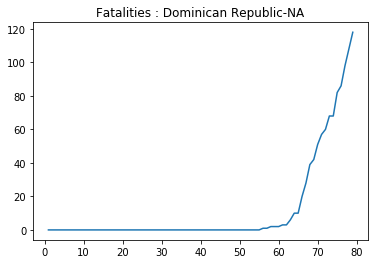



China-Jiangsu


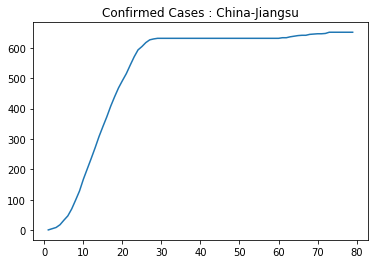

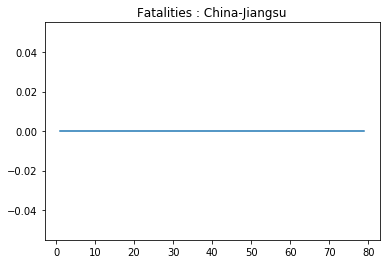



US-Vermont


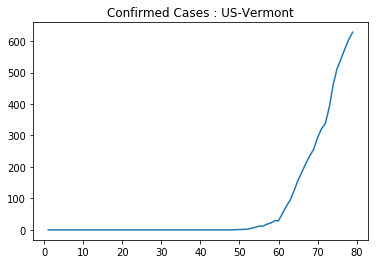

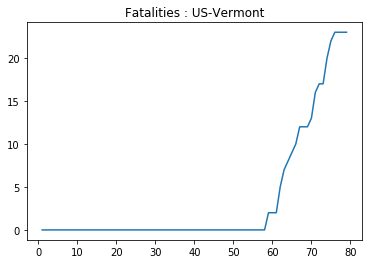



Italy-NA


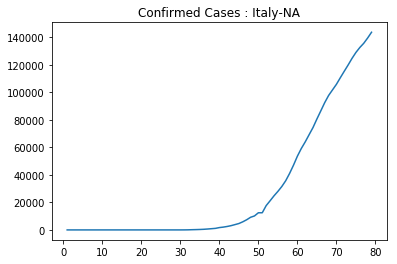

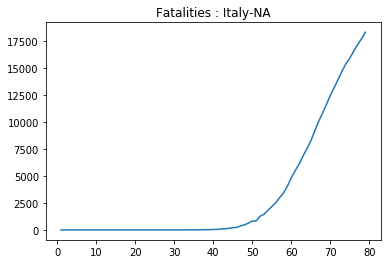



China-Zhejiang


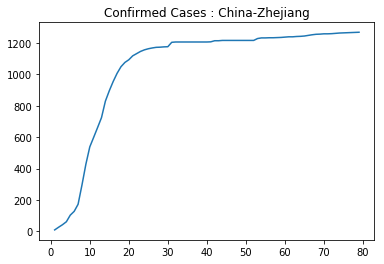

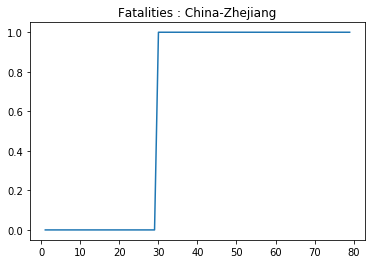



Singapore-NA


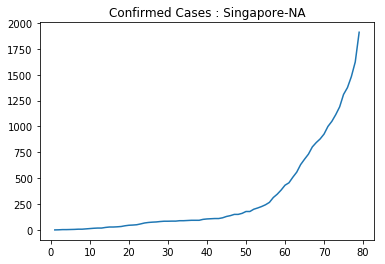

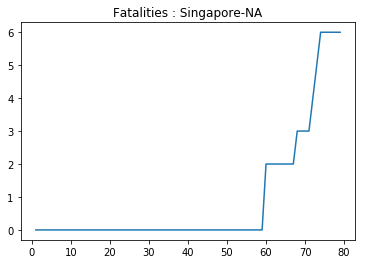



US-Oregon


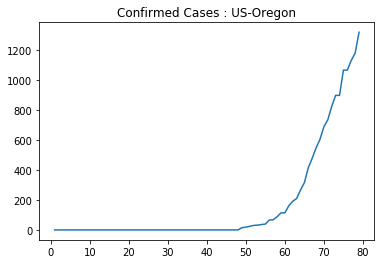

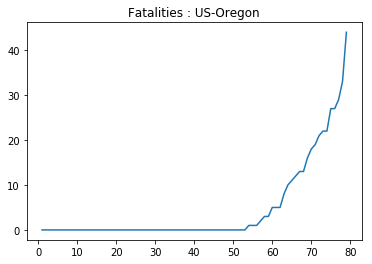



US-Guam


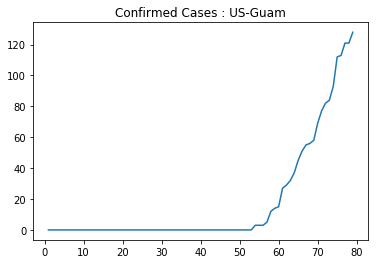

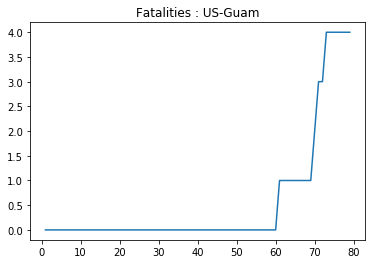



Chad-NA


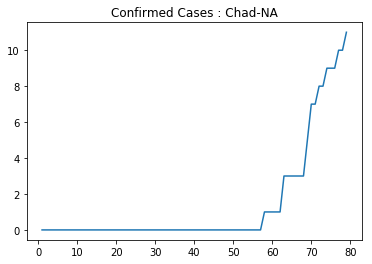

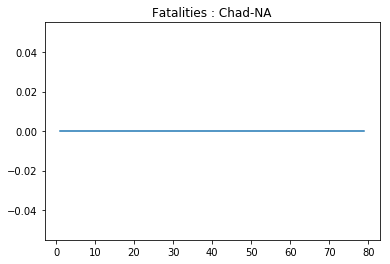



China-Shanxi


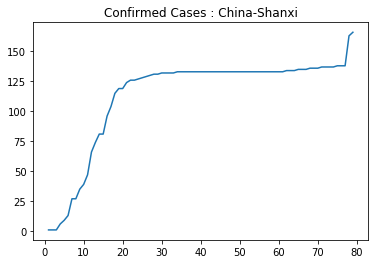

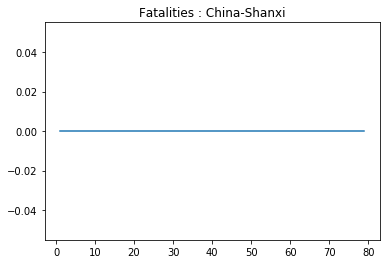



United Kingdom-British Virgin Islands


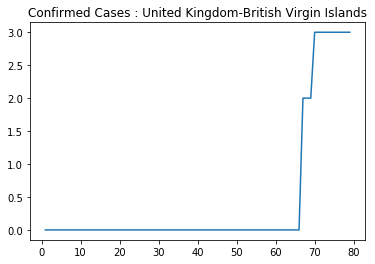

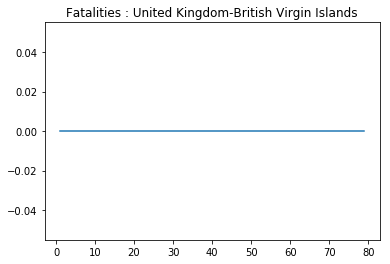



US-Nevada


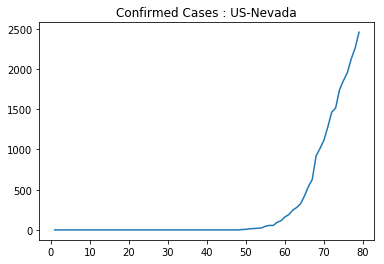

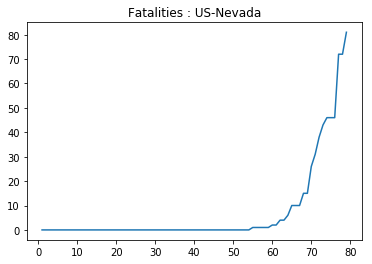



Belize-NA


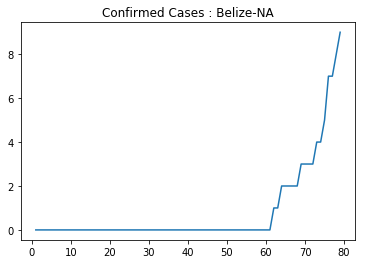

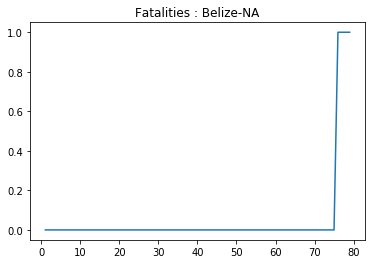



Haiti-NA


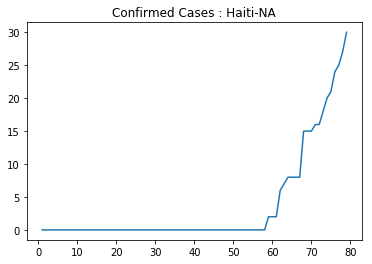

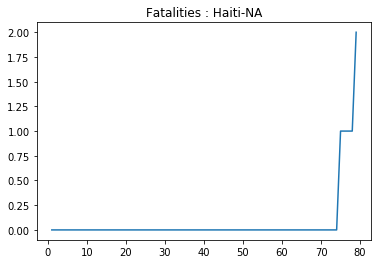



Mozambique-NA


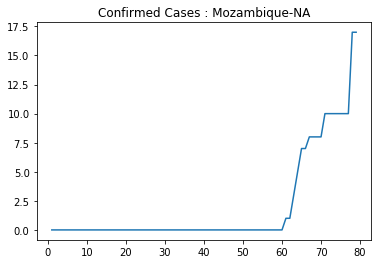

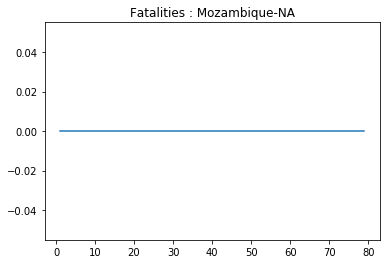



US-New Jersey


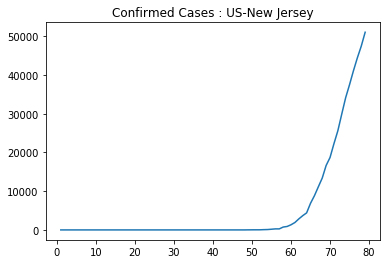

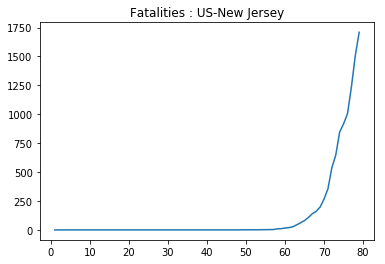



Eritrea-NA


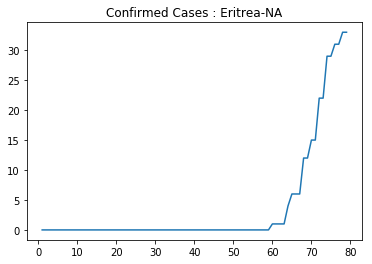

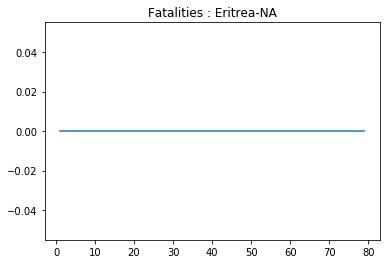



Trinidad and Tobago-NA


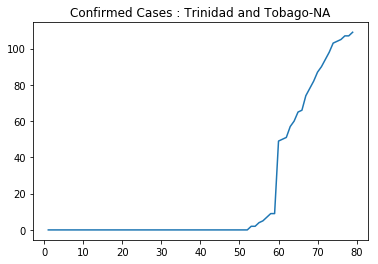

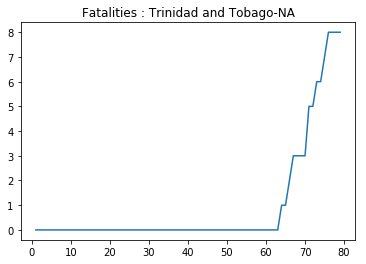



US-Virginia


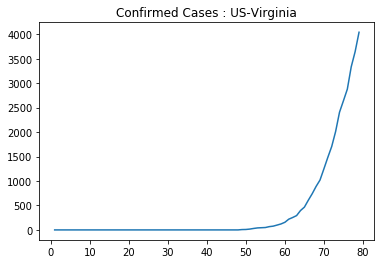

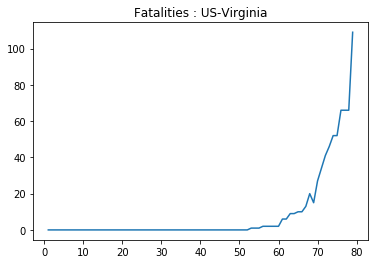



US-North Dakota


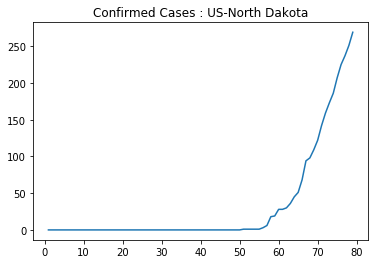

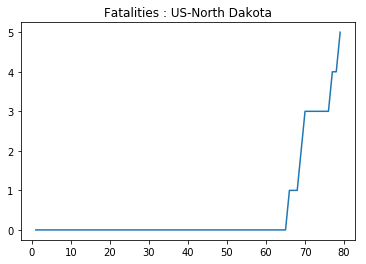



Diamond Princess-NA


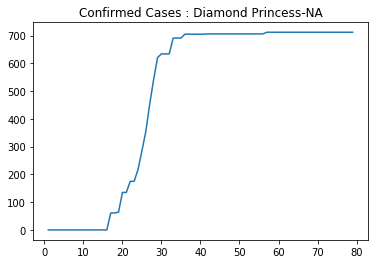

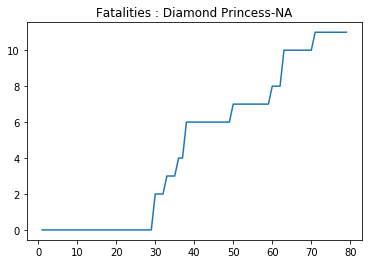



Ecuador-NA


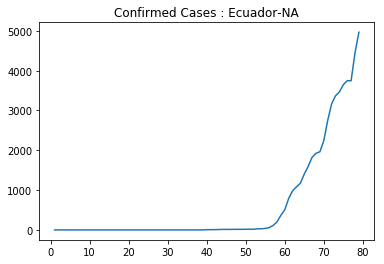

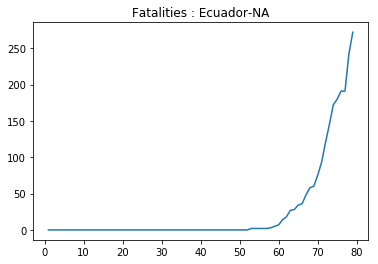



Egypt-NA


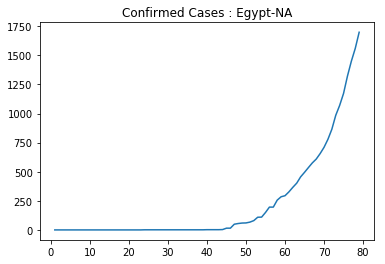

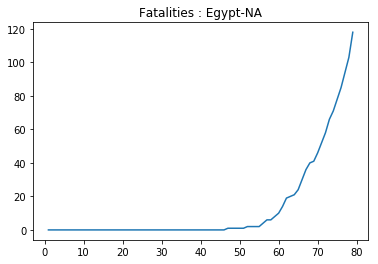



US-District of Columbia


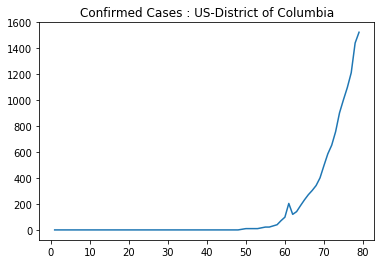

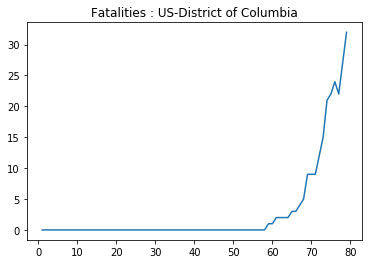



Mauritius-NA


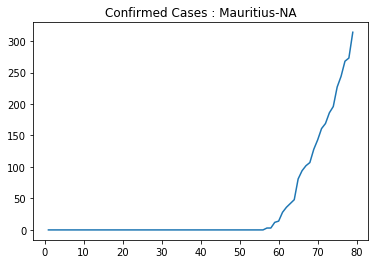

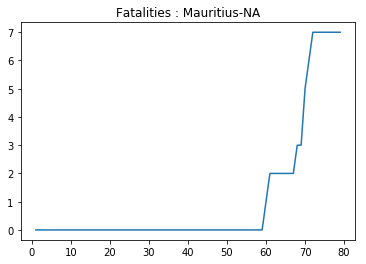

In [8]:
for region in country_state_province_list:
    print(region)
    dfregion2=df3[df3['Country_state_Province']==region]
    dfregion2.index=range(1,len(dfregion2)+1)
    dfregion2['ConfirmedCases'].plot(title='Confirmed Cases : '+str(region))
    plt.show()
    dfregion2['Fatalities'].plot(title='Fatalities : '+str(region))
    plt.show()
    print('\n')

#### Clustering of Timeseries -For each region specific series, capture the mean,min, max ,std values. Also capture the number of confirmed cases and fatalities before 50 days.

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

In [9]:
dfseries=pd.DataFrame(columns=['Series_Label','CC_50_days_prior','CC_50_days_post','CC_Mean','CC_Std','CC_Min','CC_Q1','CC_Q2','C_Q3','CC_Max','FT_50_days_prior','FT_50_days_post','FT_Mean','FT_Std','FT_Min','FT_Q1','FT_Q2','FT_Q3','FT_Max'])

In [10]:
cols=['Series_Label','CC_50_days_prior','CC_50_days_post','CC_Mean','CC_Std','CC_Min','CC_Q1','CC_Q2','C_Q3','CC_Max','FT_50_days_prior','FT_50_days_post','FT_Mean','FT_Std','FT_Min','FT_Q1','FT_Q2','FT_Q3','FT_Max']
for region in country_state_province_list:
    dfregion=df3[df3['Country_state_Province']==region]
    cc_50_days_prior=list(dfregion[dfregion['Day']==49]['ConfirmedCases'])[0]
    cc_50_days_post=list(dfregion[dfregion['Day']==72]['ConfirmedCases'])[0] - cc_50_days_prior
    ft_50_days_prior=list(dfregion[dfregion['Day']==49]['Fatalities'])[0]
    ft_50_days_post=list(dfregion[dfregion['Day']==72]['Fatalities'])[0] - ft_50_days_prior
    d1=dfregion.describe().T.reset_index()
    dcheck=d1[d1['index']=='ConfirmedCases'][['mean','std','min','25%','50%','75%','max']]
    dcheck2=d1[d1['index']=='Fatalities'][['mean','std','min','25%','50%','75%','max']]
    dcheck.columns=['CC_Mean','CC_Std','CC_Min','CC_Q1','CC_Q2','C_Q3','CC_Max']
    dcheck2.columns=['FT_Mean','FT_Std','FT_Min','FT_Q1','FT_Q2','FT_Q3','FT_Max']
    dcheck.index=range(len(dcheck))
    dcheck2.index=range(len(dcheck2))
    dcheck2=dcheck2.join(dcheck)
    dcheck2['Series_Label']=region
    dcheck2['CC_50_days_prior']=cc_50_days_prior
    dcheck2['CC_50_days_post']=cc_50_days_post
    dcheck2['FT_50_days_prior']=ft_50_days_prior
    dcheck2['FT_50_days_post']=ft_50_days_post
    dcheck2=dcheck2[cols]
    dfseries=dfseries.append(dcheck2)
    dfseries.index=range(len(dfseries))


In [11]:
dfseries.head()

Series_Label  CC_50_days_prior  CC_50_days_post     CC_Mean  \
0                Botswana-NA               0.0              4.0    0.759494   
1                Cambodia-NA               2.0            108.0   28.924051   
2  Australia-New South Wales              55.0           2243.0  489.468354   
3          France-Guadeloupe               0.0            128.0   28.151899   
4            Canada-Manitoba               0.0            167.0   29.354430   

       CC_Std  CC_Min  CC_Q1  CC_Q2   C_Q3  CC_Max  FT_50_days_prior  \
0    2.137667     0.0    0.0    0.0    0.0    13.0               0.0   
1   44.601303     0.0    1.0    1.0   52.0   119.0               0.0   
2  875.602867     0.0    4.0    6.0  394.5  2773.0               2.0   
3   48.001359     0.0    0.0    0.0   49.0   141.0               0.0   
4   62.358155     0.0    0.0    0.0   17.5   221.0               0.0   

   FT_50_days_post   FT_Mean    FT_Std  FT_Min  FT_Q1  FT_Q2  FT_Q3  FT_Max  
0              1.0  0.126582  0.334629     0.0    0.0    0.0    0.0     1.0  
1              0.0  0.000000  0.000000     0.0    0.0    0.0    0.0     0.0  
2              8.0  3.291139  5.332897     0.0    0.0    0.0    6.0    21.0  
3              6.0  1.050633  2.308839     0.0    0.0    0.0    0.0     8.0  
4              1.0  0.303797  0.739966     0.0    0.0    0.0    0.0     3.0

In [12]:
X=dfseries.drop(['Series_Label'],axis=1)

In [13]:
K = range(1,25)
distortions = []

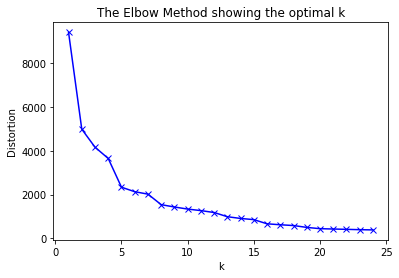

In [16]:
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Referring the above graph the elbow is at 10. So optimal clusters seem to be 10. Updating the Group_number in the train data 

In [13]:
kmeanModel10 = KMeans(n_clusters=10,random_state=42).fit(X)
cluster_pred=list(kmeanModel10.predict(X))
for j in range(0,10):
    print(cluster_pred.count(j))

31
1
1
2
13
1
2
2
259
1


In [15]:
dfcluster_out=pd.DataFrame(data=cluster_pred, columns=['Group_Num'],index=dfseries.index)
dfseries_cluster=dfseries.join(dfcluster_out)
dfseries_cluster.head()

Series_Label  CC_50_days_prior  CC_50_days_post     CC_Mean  \
0              Djibouti-NA               0.0             40.0   10.202532   
1         Cote d'Ivoire-NA               0.0            194.0   46.316456   
2           South Sudan-NA               0.0              0.0    0.113924   
3  United Arab Emirates-NA              74.0            950.0  282.088608   
4           Saint Lucia-NA               0.0             13.0    2.392405   

       CC_Std  CC_Min  CC_Q1  CC_Q2   C_Q3  CC_Max  FT_50_days_prior  \
0   27.186620     0.0    0.0    0.0    1.0   135.0               0.0   
1  100.047366     0.0    0.0    0.0   11.5   444.0               0.0   
2    0.480047     0.0    0.0    0.0    0.0     3.0               0.0   
3  624.571241     0.0    8.0   21.0  146.5  2990.0               0.0   
4    4.597708     0.0    0.0    0.0    2.0    14.0               0.0   

   FT_50_days_post   FT_Mean   FT_Std  FT_Min  FT_Q1  FT_Q2  FT_Q3  FT_Max  \
0              0.0  0.000000  0.00000     0.0    0.0    0.0    0.0     0.0   
1              1.0  0.278481  0.76689     0.0    0.0    0.0    0.0     3.0   
2              0.0  0.000000  0.00000     0.0    0.0    0.0    0.0     0.0   
3              8.0  1.594937  3.43257     0.0    0.0    0.0    2.0    14.0   
4              0.0  0.000000  0.00000     0.0    0.0    0.0    0.0     0.0   

   Group_Num  
0          8  
1          8  
2          8  
3          8  
4          8

In [16]:
group_list=list(dfseries_cluster['Group_Num'])
region_list=list(dfseries_cluster['Series_Label'])
dict_region_group={}
for i in range(len(region_list)):
    dict_region_group[region_list[i]]=group_list[i]

In [17]:
#dict_region_group
df3['Group_Num']=df3['Country_state_Province'].apply(lambda x: dict_region_group[x] )

#### The exported file 'Train_Data_Group.csv' will be used to train the model

In [19]:
df3.to_csv('Train_Data_Group.csv',sep='|')

### Silhoutte Score Analysis

#### The Silhotte score analysis was also performed to calculate the appropriate number of clusters. The below method also gives 10
#### The below snippet of code is taken from sklearn site.

For n_clusters = 2 The average silhouette_score is : 0.950315534305342
For n_clusters = 3 The average silhouette_score is : 0.9303289558028218
For n_clusters = 4 The average silhouette_score is : 0.9187801472441695
For n_clusters = 5 The average silhouette_score is : 0.8439645650566051
For n_clusters = 6 The average silhouette_score is : 0.8418947897809725
For n_clusters = 7 The average silhouette_score is : 0.8403150987331484
For n_clusters = 8 The average silhouette_score is : 0.7677115667059117
For n_clusters = 9 The average silhouette_score is : 0.7715945845683465
For n_clusters = 10 The average silhouette_score is : 0.7671590388534418


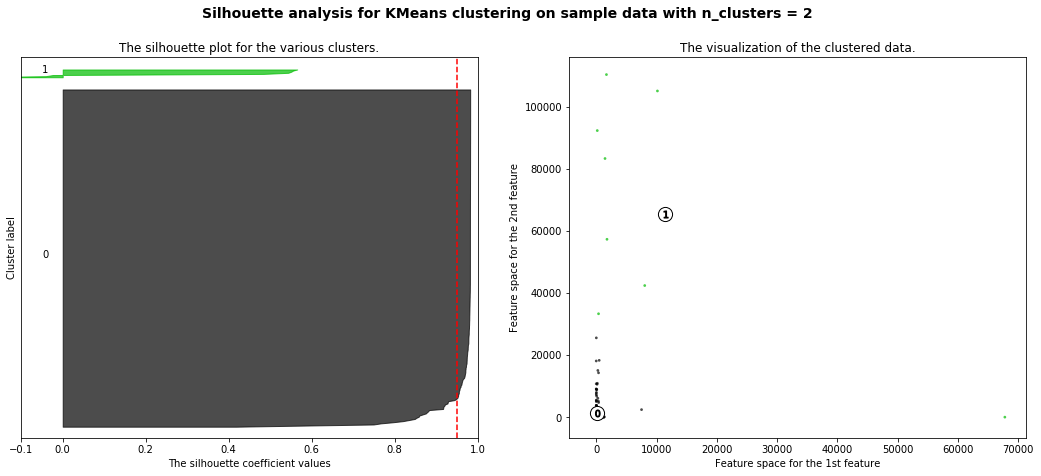

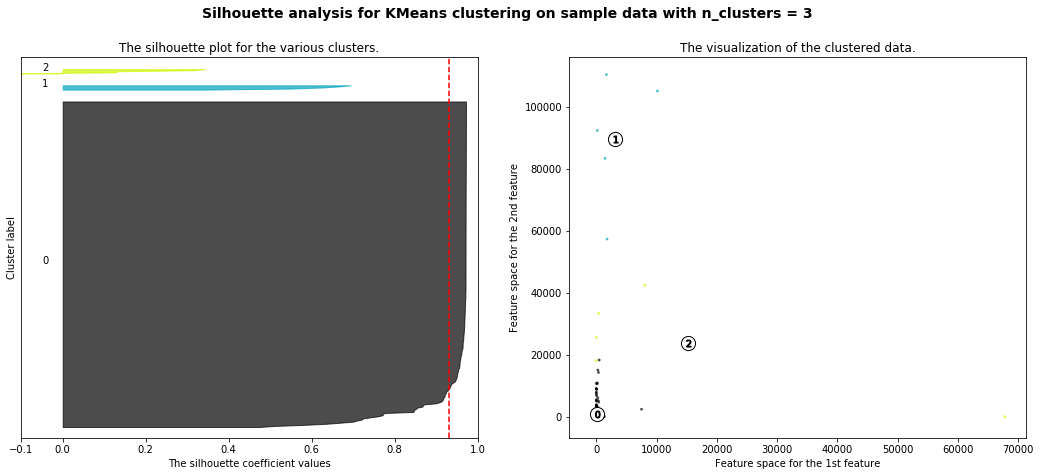

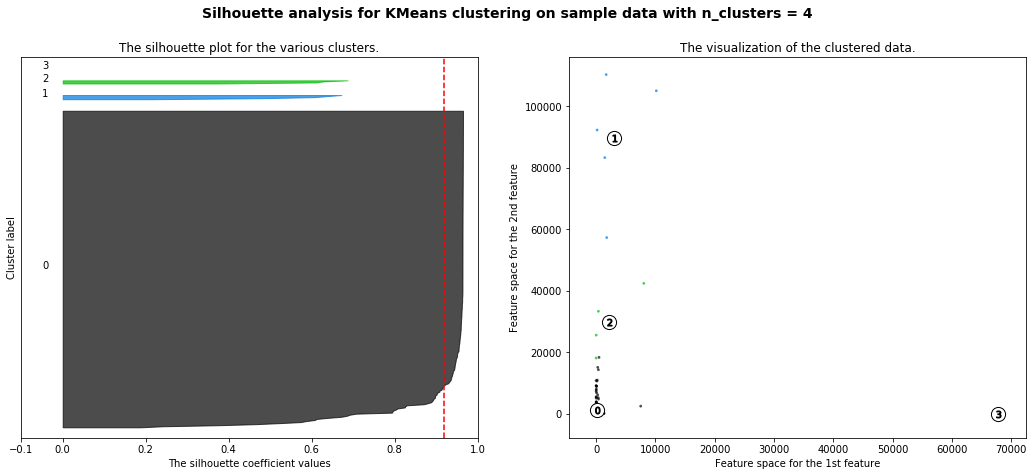

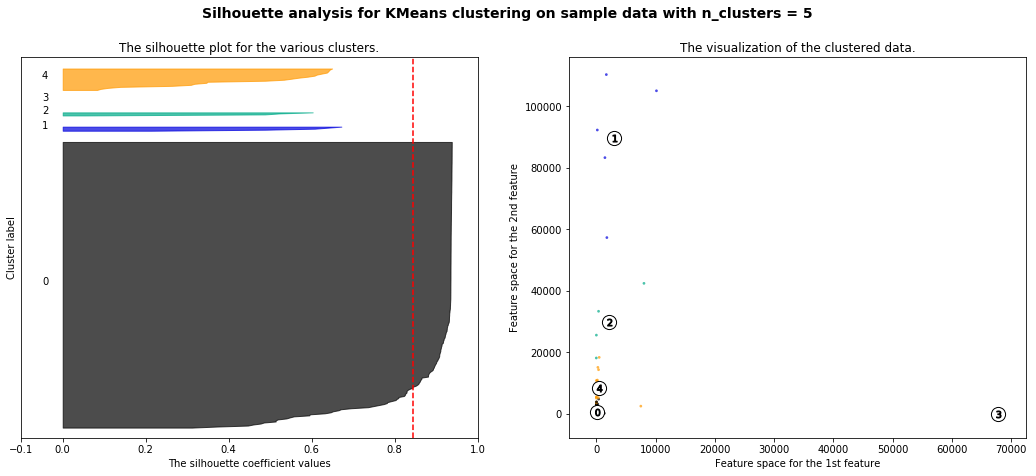

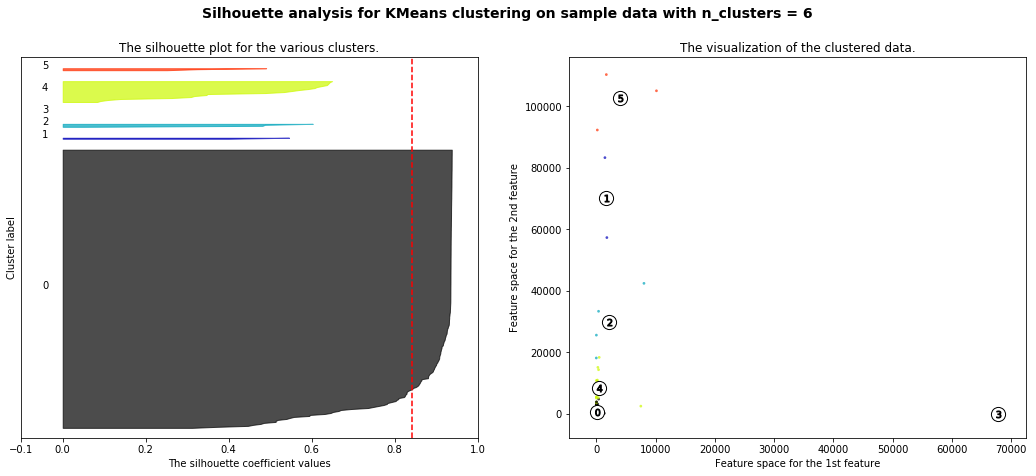

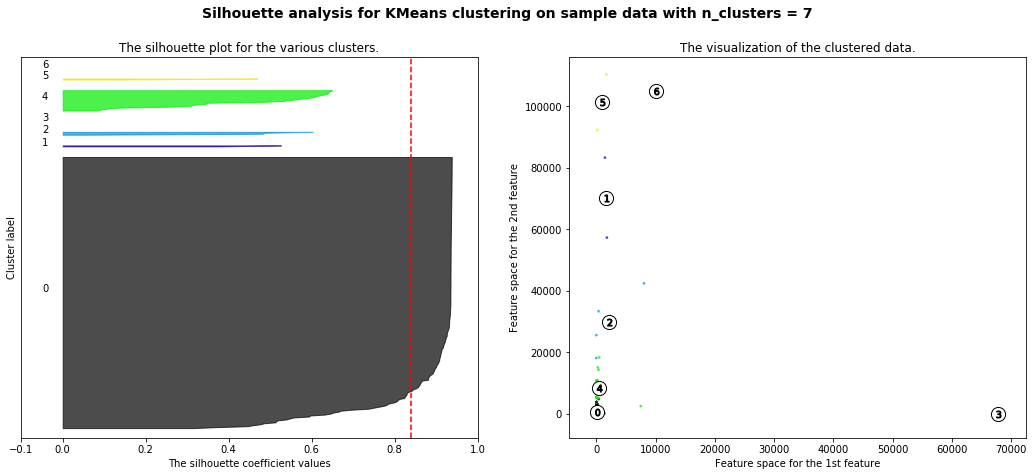

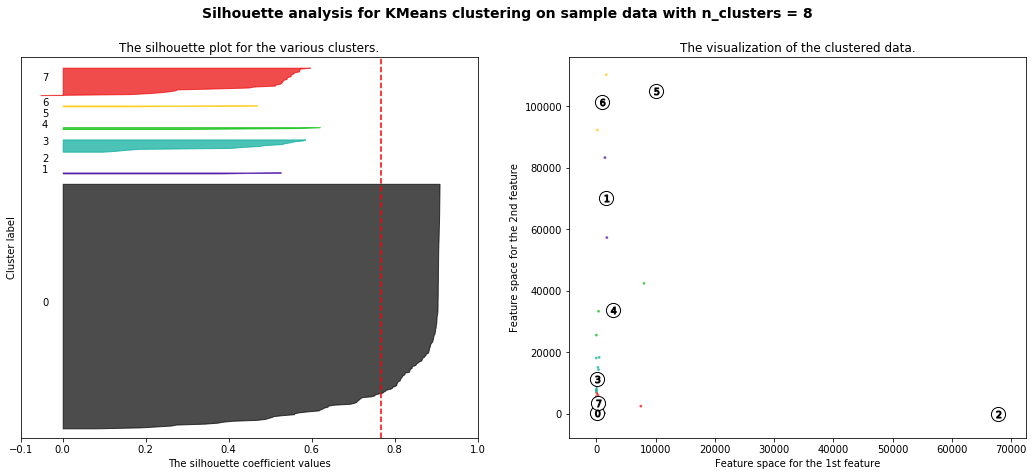

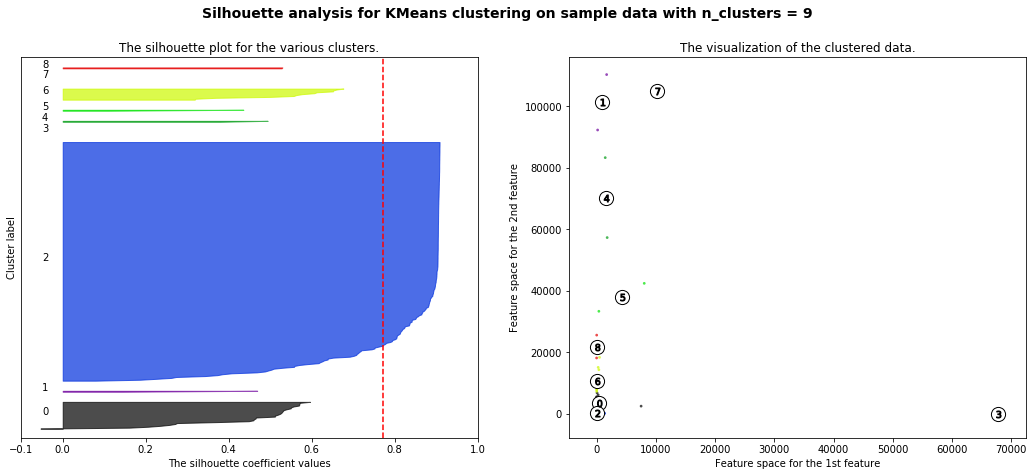

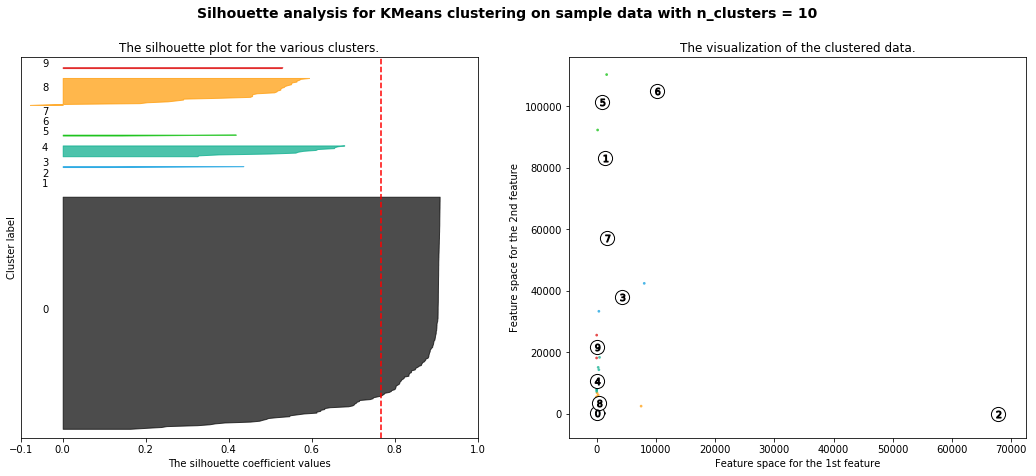

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2,11)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.values[:, 0], X.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### The 306 series actually are related to each other. On Grouping we do fine 10 distinct clusters. So here is a classic example of dimesnionality reduction. So 306 variables, reduced to 10 variables.